# PROYECTO 1. 
**Grupo 6**

Autores: Elena, Fer, Rubén

> Objetivo principal: 
- Analizar cohortes de usuarios definidos por el mes de creación de su primer adelanto en efectivo. 
- Seguir la evolución mensual de las métricas clave para estas cohortes (lo que permitirá a IronHack Payments obtener valiosas perspectivas sobre el comportamiento de los usuarios y el rendimiento de sus servicios financieros.)

> Métricas a Analizar

Calcularás y analizarás las siguientes métricas para cada cohorte:

1. **Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.
2. **Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.
3. **Ingresos Generados por la Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.
4. **Nueva Métrica Relevante:** Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from pathlib import Path
%matplotlib inline

In [2]:
sns.set_style("whitegrid")

## Load data (.csv)

In [3]:
inputs_path = Path("project_dataset")
df_cash = pd.read_csv(inputs_path / "extract - cash request - data analyst.csv")
df_fees = pd.read_csv(inputs_path / "extract - fees - data analyst - .csv")

## EDA (Exploratory Data Analysis) - df_cash

In [4]:
df_cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


### CASH Dataframe (df_cash)

In [5]:
df_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          23970 non-null  int64  
 1   amount                      23970 non-null  float64
 2   status                      23970 non-null  object 
 3   created_at                  23970 non-null  object 
 4   updated_at                  23970 non-null  object 
 5   user_id                     21867 non-null  float64
 6   moderated_at                16035 non-null  object 
 7   deleted_account_id          2104 non-null   float64
 8   reimbursement_date          23970 non-null  object 
 9   cash_request_received_date  16289 non-null  object 
 10  money_back_date             16543 non-null  object 
 11  transfer_type               23970 non-null  object 
 12  send_at                     16641 non-null  object 
 13  recovery_status             333

#### Find NaN

In [6]:
#  Encontrar NaN
df_cash.isnull().sum()

id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

In [7]:
# df_cash_nan = df_cash[df_cash['user_id'].isnull().values]
# df_cash_nan

In [8]:
# df_cash = df_cash.dropna(subset='user_id')
# df_cash

In [9]:
# NaN user_id
df_cash[~(df_cash.deleted_account_id.isnull().values)]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00
23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN
23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN
23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN


In [10]:
df_cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN


In [11]:
df_cash['new_user_id'] = df_cash['user_id'].fillna(df_cash['deleted_account_id']).astype(int)

#### value_counts() and unique()

In [12]:
for col in df_cash.columns:
    print(f"'{col}' value_counts: {df_cash[col].value_counts()}")
    print(f"'{col}' unique: {df_cash[col].unique()}")
    print(f"'{col}' len(unique): {len(df_cash[col].unique())}\n")

'id' value_counts: id
19886    1
5        1
19774    1
26021    1
22957    1
        ..
3512     1
2145     1
1594     1
10       1
7        1
Name: count, Length: 23970, dtype: int64
'id' unique: [    5    70     7 ... 22357 20256 19886]
'id' len(unique): 23970

'amount' value_counts: amount
100.0    16094
50.0      5304
25.0      1276
80.0       267
60.0       190
70.0       151
20.0       132
30.0       114
40.0       100
90.0        91
10.0        57
200.0       25
95.0        21
1.0         19
75.0        18
45.0        15
55.0        14
99.0        12
65.0        12
15.0        10
85.0         9
35.0         9
5.0          6
2.0          3
98.0         2
28.0         2
22.0         2
11.0         2
94.0         1
150.0        1
67.0         1
72.0         1
31.0         1
8.0          1
86.0         1
97.0         1
39.0         1
49.0         1
36.0         1
54.0         1
24.0         1
Name: count, dtype: int64
'amount' unique: [100.  99.  90.   1.  70.  25.  50.  20.  60.  8

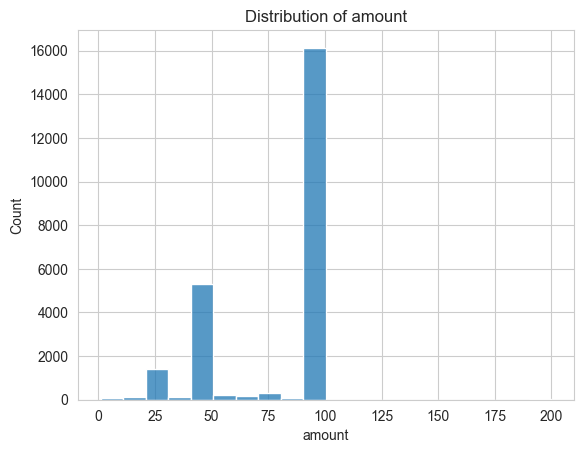

In [13]:
sns.histplot(data=df_cash, x='amount', bins=20)
plt.title("Distribution of amount")
plt.show()

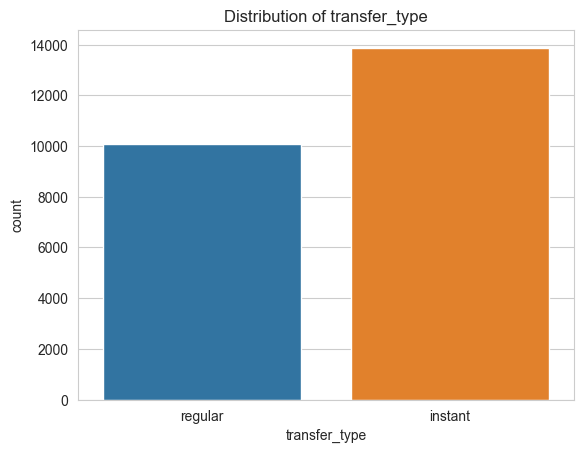

In [14]:
sns.countplot(data=df_cash, x='transfer_type', hue='transfer_type', palette='tab10')
plt.title("Distribution of transfer_type")
plt.show()

In [15]:
df_cash

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,new_user_id
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,804
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,231
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,191
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,761
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN,7686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00,2021-02-06 20:17:49.292493+00,13681.0,NaN,NaN,2021-02-06 11:00:00+00,2020-10-13,2021-02-06 20:17:49.257521+00,instant,2020-10-12 13:54:24.352856+00,NaN,NaN,NaN,13681
23966,25243,50.0,money_back,2020-10-27 14:41:25.73491+00,2020-12-18 13:15:40.843946+00,NaN,NaN,30367.0,2020-11-03 22:00:00+00,2020-10-28,2020-12-01 13:26:53.787672+00,instant,2020-10-27 14:41:57.901946+00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,30367
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00,2021-02-05 12:19:30.656816+00,82122.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-21,2021-02-05 12:19:30.626289+00,instant,2020-10-20 07:58:14.171553+00,NaN,NaN,NaN,82122
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00,2021-02-05 13:14:19.707627+00,64517.0,NaN,NaN,2021-02-05 11:00:00+00,2020-10-12,2021-02-05 13:14:19.689906+00,instant,2020-10-10 05:41:23.368363+00,NaN,NaN,NaN,64517


In [16]:
# Convertimos el 'created_at' de string a datetime
df_cash['created_at'] = pd.to_datetime(df_cash['created_at'])
# Obtenemos una nueva columna 'mes_año'
df_cash['month_year'] = df_cash['created_at'].dt.to_period('M').astype(str)
df_cash['month_name'] = df_cash['created_at'].dt.month_name()
df_cash['year'] = df_cash['created_at'].dt.year
df_cash[['created_at', 'month_year', 'month_name', 'year']]

C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\2160605581.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_cash['month_year'] = df_cash['created_at'].dt.to_period('M').astype(str)


,created_at,month_year,month_name,year
0,2019-12-10 19:05:21.596873+00:00,2019-12,December,2019
1,2019-12-10 19:50:12.347780+00:00,2019-12,December,2019
2,2019-12-10 19:13:35.825460+00:00,2019-12,December,2019
3,2019-12-10 19:16:10.880172+00:00,2019-12,December,2019
4,2020-05-06 09:59:38.877376+00:00,2020-05,May,2020
...,...,...,...,...
23965,2020-10-12 13:54:11.686225+00:00,2020-10,October,2020
23966,2020-10-27 14:41:25.734910+00:00,2020-10,October,2020
23967,2020-10-20 07:58:04.006937+00:00,2020-10,October,2020
23968,2020-10-10 05:40:55.700422+00:00,2020-10,October,2020


In [17]:
df_cash_m1 = df_cash[['id', 'new_user_id', 'status', 'created_at', 'month_year', 'month_name', 'year']]
df_cash_m1.head()

,id,new_user_id,status,created_at,month_year,month_name,year
0,5,804,rejected,2019-12-10 19:05:21.596873+00:00,2019-12,December,2019
1,70,231,rejected,2019-12-10 19:50:12.347780+00:00,2019-12,December,2019
2,7,191,rejected,2019-12-10 19:13:35.825460+00:00,2019-12,December,2019
3,10,761,rejected,2019-12-10 19:16:10.880172+00:00,2019-12,December,2019
4,1594,7686,rejected,2020-05-06 09:59:38.877376+00:00,2020-05,May,2020


In [18]:
df_cash_m1.sort_values(['new_user_id', 'id'], inplace=True)

C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\2100630214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_m1.sort_values(['new_user_id', 'id'], inplace=True)


In [19]:
df_cash_m1['n_transaction'] = df_cash_m1.groupby('new_user_id').cumcount() + 1
df_cash_m1

C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\1687452380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_m1['n_transaction'] = df_cash_m1.groupby('new_user_id').cumcount() + 1


,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction
538,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1
58,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1
180,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2
345,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3
91,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4
...,...,...,...,...,...,...,...,...
10893,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1
23389,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1
18752,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1
19324,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1


In [20]:
df_cash_m1.head()

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction
538,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1
58,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1
180,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2
345,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3
91,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4


In [21]:
df_cash_m1[df_cash_m1['n_transaction'] == 1]

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction
538,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1
58,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1
7920,3,47,canceled,2019-11-19 13:57:53.511561+00:00,2019-11,November,2019,1
7216,200,52,money_back,2019-12-17 09:01:12.584634+00:00,2019-12,December,2019,1
8114,276,53,money_back,2019-12-21 11:39:03.844436+00:00,2019-12,December,2019,1
...,...,...,...,...,...,...,...,...
10893,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1
23389,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1
18752,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1
19324,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1


In [22]:
df_cash_m1

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction
538,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1
58,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1
180,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2
345,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3
91,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4
...,...,...,...,...,...,...,...,...
10893,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1
23389,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1
18752,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1
19324,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1


In [23]:
df_cash_m1_t1_cohort = df_cash_m1[df_cash_m1['n_transaction'] == 1].groupby('month_year')['new_user_id'].count().reset_index(name='count_user_id')
df_cash_m1_t1_cohort['cohort_n']  = (df_cash_m1_t1_cohort.index + 1)
df_cash_m1_t1_cohort['cohort_month_year']  = df_cash_m1_t1_cohort['month_year'].astype(str)
df_cash_m1_t1_cohort

#TODO cohort_month_year cambiar nombre 


,month_year,count_user_id,cohort_n,cohort_month_year
0,2019-11,1,1,2019-11
1,2019-12,254,2,2019-12
2,2020-01,106,3,2020-01
3,2020-02,90,4,2020-02
4,2020-03,86,5,2020-03
5,2020-04,246,6,2020-04
6,2020-05,432,7,2020-05
7,2020-06,1540,8,2020-06
8,2020-07,1482,9,2020-07
9,2020-08,728,10,2020-08


In [24]:
df_cash_m1_t1 = pd.merge(df_cash_m1[df_cash_m1['n_transaction']==1], 
         df_cash_m1_t1_cohort[['month_year','cohort_n', 'cohort_month_year']], 
         on=['month_year'], how='outer')[['new_user_id','cohort_n', 'cohort_month_year']]

df_cash_m1_t1


,new_user_id,cohort_n,cohort_month_year
0,47,1,2019-11
1,35,2,2019-12
2,52,2,2019-12
3,53,2,2019-12
4,68,2,2019-12
...,...,...,...
11788,103425,13,2020-11
11789,103437,13,2020-11
11790,103496,13,2020-11
11791,103503,13,2020-11


In [25]:
df_cash_m1 = pd.merge(df_cash_m1, df_cash_m1_t1, on=['new_user_id'], how='outer')
df_cash_m1

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12
...,...,...,...,...,...,...,...,...,...,...
23965,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1,13,2020-11
23966,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1,13,2020-11
23967,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1,13,2020-11
23968,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1,13,2020-11


In [26]:
df_cash_m1_t1[['cohort_n','cohort_month_year']].value_counts()

cohort_n  cohort_month_year
12        2020-10              4802
11        2020-09              1950
8         2020-06              1540
9         2020-07              1482
10        2020-08               728
7         2020-05               432
2         2019-12               254
6         2020-04               246
3         2020-01               106
4         2020-02                90
5         2020-03                86
13        2020-11                76
1         2019-11                 1
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of unique Users in each Cohort')

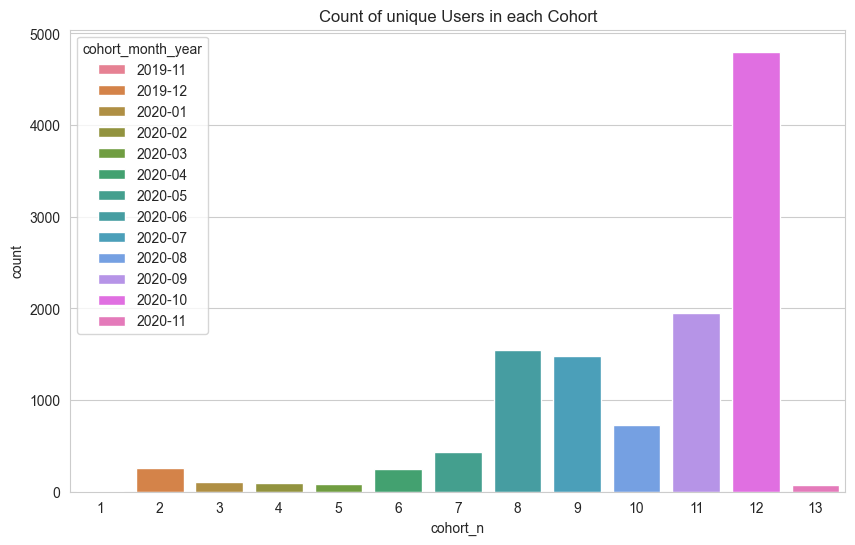

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cash_m1_t1, x='cohort_n', hue='cohort_month_year')
plt.title("Count of unique Users in each Cohort")

Text(0.5, 1.0, 'Count of unique Users in each Cohort')

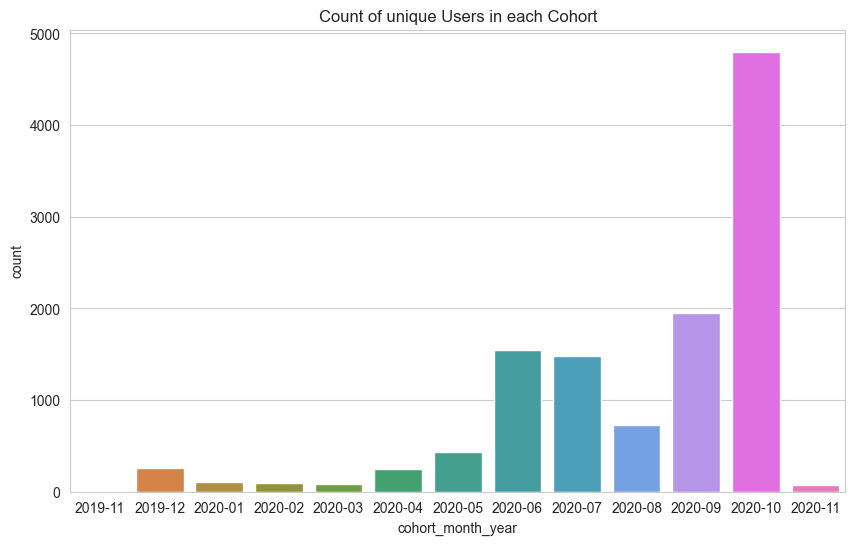

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cash_m1_t1, x='cohort_month_year', hue='cohort_month_year')
plt.title("Count of unique Users in each Cohort")

## 1. **Frecuencia de Uso del Servicio:** Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

In [29]:
df_cash_m1

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12
...,...,...,...,...,...,...,...,...,...,...
23965,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1,13,2020-11
23966,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1,13,2020-11
23967,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1,13,2020-11
23968,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1,13,2020-11


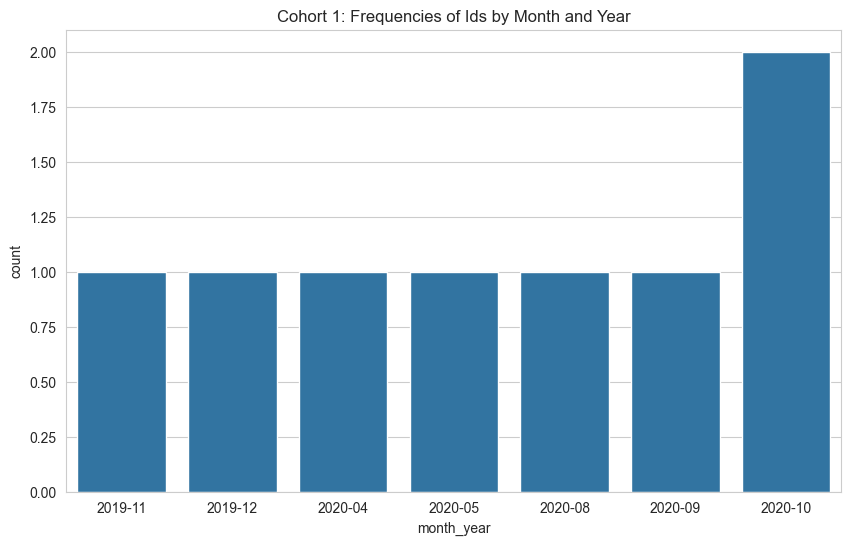

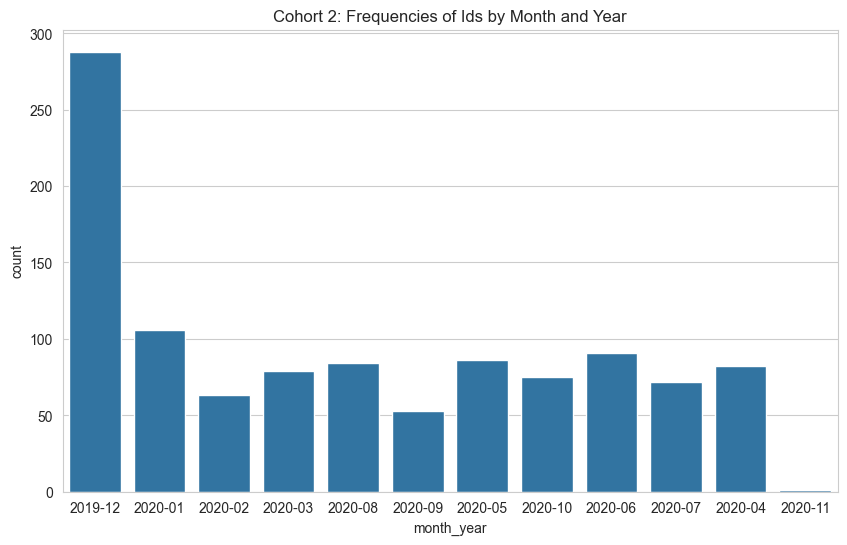

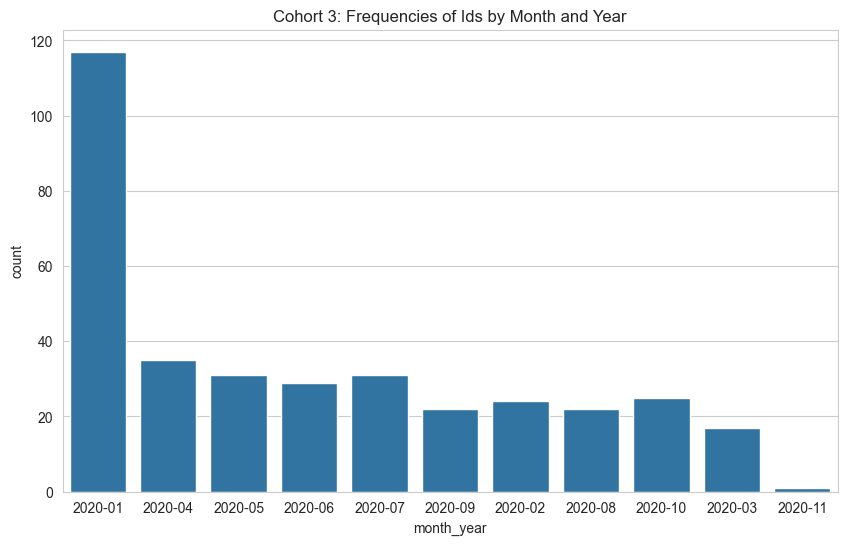

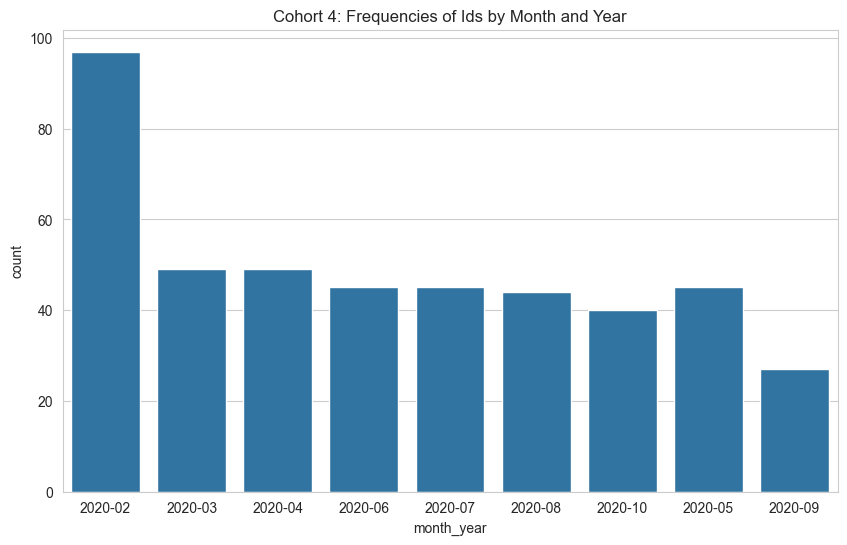

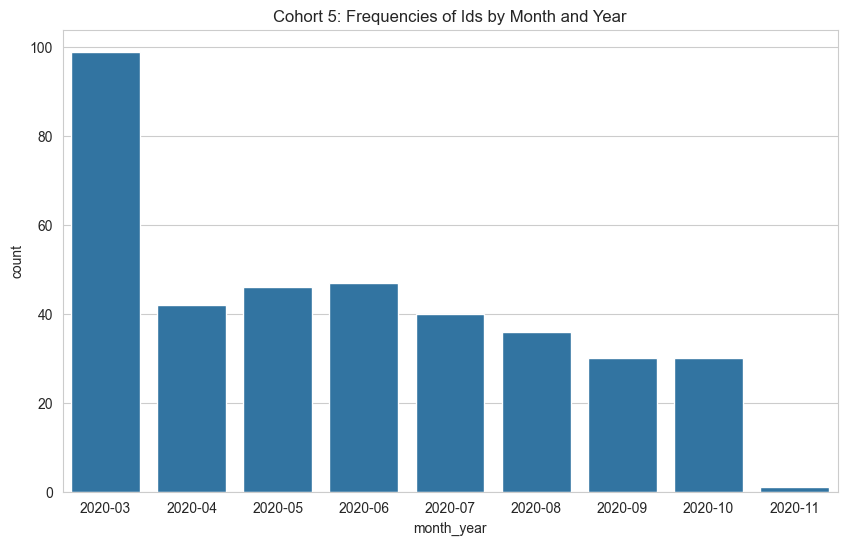

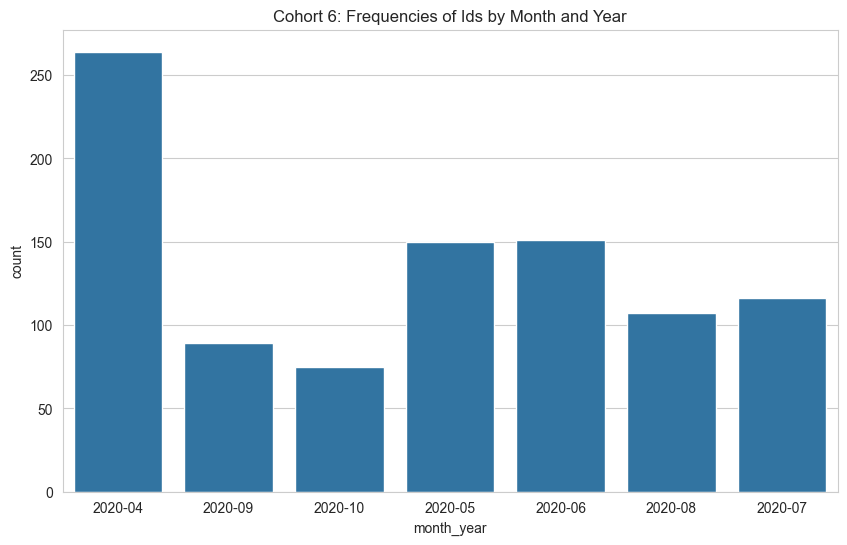

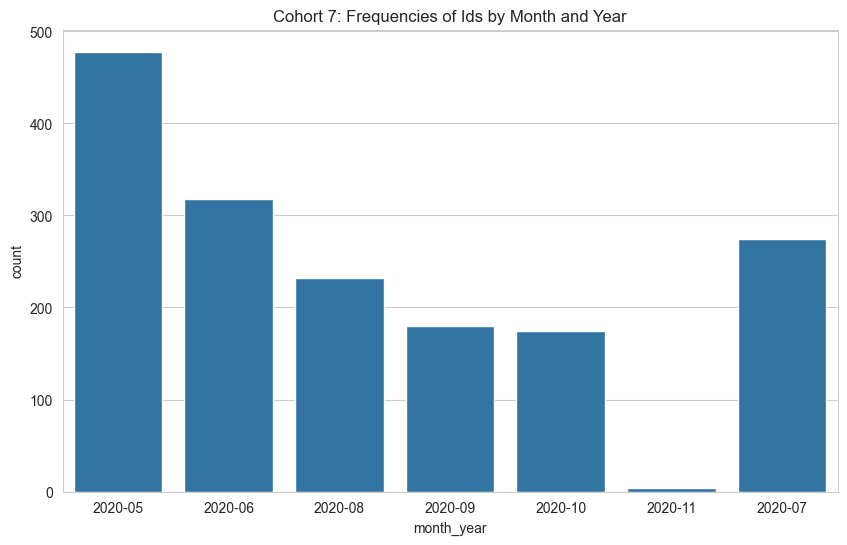

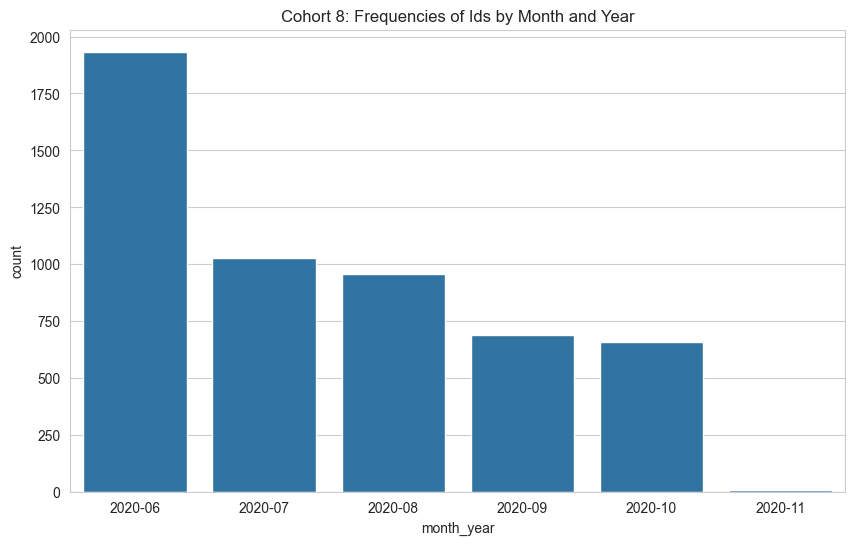

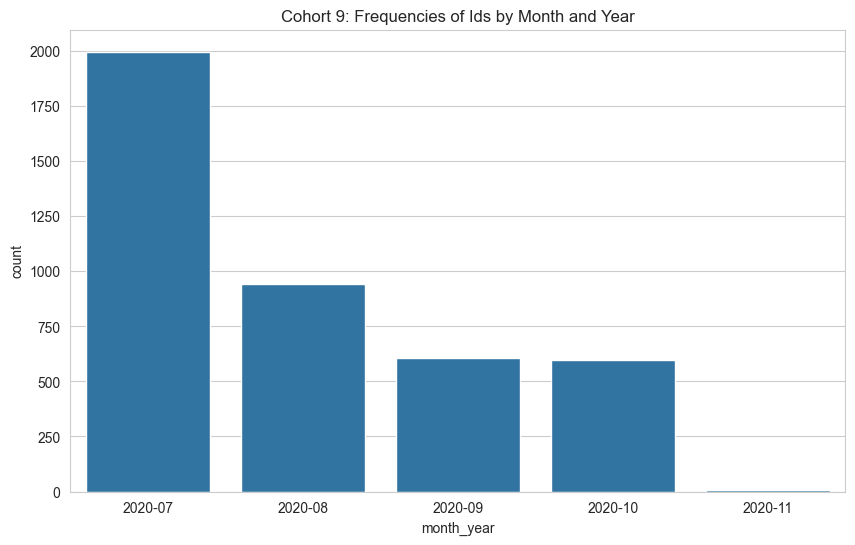

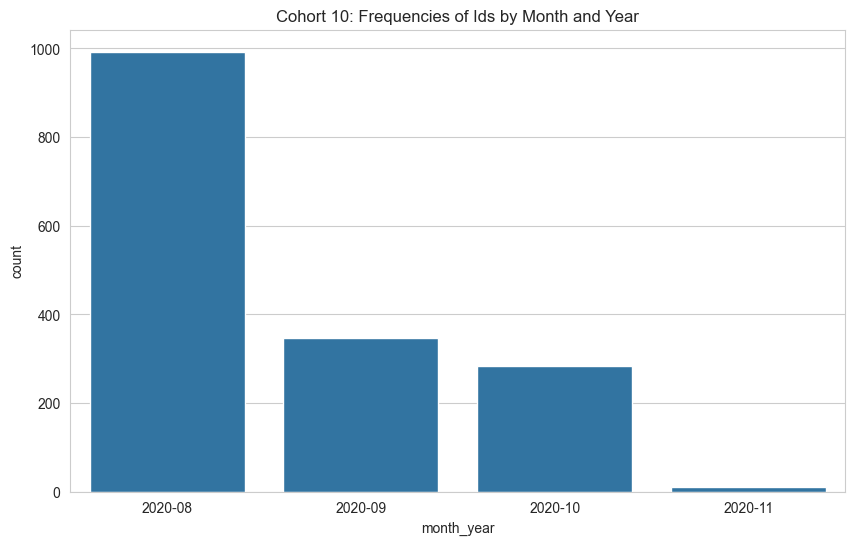

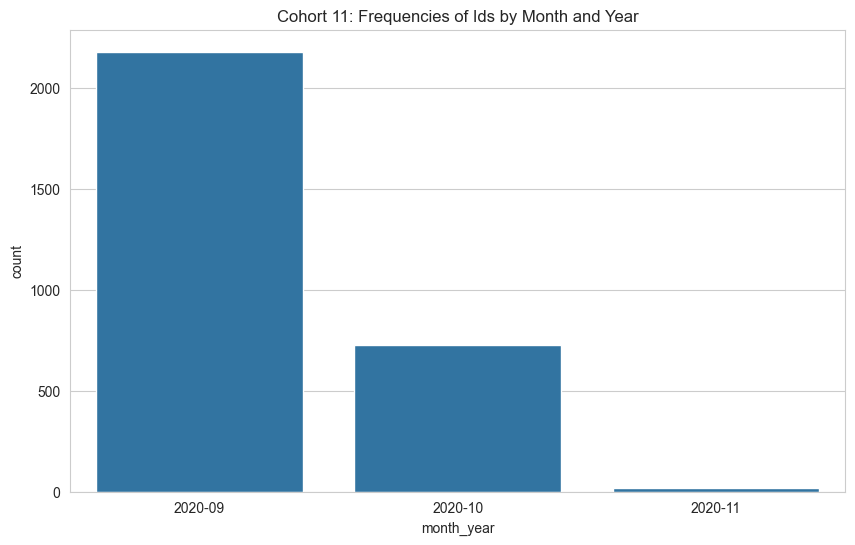

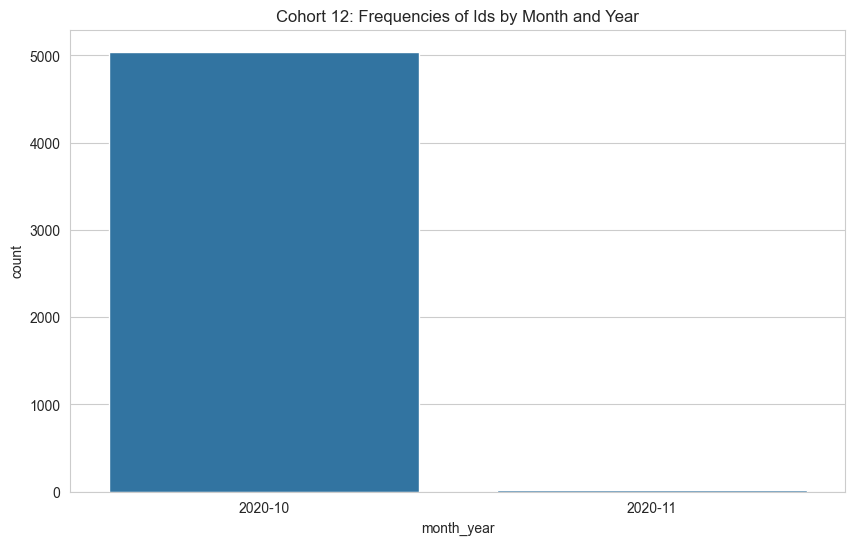

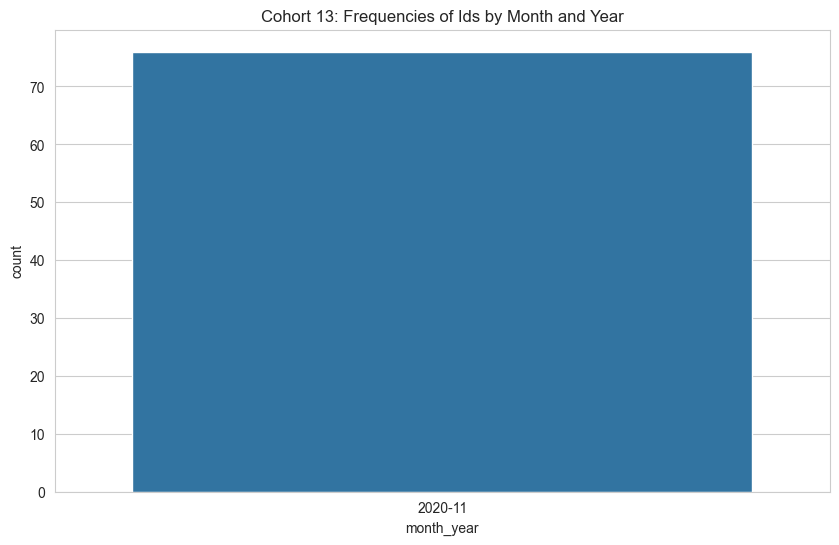

In [30]:
for key, grp in df_cash_m1.groupby('cohort_n'):
    plt.figure(figsize=(10,6))
    sns.countplot(data=grp, x='month_year')
    plt.title(f"Cohort {key}: Frequencies of Ids by Month and Year")

In [31]:
df_cash_m1_t1_cohort

,month_year,count_user_id,cohort_n,cohort_month_year
0,2019-11,1,1,2019-11
1,2019-12,254,2,2019-12
2,2020-01,106,3,2020-01
3,2020-02,90,4,2020-02
4,2020-03,86,5,2020-03
5,2020-04,246,6,2020-04
6,2020-05,432,7,2020-05
7,2020-06,1540,8,2020-06
8,2020-07,1482,9,2020-07
9,2020-08,728,10,2020-08


In [32]:
pivot_df = df_cash_m1.groupby(['cohort_n', 'month_year']).size().reset_index(name='counts')
pivot_df = pivot_df.pivot_table(index='cohort_n', columns='month_year', values='counts', fill_value=0)
pivot_df

month_year,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11
cohort_n,,,,,,,,,,,,,
1,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0
2,0.0,288.0,106.0,63.0,79.0,82.0,86.0,91.0,72.0,84.0,53.0,75.0,1.0
3,0.0,0.0,117.0,24.0,17.0,35.0,31.0,29.0,31.0,22.0,22.0,25.0,1.0
4,0.0,0.0,0.0,97.0,49.0,49.0,45.0,45.0,45.0,44.0,27.0,40.0,0.0
5,0.0,0.0,0.0,0.0,99.0,42.0,46.0,47.0,40.0,36.0,30.0,30.0,1.0
6,0.0,0.0,0.0,0.0,0.0,264.0,150.0,151.0,116.0,107.0,89.0,75.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,478.0,318.0,274.0,232.0,180.0,174.0,4.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1934.0,1027.0,957.0,687.0,656.0,5.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1996.0,941.0,608.0,595.0,7.0


In [33]:
pivot_df = df_cash_m1.groupby(['cohort_n', 'month_year']).size().reset_index(name='counts')
pivot_df = pivot_df.pivot_table(index='month_year', columns='cohort_n', values='counts', fill_value=0)
pivot_df

cohort_n,1,2,3,4,5,6,7,8,9,10,11,12,13
month_year,,,,,,,,,,,,,
2019-11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-12,1.0,288.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01,0.0,106.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02,0.0,63.0,24.0,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03,0.0,79.0,17.0,49.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04,1.0,82.0,35.0,49.0,42.0,264.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05,1.0,86.0,31.0,45.0,46.0,150.0,478.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06,0.0,91.0,29.0,45.0,47.0,151.0,318.0,1934.0,0.0,0.0,0.0,0.0,0.0
2020-07,0.0,72.0,31.0,45.0,40.0,116.0,274.0,1027.0,1996.0,0.0,0.0,0.0,0.0


In [34]:
my_colors = sns.color_palette("tab20")[:13] # type: list
my_palette = sns.color_palette(my_colors) # type: seaborn.palettes._ColorPalette
my_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]

Text(0.5, 1.0, 'Frequency of use of the service for each cohort over time')

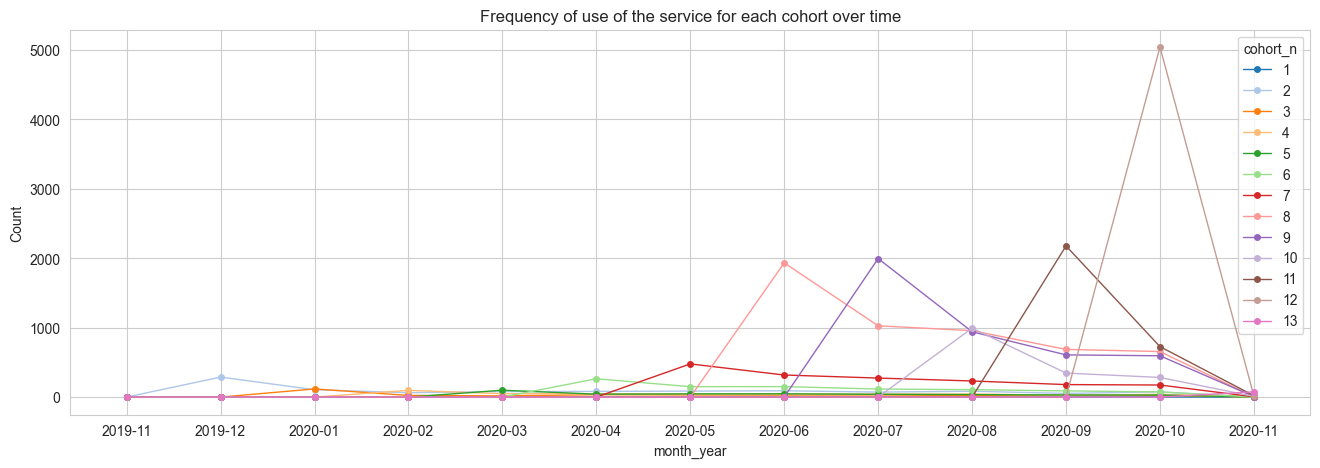

In [35]:
fig, ax = plt.subplots(1, figsize=(16,5))
pivot_df.plot(kind="line", linewidth=1, marker='o', markersize=4, color=my_palette, ax=ax)
plt.ylabel("Count")
plt.legend(title="cohort_n")
plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
plt.title("Frequency of use of the service for each cohort over time")

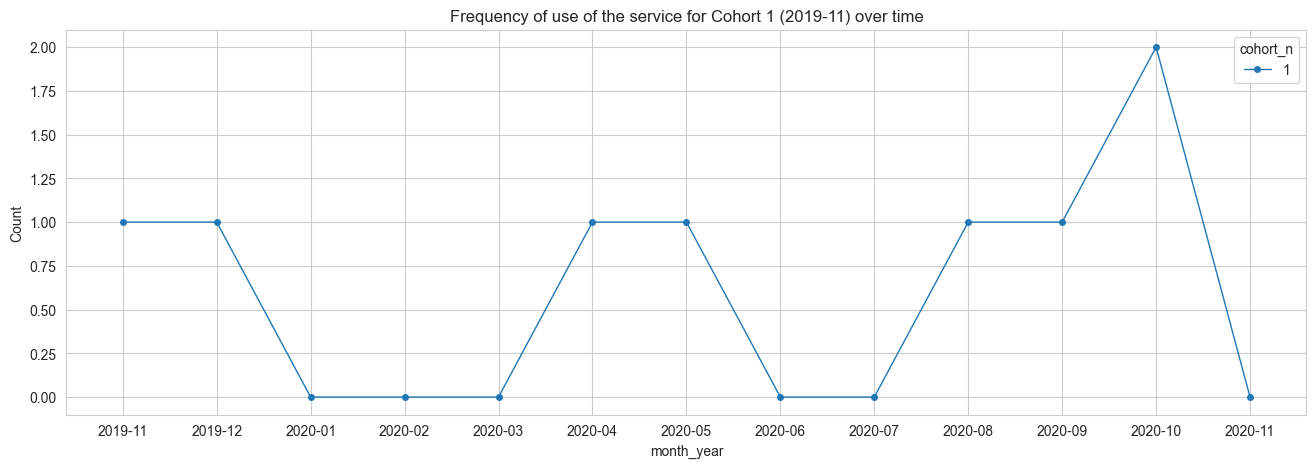

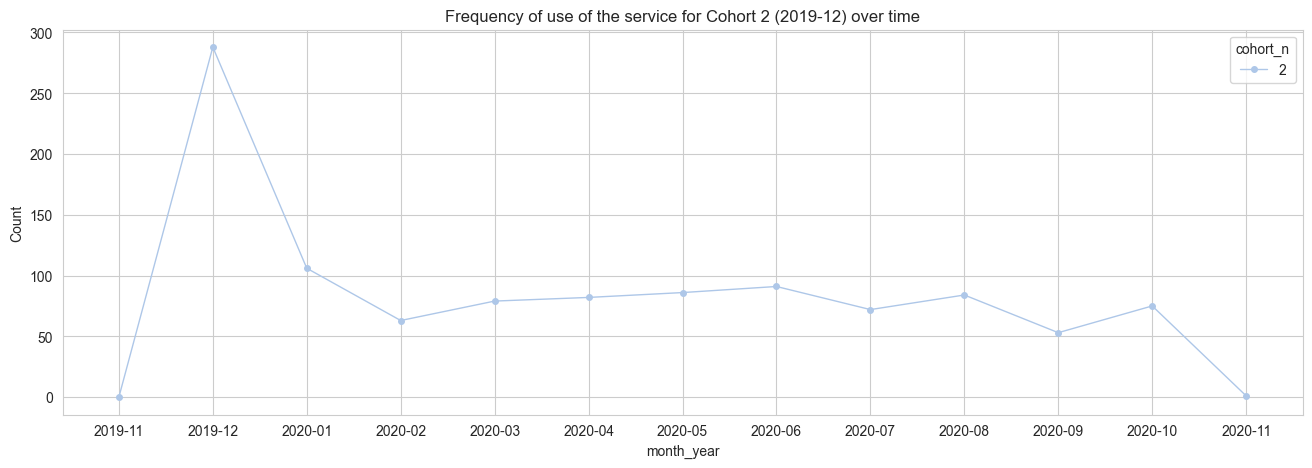

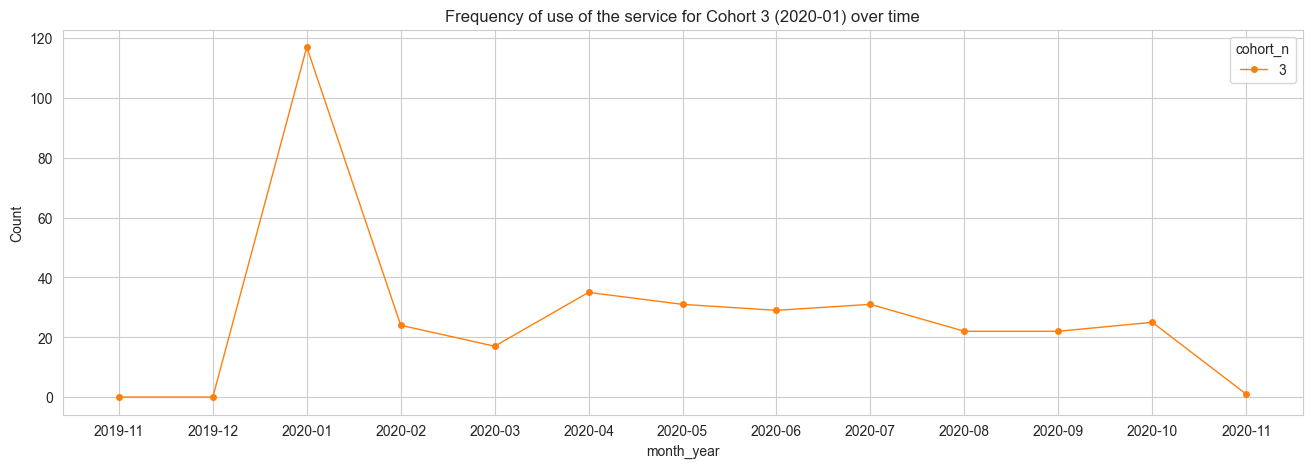

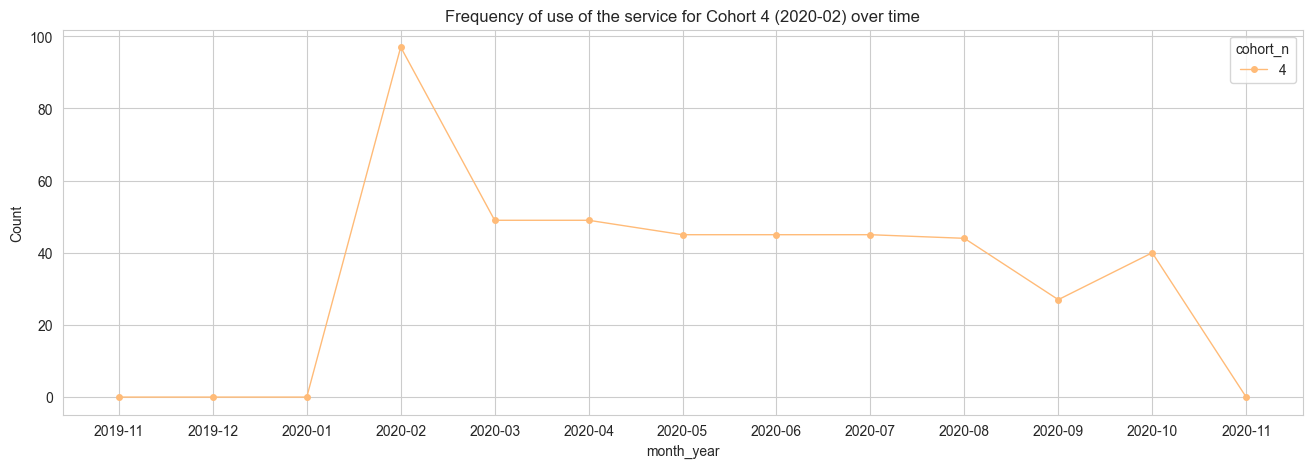

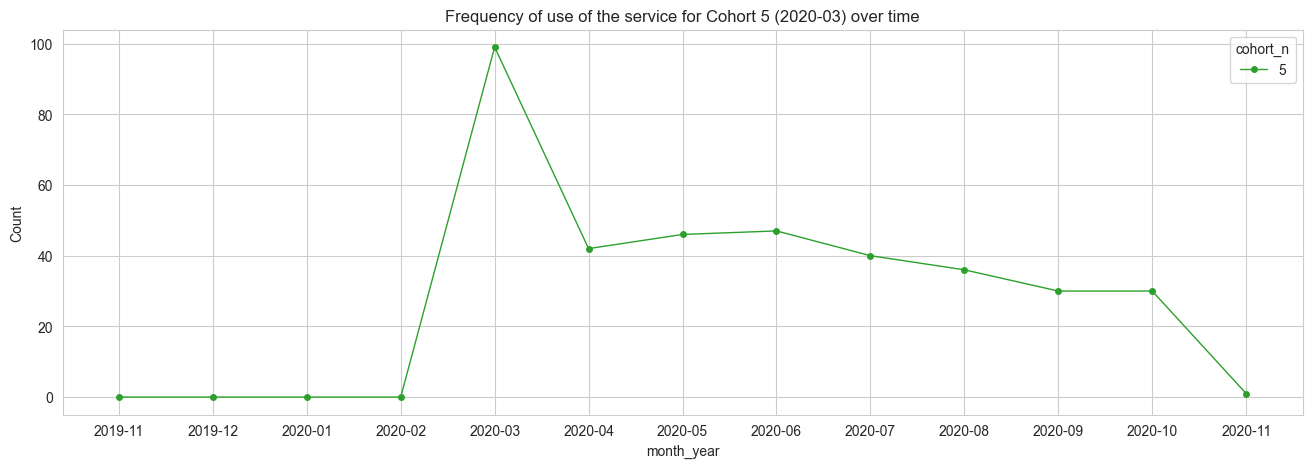

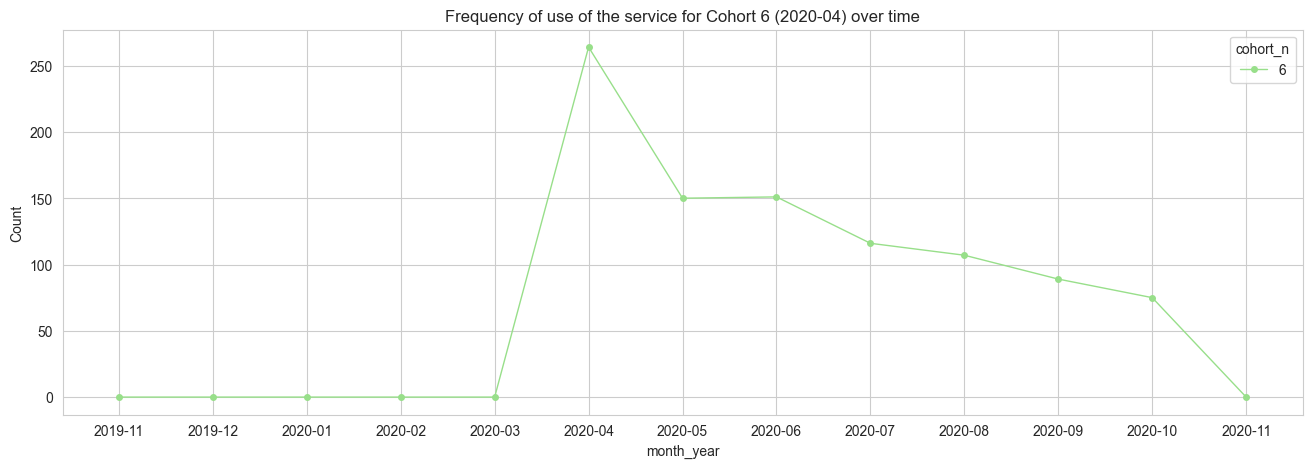

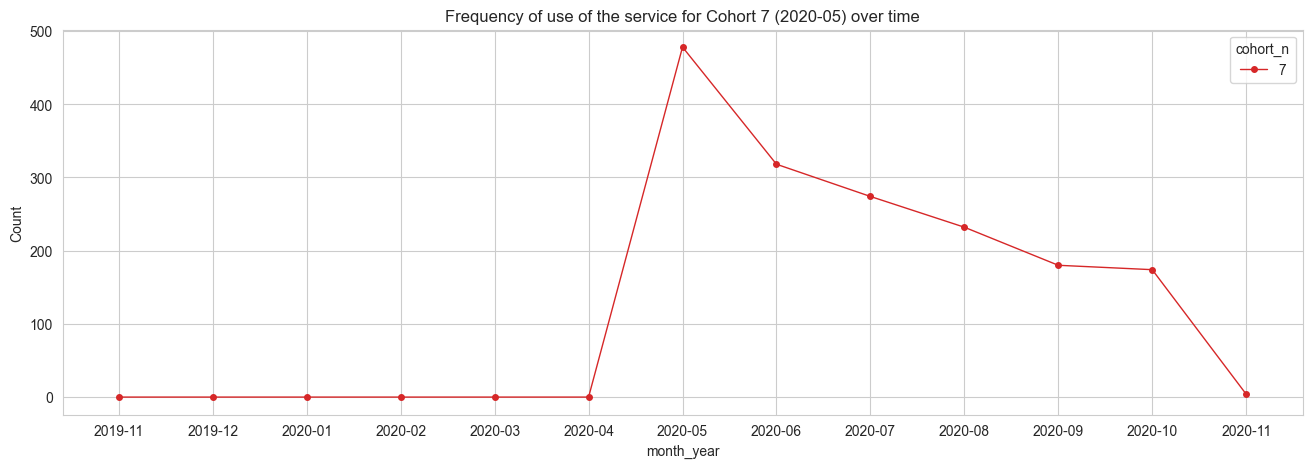

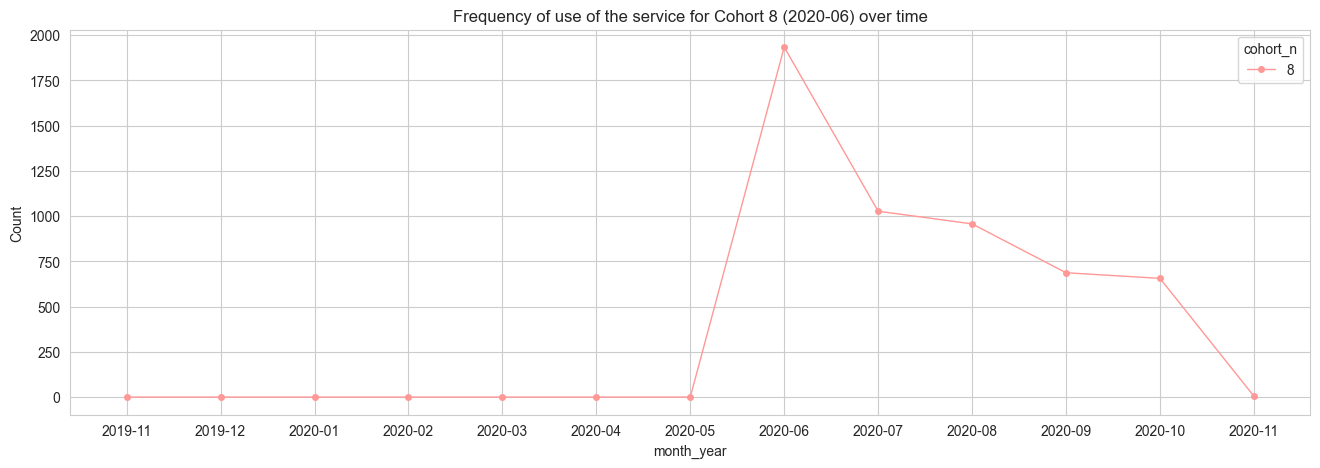

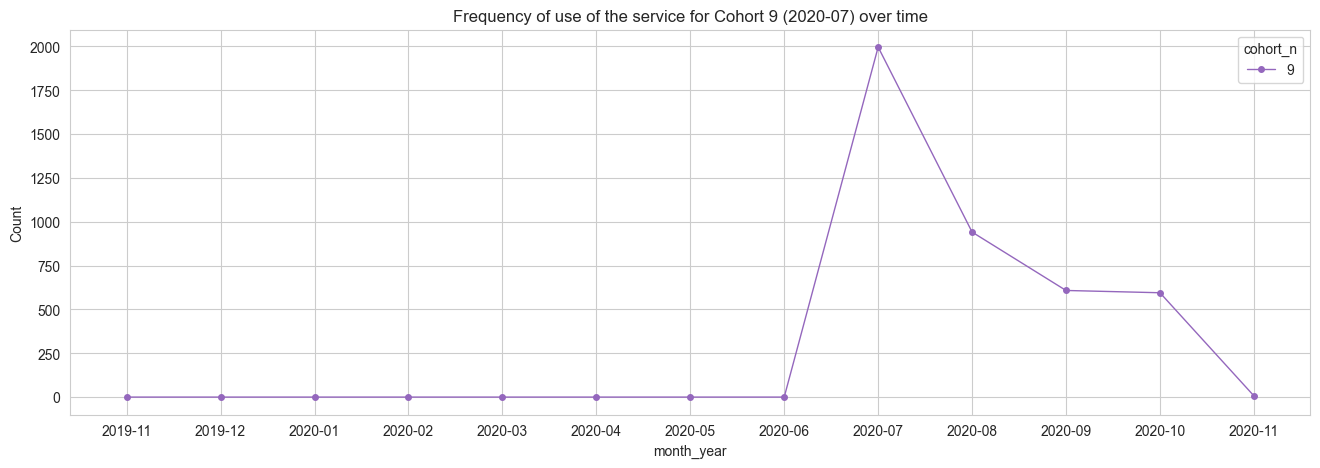

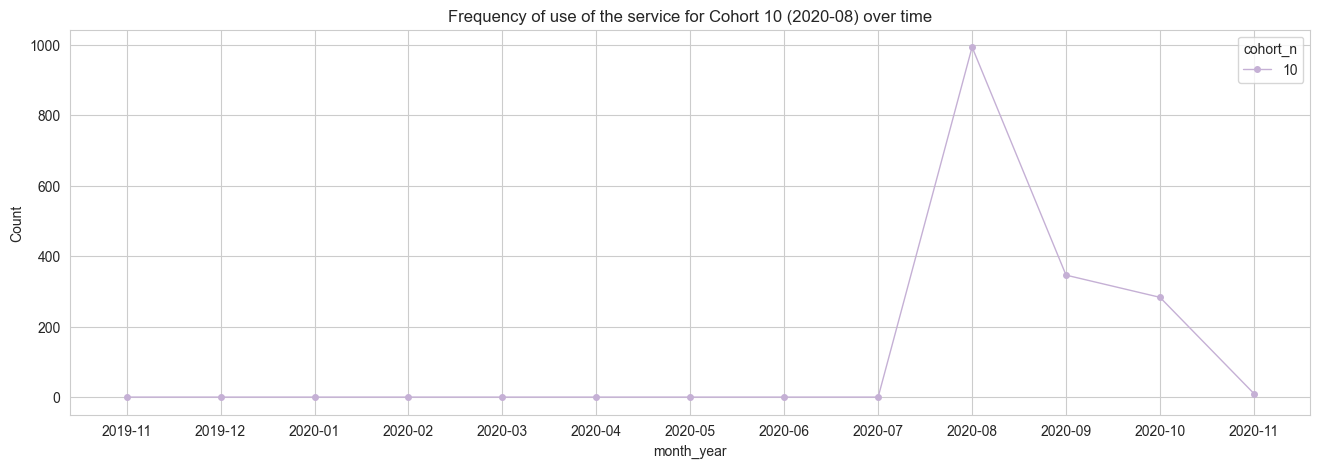

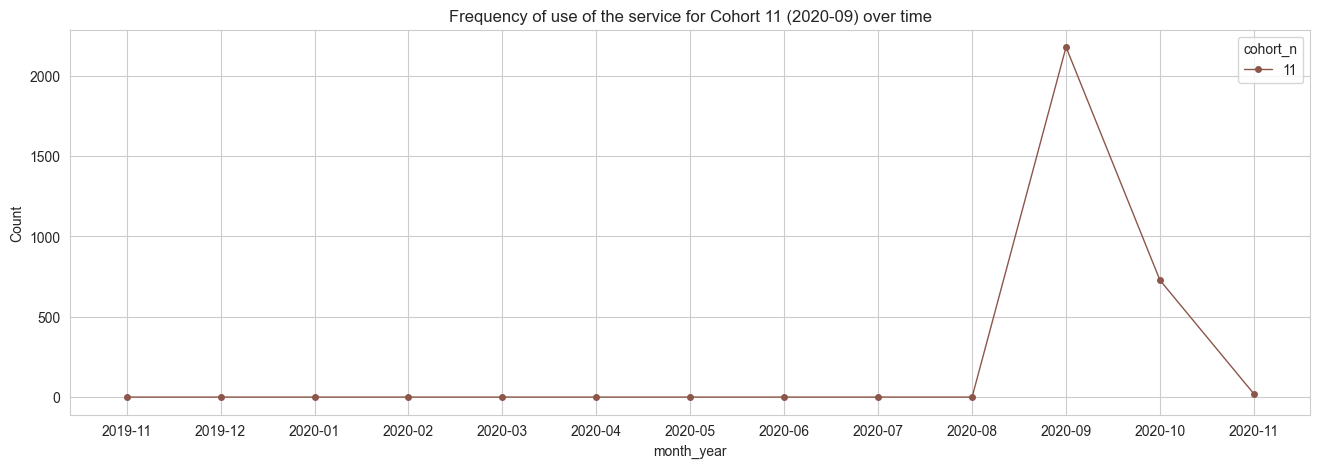

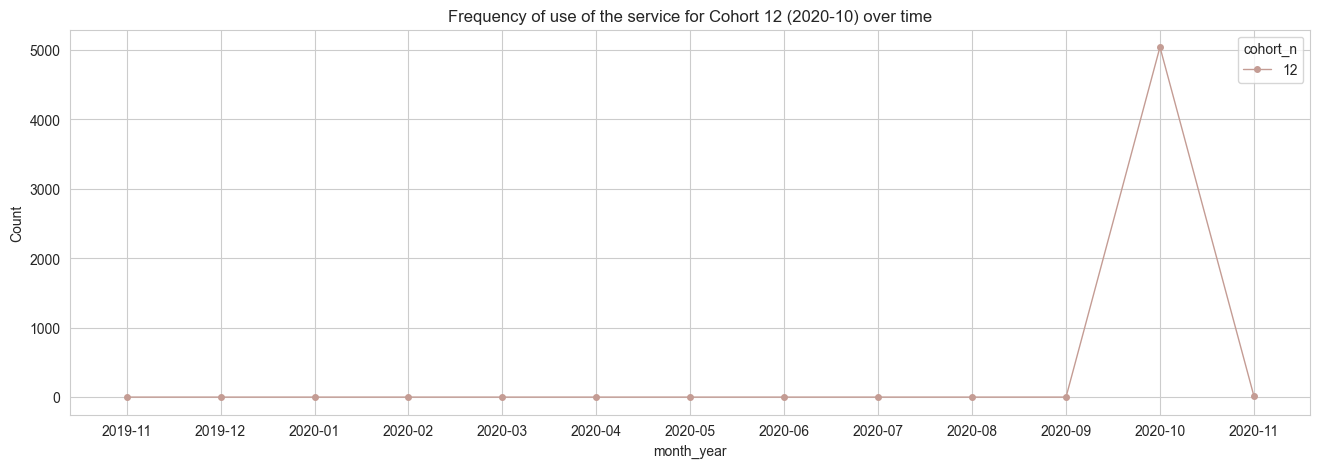

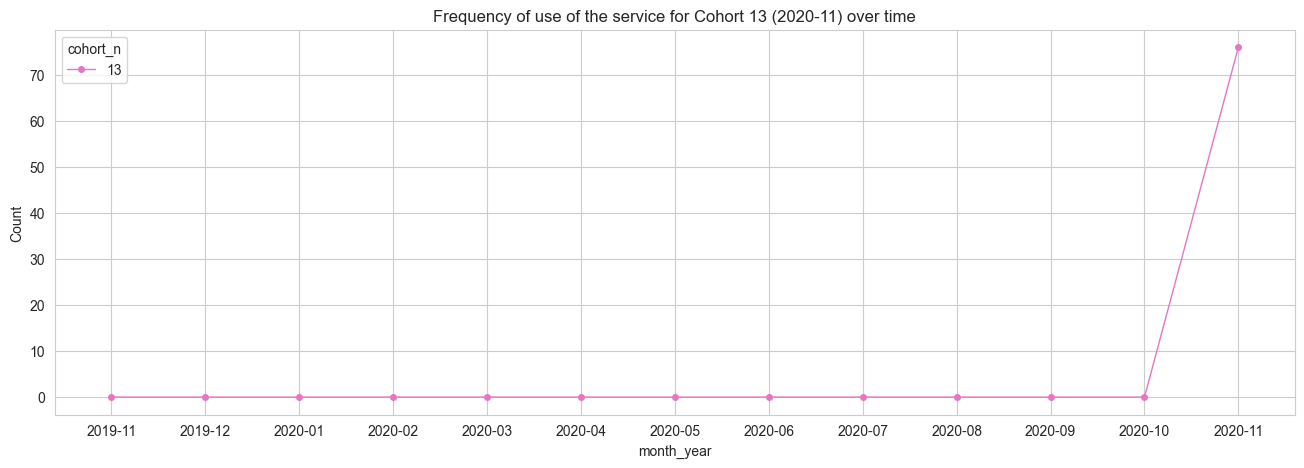

In [36]:
for col in list(pivot_df.columns):
    fig, ax = plt.subplots(1, figsize=(16,5))
    pivot_df[col].plot(kind="line", linewidth=1, marker='o', markersize=4, color=my_colors[col-1], ax=ax)
    plt.xticks(ticks=range(len(pivot_df.index)), labels=pivot_df.index)
    plt.ylabel("Count")
    plt.legend(title="cohort_n")
    col_cohort_month_year = df_cash_m1_t1_cohort[df_cash_m1_t1_cohort.cohort_n == col]['cohort_month_year'].values[0]
    plt.title(f"Frequency of use of the service for Cohort {col} ({col_cohort_month_year}) over time")

## EDA (Exploratory Data Analysis) - df_fees

In [37]:
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


### CASH Dataframe (df_fees)

In [38]:
df_fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21061 non-null  int64  
 1   cash_request_id  21057 non-null  float64
 2   type             21061 non-null  object 
 3   status           21061 non-null  object 
 4   category         2196 non-null   object 
 5   total_amount     21061 non-null  float64
 6   reason           21061 non-null  object 
 7   created_at       21061 non-null  object 
 8   updated_at       21061 non-null  object 
 9   paid_at          15531 non-null  object 
 10  from_date        7766 non-null   object 
 11  to_date          7766 non-null   object 
 12  charge_moment    21061 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.1+ MB


#### Find NaN

In [39]:
#  Encontrar NaN
df_fees.isnull().sum()

id                     0
cash_request_id        4
type                   0
status                 0
category           18865
total_amount           0
reason                 0
created_at             0
updated_at             0
paid_at             5530
from_date          13295
to_date            13295
charge_moment          0
dtype: int64

In [40]:
# NaN user_id
df_fees[(df_fees['category'].isnull().values)]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
5,17029,24052.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 24052,2020-10-24 12:22:27.666102+00,2020-10-24 12:22:27.666124+00,2020-11-09 19:10:14.47407+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


#### value_counts() and unique()

In [41]:
df_cash_m1.head()

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12


In [42]:
df_fees[df_fees.charge_moment == "before"]

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
9,15431,22106.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 22106,2020-10-21 08:48:50.696961+00,2020-10-21 08:48:50.696991+00,NaN,2020-11-04 22:00:00+00,2020-11-05 11:00:00+00,before
11,15434,21897.0,postpone,accepted,NaN,5.0,Postpone Cash Request 21897,2020-10-21 09:00:21.619473+00,2020-10-21 09:00:21.619504+00,2020-10-21 09:00:25.398771+00,2020-10-26 22:00:00+00,2020-10-30 23:00:00+00,before
12,20199,25490.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 25490,2020-10-30 16:51:49.45659+00,2020-10-30 16:51:49.456616+00,NaN,2020-11-06 22:00:00+00,2020-11-12 11:00:00+00,before
17,13949,19876.0,postpone,accepted,NaN,5.0,Postpone Cash Request 19876,2020-10-16 08:34:39.39839+00,2020-10-16 08:34:39.398412+00,2020-10-16 08:34:43.529531+00,2020-10-23 13:25:59.902+00,2020-11-03 23:00:00+00,before
19,19761,24564.0,postpone,cancelled,NaN,5.0,Postpone Cash Request 24564,2020-10-29 14:00:30.956061+00,2020-10-29 14:00:30.956085+00,NaN,2020-10-29 23:00:00+00,2020-10-30 23:00:00+00,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20593,411,3891.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3891,2020-06-22 08:24:47.439636+00,2021-01-20 14:46:09.980392+00,NaN,2020-07-03 22:00:00+00,2020-07-18 22:00:00+00,before
20597,1022,2717.0,postpone,accepted,NaN,5.0,Postpone Cash Request 2717,2020-07-04 10:05:48.68153+00,2021-01-20 16:59:23.745182+00,2020-07-04 10:05:52+00,2020-07-07 22:00:00+00,2020-08-04 22:00:00+00,before
20605,681,3716.0,postpone,accepted,NaN,5.0,Postpone Cash Request 3716,2020-06-26 15:13:10.276716+00,2021-01-21 15:47:52.053382+00,2020-06-26 15:13:45+00,2020-07-20 22:00:00+00,2020-08-04 22:00:00+00,before
20607,4561,10801.0,postpone,accepted,NaN,5.0,Postpone Cash Request 10801,2020-08-21 11:28:54.470364+00,2021-01-21 16:54:46.995586+00,2020-08-21 11:29:00+00,2020-09-08 10:00:00+00,2020-10-07 10:00:00+00,before


In [43]:
for col in df_fees.columns:
    print(f"'{col}' value_counts: {df_fees[col].value_counts()}")
    print(f"'{col}' unique: {df_fees[col].unique()}")
    print(f"'{col}' len(unique): {len(df_fees[col].unique())}\n")

'id' value_counts: id
13301    1
6537     1
6961     1
16296    1
20775    1
        ..
15431    1
20539    1
14187    1
19956    1
17029    1
Name: count, Length: 21061, dtype: int64
'id' unique: [ 6537  6961 16296 ... 18779 16542 13301]
'id' len(unique): 21061

'cash_request_id' value_counts: cash_request_id
12225.0    35
5006.0     28
4410.0     24
12452.0    23
11376.0    21
           ..
22634.0     1
26270.0     1
26178.0     1
20717.0     1
25527.0     1
Name: count, Length: 12933, dtype: int64
'cash_request_id' unique: [14941. 11714. 23371. ... 20262. 26764. 25331.]
'cash_request_id' len(unique): 12934

'type' value_counts: type
instant_payment    11099
postpone            7766
incident            2196
Name: count, dtype: int64
'type' unique: ['instant_payment' 'incident' 'postpone']
'type' len(unique): 3

'status' value_counts: status
accepted     14841
cancelled     4938
rejected      1194
confirmed       88
Name: count, dtype: int64
'status' unique: ['rejected' 'accepted' 'c

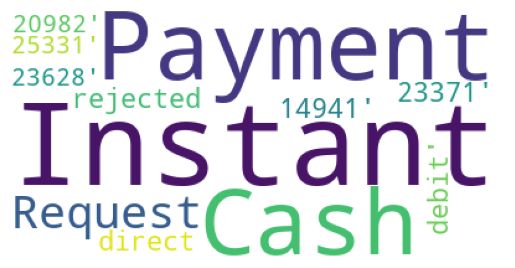

In [44]:
from wordcloud import WordCloud

text = df_fees['reason'].values 
wordcloud = WordCloud(background_color='white').generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [45]:
df_fees[['type', 'from_date', 'to_date']].value_counts(sort=False)
# Son todas postpone

type      from_date               to_date                   
postpone  2020-05-27 22:00:00+00  2020-06-11 22:00:00+00        1
                                  2020-06-27 03:49:38.153+00    1
                                  2020-06-27 10:04:21.934+00    2
                                  2020-06-27 10:23:18.784+00    1
                                  2020-06-27 10:26:44+00        1
                                                               ..
          2020-12-04 11:00:00+00  2020-12-10 11:00:00+00        1
                                  2021-01-03 11:00:00+00        1
          2020-12-04 22:00:00+00  2021-01-01 23:00:00+00        1
          2020-12-18 22:00:00+00  2021-01-02 22:00:00+00        1
          2021-01-02 22:00:00+00  2021-01-17 22:00:00+00        1
Name: count, Length: 3674, dtype: int64

In [46]:
df_fees[['type', 'category']].value_counts(sort=False)

type      category              
incident  month_delay_on_payment     597
          rejected_direct_debit     1599
Name: count, dtype: int64

In [47]:
df_fees[['type', 'status']].value_counts(sort=False)

type             status   
incident         accepted      1560
                 cancelled       97
                 confirmed       19
                 rejected       520
instant_payment  accepted     10296
                 cancelled       61
                 confirmed       69
                 rejected       673
postpone         accepted      2985
                 cancelled     4780
                 rejected         1
Name: count, dtype: int64

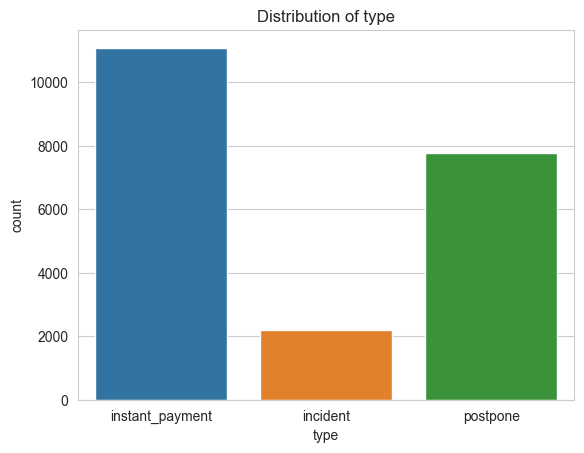

In [48]:
sns.countplot(data=df_fees, x='type', hue='type', palette='tab10')
plt.title("Distribution of type")
plt.show()

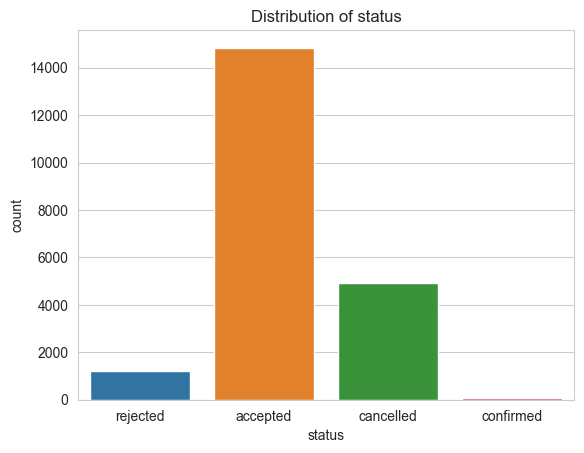

In [49]:
sns.countplot(data=df_fees, x='status', hue='status', palette='tab10')
plt.title("Distribution of status")
plt.show()

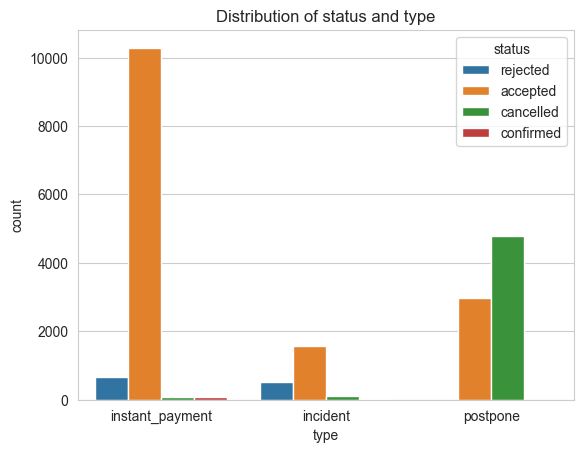

In [50]:
sns.countplot(data=df_fees, x='type', hue='status', palette='tab10')
plt.title("Distribution of status and type")
plt.show()

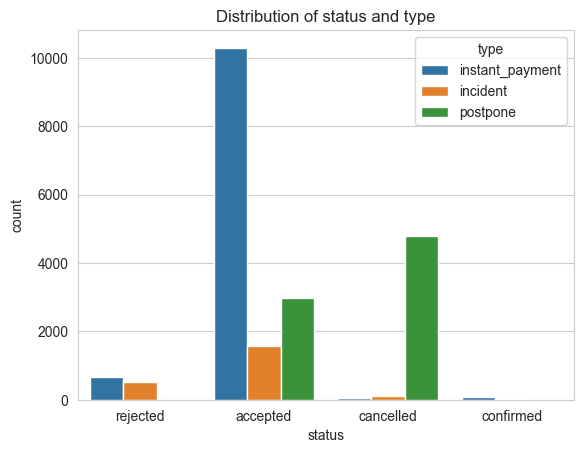

In [51]:
sns.countplot(data=df_fees, x='status', hue='type', palette='tab10')
plt.title("Distribution of status and type")
plt.show()

## 2. **Tasa de Incidentes:** Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.

In [52]:
df_fees['created_at'] = pd.to_datetime(df_fees['created_at'])
df_fees['updated_at'] = pd.to_datetime(df_fees['updated_at'])
# df_fees['paid_at'] = pd.to_datetime(df_fees['paid_at']) #--> tiene NaN

In [53]:
df_cash_m2 = df_cash_m1.copy()
df_cash_m2

,id,new_user_id,status,created_at,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,34,rejected,2020-04-20 15:50:21.187257+00:00,2020-04,April,2020,1,6,2020-04
1,150,35,rejected,2019-12-13 20:27:38.106778+00:00,2019-12,December,2019,1,2,2019-12
2,326,35,rejected,2019-12-28 04:00:22.349592+00:00,2019-12,December,2019,2,2,2019-12
3,510,35,rejected,2020-01-27 19:50:46.387431+00:00,2020-01,January,2020,3,2,2019-12
4,758,35,rejected,2020-02-28 10:51:11.440880+00:00,2020-02,February,2020,4,2,2019-12
...,...,...,...,...,...,...,...,...,...,...
23965,26992,103425,money_back,2020-11-01 20:31:53.965482+00:00,2020-11,November,2020,1,13,2020-11
23966,26984,103437,money_back,2020-11-01 19:35:00.540424+00:00,2020-11,November,2020,1,13,2020-11
23967,26983,103496,money_back,2020-11-01 19:30:26.434400+00:00,2020-11,November,2020,1,13,2020-11
23968,26989,103503,money_back,2020-11-01 20:12:26.857203+00:00,2020-11,November,2020,1,13,2020-11


In [54]:
df_cash_m2.dtypes

id                                 int64
new_user_id                        int64
status                            object
created_at           datetime64[ns, UTC]
month_year                        object
month_name                        object
year                               int32
n_transaction                      int64
cohort_n                           int64
cohort_month_year                 object
dtype: object

In [55]:
df_fees.dtypes

id                               int64
cash_request_id                float64
type                            object
status                          object
category                        object
total_amount                   float64
reason                          object
created_at         datetime64[ns, UTC]
updated_at         datetime64[ns, UTC]
paid_at                         object
from_date                       object
to_date                         object
charge_moment                   object
dtype: object

In [56]:
df_fees[df_fees['cash_request_id'].isnull().values]
# No hay manera de identificar estas fees, ya que tienen cash_request_id, por ello hacemos un dropna para quitar los NaN

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
1911,2990,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11164,2020-08-06 22:42:34.525373+00:00,2020-11-04 16:01:17.296048+00:00,NaN,NaN,NaN,after
1960,3124,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11444,2020-08-08 06:33:06.244651+00:00,2020-11-04 16:01:08.332978+00:00,NaN,NaN,NaN,after
4605,5185,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 11788,2020-08-26 09:39:37.362933+00:00,2020-11-04 16:01:36.492576+00:00,NaN,NaN,NaN,after
11870,3590,NaN,instant_payment,cancelled,NaN,5.0,Instant Payment Cash Request 12212,2020-08-12 14:20:06.657075+00:00,2020-11-04 16:01:53.106416+00:00,NaN,NaN,NaN,after


In [57]:
df_fees.dropna(subset='cash_request_id', inplace=True)
df_fees

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00,NaN,NaN,after
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00:00,2020-10-13 14:25:04.180490+00:00,2020-11-17 05:14:00.080854+00,NaN,NaN,after
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00:00,2020-12-16 07:10:54.697639+00,NaN,NaN,after
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00:00,2020-10-27 17:28:51.749200+00:00,2020-11-18 04:35:42.915511+00,NaN,NaN,after
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00:00,2020-10-23 16:27:52.047486+00:00,2020-12-18 05:18:01.465317+00,NaN,NaN,after


In [58]:
df_fees['cash_request_id'] = df_fees['cash_request_id'].astype(int)
df_fees.dtypes

id                               int64
cash_request_id                  int64
type                            object
status                          object
category                        object
total_amount                   float64
reason                          object
created_at         datetime64[ns, UTC]
updated_at         datetime64[ns, UTC]
paid_at                         object
from_date                       object
to_date                         object
charge_moment                   object
dtype: object

In [59]:
# Necesitamos reimbursement_date para la metrica 2, así rellenaremos los paid_at NaN de after. Los paid_at de before irán rellenados con created at.

In [60]:
df_cash[['new_user_id','id','reimbursement_date']]

,new_user_id,id,reimbursement_date
0,804,5,2020-01-09 19:05:21.596363+00
1,231,70,2020-01-09 19:50:12.34778+00
2,191,7,2020-01-09 19:13:35.825041+00
3,761,10,2020-01-09 19:16:10.879606+00
4,7686,1594,2020-06-05 22:00:00+00
...,...,...,...
23965,13681,20616,2021-02-06 11:00:00+00
23966,30367,25243,2020-11-03 22:00:00+00
23967,82122,22357,2021-02-05 11:00:00+00
23968,64517,20256,2021-02-05 11:00:00+00


In [61]:
df_merged = pd.merge(df_fees, df_cash[['new_user_id','id', 'reimbursement_date', 'status', 'money_back_date']], left_on='cash_request_id', right_on='id', suffixes=('_fees', '_cash'))
df_merged.head()

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,new_user_id,id_cash,reimbursement_date,status_cash,money_back_date
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,35661,14941,2020-10-01 22:00:00+00,direct_debit_rejected,2020-10-06 22:00:00+00
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,16158,11714,2020-09-07 22:00:00+00,money_back,2020-12-02 03:02:41.180953+00
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,81575,23371,2020-11-04 22:00:00+00,money_back,2020-11-04 19:34:37.399122+00
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,94393,26772,2020-11-11 23:51:00+00,money_back,2020-11-17 23:00:00+00
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,19005,19350,2020-10-30 11:00:00+00,money_back,2020-11-02 14:45:20.315696+00


In [62]:
df_cash_m2[['id', 'month_year', 'month_name', 'year', 'n_transaction', 'cohort_n', 'cohort_month_year']]

,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,1302,2020-04,April,2020,1,6,2020-04
1,150,2019-12,December,2019,1,2,2019-12
2,326,2019-12,December,2019,2,2,2019-12
3,510,2020-01,January,2020,3,2,2019-12
4,758,2020-02,February,2020,4,2,2019-12
...,...,...,...,...,...,...,...
23965,26992,2020-11,November,2020,1,13,2020-11
23966,26984,2020-11,November,2020,1,13,2020-11
23967,26983,2020-11,November,2020,1,13,2020-11
23968,26989,2020-11,November,2020,1,13,2020-11


In [63]:
df_cash_m2.columns

Index(['id', 'new_user_id', 'status', 'created_at', 'month_year', 'month_name',
       'year', 'n_transaction', 'cohort_n', 'cohort_month_year'],
      dtype='object')

In [64]:
df_merged.head()

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,new_user_id,id_cash,reimbursement_date,status_cash,money_back_date
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,35661,14941,2020-10-01 22:00:00+00,direct_debit_rejected,2020-10-06 22:00:00+00
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,16158,11714,2020-09-07 22:00:00+00,money_back,2020-12-02 03:02:41.180953+00
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,81575,23371,2020-11-04 22:00:00+00,money_back,2020-11-04 19:34:37.399122+00
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,94393,26772,2020-11-11 23:51:00+00,money_back,2020-11-17 23:00:00+00
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,19005,19350,2020-10-30 11:00:00+00,money_back,2020-11-02 14:45:20.315696+00


In [65]:
df_cash_m2_merged = pd.merge(df_merged, 
         df_cash_m2[['id', 'month_year', 'month_name', 'year', 'n_transaction', 'cohort_n', 'cohort_month_year']],
         left_on='cash_request_id', right_on='id')
df_cash_m2_merged

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,...,reimbursement_date,status_cash,money_back_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.47011+00,...,2020-10-01 22:00:00+00,direct_debit_rejected,2020-10-06 22:00:00+00,14941,2020-09,September,2020,1,11,2020-09
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.45908+00,...,2020-09-07 22:00:00+00,money_back,2020-12-02 03:02:41.180953+00,11714,2020-08,August,2020,3,8,2020-06
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.43291+00,...,2020-11-04 22:00:00+00,money_back,2020-11-04 19:34:37.399122+00,23371,2020-10,October,2020,1,12,2020-10
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00,...,2020-11-11 23:51:00+00,money_back,2020-11-17 23:00:00+00,26772,2020-10,October,2020,1,12,2020-10
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00,...,2020-10-30 11:00:00+00,money_back,2020-11-02 14:45:20.315696+00,19350,2020-10,October,2020,5,8,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,12372,20262,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00:00,2020-10-13 14:25:04.180490+00:00,2020-11-17 05:14:00.080854+00,...,2020-11-10 11:00:00+00,direct_debit_rejected,2020-11-16 23:00:00+00,20262,2020-10,October,2020,1,12,2020-10
21053,20768,26764,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00:00,2020-12-16 07:10:54.697639+00,...,2020-11-10 23:51:00+00,direct_debit_rejected,NaN,26764,2020-10,October,2020,1,12,2020-10
21054,18779,25331,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00:00,2020-10-27 17:28:51.749200+00:00,2020-11-18 04:35:42.915511+00,...,2020-11-10 23:51:00+00,direct_debit_rejected,NaN,25331,2020-10,October,2020,1,12,2020-10
21055,16542,23628,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00:00,2020-10-23 16:27:52.047486+00:00,2020-12-18 05:18:01.465317+00,...,2020-11-15 11:00:00+00,direct_debit_rejected,NaN,23628,2020-10,October,2020,1,12,2020-10


In [66]:
df_cash_m2_merged[df_cash_m2_merged['paid_at'].isnull().values]

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,...,reimbursement_date,status_cash,money_back_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
9,15431,22106,postpone,cancelled,NaN,5.0,Postpone Cash Request 22106,2020-10-21 08:48:50.696961+00:00,2020-10-21 08:48:50.696991+00:00,NaN,...,2020-11-04 22:00:00+00,money_back,2020-11-05 04:36:18.089502+00,22106,2020-10,October,2020,1,12,2020-10
12,20199,25490,postpone,cancelled,NaN,5.0,Postpone Cash Request 25490,2020-10-30 16:51:49.456590+00:00,2020-10-30 16:51:49.456616+00:00,NaN,...,2020-11-06 22:00:00+00,money_back,2020-11-06 19:40:41.661071+00,25490,2020-10,October,2020,1,12,2020-10
19,19761,24564,postpone,cancelled,NaN,5.0,Postpone Cash Request 24564,2020-10-29 14:00:30.956061+00:00,2020-10-29 14:00:30.956085+00:00,NaN,...,2020-10-29 23:00:00+00,money_back,2020-10-29 23:35:52.398629+00,24564,2020-10,October,2020,2,11,2020-09
21,20530,19909,postpone,cancelled,NaN,5.0,Postpone Cash Request 19909,2020-10-31 01:49:46.485098+00:00,2020-10-31 01:49:46.485121+00:00,NaN,...,2020-11-03 23:51:00+00,money_back,2020-11-04 19:44:46.671361+00,19909,2020-10,October,2020,1,12,2020-10
29,16690,22251,postpone,cancelled,NaN,5.0,Postpone Cash Request 22251,2020-10-23 19:27:18.036963+00:00,2020-10-23 19:27:18.036987+00:00,NaN,...,2020-10-31 11:00:00+00,money_back,2020-11-03 23:00:00+00,22251,2020-10,October,2020,1,12,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21032,10380,13819,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-01 22:23:36.045376+00:00,2020-10-13 14:25:11.169963+00:00,NaN,...,2020-09-20 23:51:00+00,direct_debit_rejected,2020-09-24 22:00:00+00,13819,2020-08,August,2020,3,10,2020-08
21033,20919,13819,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 11/2020,2020-10-31 23:37:08.778572+00:00,2020-10-31 23:37:08.778600+00:00,NaN,...,2020-09-20 23:51:00+00,direct_debit_rejected,2020-09-24 22:00:00+00,13819,2020-08,August,2020,3,10,2020-08
21042,12566,8952,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:30.997317+00:00,2020-10-13 14:25:18.627143+00:00,NaN,...,2020-08-05 22:00:00+00,direct_debit_rejected,NaN,8952,2020-07,July,2020,1,9,2020-07
21043,13537,14289,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-14 22:35:49.950325+00:00,2020-10-14 22:35:49.950347+00:00,NaN,...,2020-10-02 22:00:00+00,direct_debit_rejected,NaN,14289,2020-09,September,2020,3,9,2020-07


Necesitamos reimbursement_date para la metrica 2, así rellenaremos los paid_at NaN de after. Los paid_at de before irán rellenados con created at.

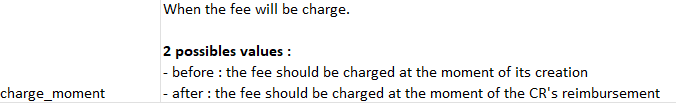

In [67]:
# Para conseguir dtype datetype en 'paid_at'. Deprecated, con format='mixed'
"""
mask_notnan = (~df_cash_m2_merged['paid_at'].isnull().values)
mask_nan_paid_before = (df_cash_m2_merged['paid_at'].isnull().values) & (df_cash_m2_merged['charge_moment'] == "before")
mask_nan_paid_after = (df_cash_m2_merged['paid_at'].isnull().values) & (df_cash_m2_merged['charge_moment'] == "after")
print("Len paid_nan_before: ", len(df_cash_m2_merged[mask_nan_paid_before]))
print("Len paid_nan_after: ", len(df_cash_m2_merged[mask_nan_paid_after]))
df_cash_m2_merged[['reimbursement_date']].head(20)
series_reimbursement_date_withfloat= pd.to_datetime(df_cash_m2_merged['reimbursement_date'], format="%Y-%m-%d %H:%M:%S.%f%z", errors="coerce") # Con float
#series_reimbursement_date_withfloat = series_reimbursement_date_withfloat.dt.strftime("%Y-%m-%d %H:%M:%S%z")
series_reimbursement_date_withfloat.head(15)
series_reimbursement_date_withoutfloat = pd.to_datetime(df_cash_m2_merged['reimbursement_date'], format="%Y-%m-%d %H:%M:%S%z", errors="coerce") # Sin float
series_reimbursement_date_withoutfloat
df_cash_m2_merged['reimbursement_date'] = series_reimbursement_date_withoutfloat.fillna(series_reimbursement_date_withfloat)
df_cash_m2_merged[mask_nan_paid_before]['created_at'].dt.strftime("%Y-%m-%d %H:%M:%S%z")
df_cash_m2_merged[mask_nan_paid_before]['paid_at'].fillna(df_cash_m2_merged[mask_nan_paid_before]['created_at'].dt.strftime("%Y-%m-%d %H:%M:%S%z")) """

'\nmask_notnan = (~df_cash_m2_merged[\'paid_at\'].isnull().values)\nmask_nan_paid_before = (df_cash_m2_merged[\'paid_at\'].isnull().values) & (df_cash_m2_merged[\'charge_moment\'] == "before")\nmask_nan_paid_after = (df_cash_m2_merged[\'paid_at\'].isnull().values) & (df_cash_m2_merged[\'charge_moment\'] == "after")\nprint("Len paid_nan_before: ", len(df_cash_m2_merged[mask_nan_paid_before]))\nprint("Len paid_nan_after: ", len(df_cash_m2_merged[mask_nan_paid_after]))\ndf_cash_m2_merged[[\'reimbursement_date\']].head(20)\nseries_reimbursement_date_withfloat= pd.to_datetime(df_cash_m2_merged[\'reimbursement_date\'], format="%Y-%m-%d %H:%M:%S.%f%z", errors="coerce") # Con float\n#series_reimbursement_date_withfloat = series_reimbursement_date_withfloat.dt.strftime("%Y-%m-%d %H:%M:%S%z")\nseries_reimbursement_date_withfloat.head(15)\nseries_reimbursement_date_withoutfloat = pd.to_datetime(df_cash_m2_merged[\'reimbursement_date\'], format="%Y-%m-%d %H:%M:%S%z", errors="coerce") # Sin float\n

In [68]:
df_cash_m2_merged['paid_at'] = pd.to_datetime(df_cash_m2_merged['paid_at'], format="mixed")
df_cash_m2_merged['reimbursement_date'] = pd.to_datetime(df_cash_m2_merged['reimbursement_date'], format="mixed")
df_cash_m2_merged.dtypes

id_fees                             int64
cash_request_id                     int64
type                               object
status_fees                        object
category                           object
total_amount                      float64
reason                             object
created_at            datetime64[ns, UTC]
updated_at            datetime64[ns, UTC]
paid_at               datetime64[ns, UTC]
from_date                          object
to_date                            object
charge_moment                      object
new_user_id                         int64
id_cash                             int64
reimbursement_date    datetime64[ns, UTC]
status_cash                        object
money_back_date                    object
id                                  int64
month_year                         object
month_name                         object
year                                int32
n_transaction                       int64
cohort_n                          

In [69]:
#df_cash_m2_merged[mask_nan_paid_before]['created_at'].dt.strftime("%Y-%m-%d %H:%M:%S%z")

In [70]:
#df_cash_m2_merged[mask_nan_paid_before]['paid_at'].fillna(df_cash_m2_merged[mask_nan_paid_before]['created_at'].dt.strftime("%Y-%m-%d %H:%M:%S%z"))

In [71]:
# Metric 2
df_cash_m2_merged_incident = df_cash_m2_merged[df_cash_m2_merged['type'] == 'incident']
df_cash_m2_merged_incident

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,...,reimbursement_date,status_cash,money_back_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,...,2020-09-07 22:00:00+00:00,money_back,2020-12-02 03:02:41.180953+00,11714,2020-08,August,2020,3,8,2020-06
7,14187,14839,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:50.655967+00:00,2020-10-16 23:48:50.655988+00:00,2020-11-05 14:15:36.600041+00:00,...,2020-10-05 22:00:00+00:00,money_back,2020-11-02 00:30:08.780333+00,14839,2020-09,September,2020,3,9,2020-07
15,14420,17963,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:18:53.924407+00:00,2020-10-17 22:18:53.924429+00:00,2020-10-17 22:19:00.109110+00:00,...,2020-10-05 23:51:00+00:00,money_back,2020-10-28 02:02:13.921941+00,17963,2020-09,September,2020,2,10,2020-08
27,14433,10287,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-17 22:19:48.806283+00:00,2020-10-17 22:19:48.806303+00:00,2020-12-17 14:33:35.516056+00:00,...,2020-10-08 10:00:00+00:00,direct_debit_rejected,NaN,10287,2020-07,July,2020,1,9,2020-07
40,14188,15989,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-10-16 23:48:52.168550+00:00,2020-10-16 23:48:52.168578+00:00,2020-11-16 13:33:09.113667+00:00,...,2020-10-05 22:00:00+00:00,money_back,2020-11-16 13:33:09.065975+00,15989,2020-09,September,2020,4,8,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21040,3491,8952,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 23:00:44.214576+00:00,2020-10-13 14:25:02.938088+00:00,2020-10-08 07:24:45.091469+00:00,...,2020-08-05 22:00:00+00:00,direct_debit_rejected,NaN,8952,2020-07,July,2020,1,9,2020-07
21041,7166,8952,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-11 01:37:43.458593+00:00,2020-10-13 14:25:02.546591+00:00,2020-10-08 07:24:44.561304+00:00,...,2020-08-05 22:00:00+00:00,direct_debit_rejected,NaN,8952,2020-07,July,2020,1,9,2020-07
21042,12566,8952,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:30.997317+00:00,2020-10-13 14:25:18.627143+00:00,NaT,...,2020-08-05 22:00:00+00:00,direct_debit_rejected,NaN,8952,2020-07,July,2020,1,9,2020-07
21043,13537,14289,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-10-14 22:35:49.950325+00:00,2020-10-14 22:35:49.950347+00:00,NaT,...,2020-10-02 22:00:00+00:00,direct_debit_rejected,NaN,14289,2020-09,September,2020,3,9,2020-07


In [72]:
df_totalfees_counts_m2 = df_cash_m2_merged.groupby(['cohort_n']).size().reset_index(name='total_fees')
df_totalfees_counts_m2

,cohort_n,total_fees
0,1,10
1,2,311
2,3,131
3,4,193
4,5,174
5,6,513
6,7,1186
7,8,4499
8,9,3435
9,10,1419


In [73]:
df_incident_counts_m2 = df_cash_m2_merged_incident.groupby(['cohort_n', 'cohort_month_year']).size().reset_index(name='counts')
df_incident_counts_m2

,cohort_n,cohort_month_year,counts
0,2,2019-12,53
1,3,2020-01,15
2,4,2020-02,24
3,5,2020-03,32
4,6,2020-04,119
5,7,2020-05,234
6,8,2020-06,776
7,9,2020-07,576
8,10,2020-08,149
9,11,2020-09,195


In [74]:
df_incident_rate_m2 = pd.merge(df_totalfees_counts_m2,df_incident_counts_m2, on='cohort_n')
df_incident_rate_m2['rate'] = df_incident_rate_m2['counts'] / df_incident_rate_m2['total_fees'] *100

df_incident_rate_m2

,cohort_n,total_fees,cohort_month_year,counts,rate
0,2,311,2019-12,53,17.041801
1,3,131,2020-01,15,11.450382
2,4,193,2020-02,24,12.435233
3,5,174,2020-03,32,18.390805
4,6,513,2020-04,119,23.196881
5,7,1186,2020-05,234,19.730185
6,8,4499,2020-06,776,17.248277
7,9,3435,2020-07,576,16.768559
8,10,1419,2020-08,149,10.500352
9,11,3220,2020-09,195,6.055901


In [75]:
df_cash_m2_merged[df_cash_m2_merged['cohort_n']==2].value_counts(['cohort_n','type'], sort=False, normalize=True)

cohort_n  type           
2         incident           0.170418
          instant_payment    0.411576
          postpone           0.418006
Name: proportion, dtype: float64

C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\2364885278.py:3: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.barplot(data=df_incident_rate_m2, x='cohort_n', y='rate', hue='cohort_n', palette=my_colors[1:])


Text(0.5, 1.0, 'Incident Rate (%) over all the fees by cohort')

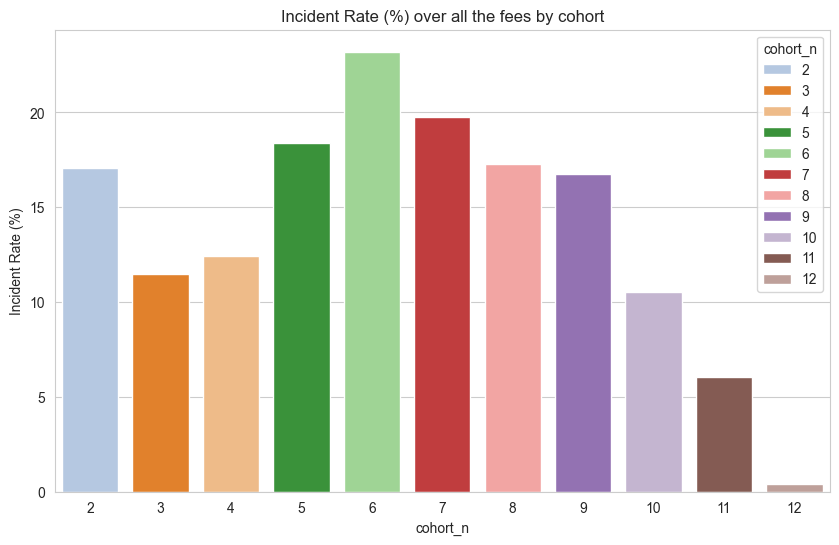

In [76]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_incident_rate_m2, x='cohort_n', y='rate', hue='cohort_n', palette=my_colors[1:])
plt.ylabel("Incident Rate (%)")
plt.title("Incident Rate (%) over all the fees by cohort")

In [77]:
df_incident_rate_m2.sort_values('rate', ascending=False, inplace=True)

C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\3274905706.py:3: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.barplot(data=df_incident_rate_m2, x='rate', y='cohort_n', hue='cohort_n', palette=my_colors[1:], orient='h')


Text(0.5, 1.0, 'Incident Rate (%) over all the fees by cohort')

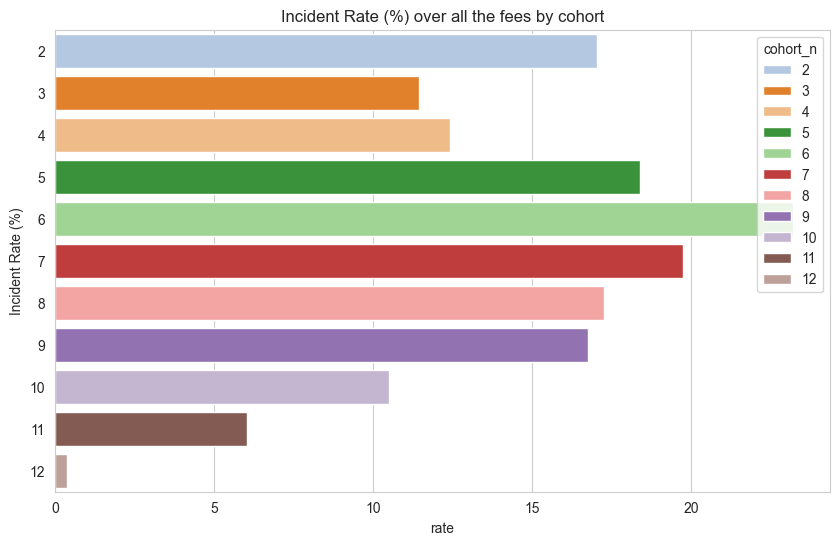

In [78]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_incident_rate_m2, x='rate', y='cohort_n', hue='cohort_n', palette=my_colors[1:], orient='h')
plt.ylabel("Incident Rate (%)")
plt.title("Incident Rate (%) over all the fees by cohort")

# Ordenar por rate para que vaya de mayor a menor, cambiar titulos de cohort


C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\4059881496.py:3: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.barplot(data=df_incident_counts_m2, x='cohort_n', y='counts', hue='cohort_n', palette=my_colors[1:])


Text(0.5, 1.0, 'Incident Rate (Counts) by cohort')

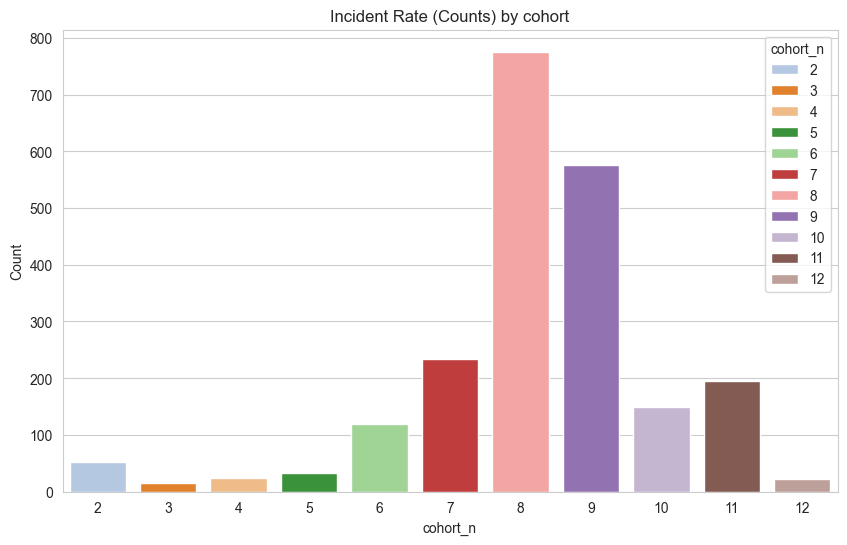

In [79]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_incident_counts_m2, x='cohort_n', y='counts', hue='cohort_n', palette=my_colors[1:])
plt.ylabel("Count")
plt.title("Incident Rate (Counts) by cohort")

In [80]:
df_incident_counts_m2 = df_cash_m2_merged_incident.groupby(['cohort_month_year']).size().reset_index(name='counts')
df_incident_counts_m2

,cohort_month_year,counts
0,2019-12,53
1,2020-01,15
2,2020-02,24
3,2020-03,32
4,2020-04,119
5,2020-05,234
6,2020-06,776
7,2020-07,576
8,2020-08,149
9,2020-09,195


C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\3139799994.py:3: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.barplot(data=df_incident_counts_m2, x='cohort_month_year', y='counts', hue='cohort_month_year', palette=my_colors[1:])


Text(0.5, 1.0, 'Incident Rate by cohort')

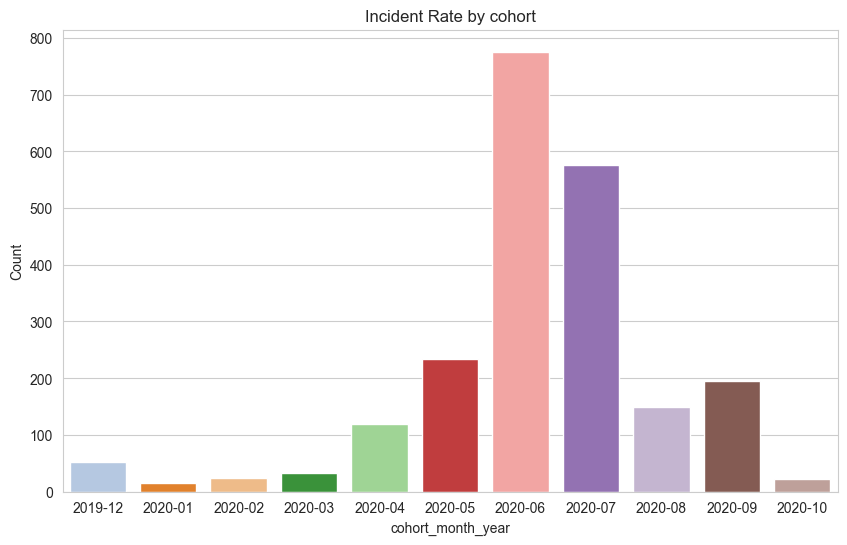

In [81]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_incident_counts_m2, x='cohort_month_year', y='counts', hue='cohort_month_year', palette=my_colors[1:])
plt.ylabel("Count")
plt.title("Incident Rate by cohort")

## 3. **Ingresos Generados por la Cohorte:** Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.

In [82]:
df_cash_m2_merged.columns

Index(['id_fees', 'cash_request_id', 'type', 'status_fees', 'category',
       'total_amount', 'reason', 'created_at', 'updated_at', 'paid_at',
       'from_date', 'to_date', 'charge_moment', 'new_user_id', 'id_cash',
       'reimbursement_date', 'status_cash', 'money_back_date', 'id',
       'month_year', 'month_name', 'year', 'n_transaction', 'cohort_n',
       'cohort_month_year'],
      dtype='object')

In [83]:
df_cash_m2_merged.total_amount.value_counts()

total_amount
5.0     21056
10.0        1
Name: count, dtype: int64

In [84]:
df_cash_m2_merged.category.value_counts()

category
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64

In [85]:
df_cash_m2_merged.category.unique()

array([nan, 'rejected_direct_debit', 'month_delay_on_payment'],
      dtype=object)

In [86]:
df_cash_m2_merged[(df_cash_m2_merged.cash_request_id == 8952)]

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,...,reimbursement_date,status_cash,money_back_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
21040,3491,8952,incident,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 23:00:44.214576+00:00,2020-10-13 14:25:02.938088+00:00,2020-10-08 07:24:45.091469+00:00,...,2020-08-05 22:00:00+00:00,direct_debit_rejected,NaN,8952,2020-07,July,2020,1,9,2020-07
21041,7166,8952,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-11 01:37:43.458593+00:00,2020-10-13 14:25:02.546591+00:00,2020-10-08 07:24:44.561304+00:00,...,2020-08-05 22:00:00+00:00,direct_debit_rejected,NaN,8952,2020-07,July,2020,1,9,2020-07
21042,12566,8952,incident,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:30.997317+00:00,2020-10-13 14:25:18.627143+00:00,NaT,...,2020-08-05 22:00:00+00:00,direct_debit_rejected,NaN,8952,2020-07,July,2020,1,9,2020-07


In [87]:
df_incident_counts_m2 = df_cash_m2_merged_incident.groupby(['cohort_month_year']).size().reset_index(name='counts')
df_incident_counts_m2

,cohort_month_year,counts
0,2019-12,53
1,2020-01,15
2,2020-02,24
3,2020-03,32
4,2020-04,119
5,2020-05,234
6,2020-06,776
7,2020-07,576
8,2020-08,149
9,2020-09,195


C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\3139799994.py:3: UserWarning: The palette list has more values (12) than needed (11), which may not be intended.
  sns.barplot(data=df_incident_counts_m2, x='cohort_month_year', y='counts', hue='cohort_month_year', palette=my_colors[1:])


Text(0.5, 1.0, 'Incident Rate by cohort')

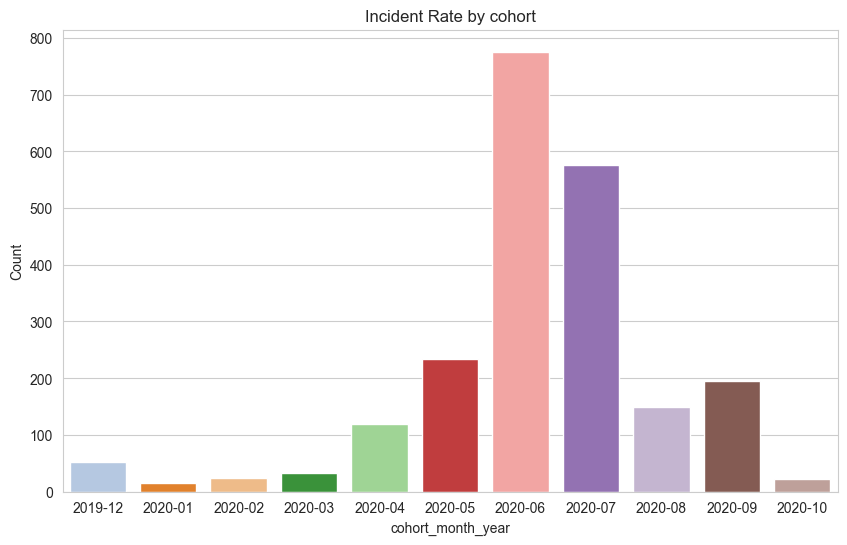

In [88]:
plt.figure(figsize=(10,6))

sns.barplot(data=df_incident_counts_m2, x='cohort_month_year', y='counts', hue='cohort_month_year', palette=my_colors[1:])
plt.ylabel("Count")
plt.title("Incident Rate by cohort")

In [89]:
df_cash_m2_merged
# Hay que ver cuales son los aceptados o los que realmente se han hecho. Hay que filtrar este

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,...,reimbursement_date,status_cash,money_back_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
0,6537,14941,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,...,2020-10-01 22:00:00+00:00,direct_debit_rejected,2020-10-06 22:00:00+00,14941,2020-09,September,2020,1,11,2020-09
1,6961,11714,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,...,2020-09-07 22:00:00+00:00,money_back,2020-12-02 03:02:41.180953+00,11714,2020-08,August,2020,3,8,2020-06
2,16296,23371,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,...,2020-11-04 22:00:00+00:00,money_back,2020-11-04 19:34:37.399122+00,23371,2020-10,October,2020,1,12,2020-10
3,20775,26772,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00:00,...,2020-11-11 23:51:00+00:00,money_back,2020-11-17 23:00:00+00,26772,2020-10,October,2020,1,12,2020-10
4,11242,19350,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00:00,...,2020-10-30 11:00:00+00:00,money_back,2020-11-02 14:45:20.315696+00,19350,2020-10,October,2020,5,8,2020-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,12372,20262,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00:00,2020-10-13 14:25:04.180490+00:00,2020-11-17 05:14:00.080854+00:00,...,2020-11-10 11:00:00+00:00,direct_debit_rejected,2020-11-16 23:00:00+00,20262,2020-10,October,2020,1,12,2020-10
21053,20768,26764,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00:00,2020-12-16 07:10:54.697639+00:00,...,2020-11-10 23:51:00+00:00,direct_debit_rejected,NaN,26764,2020-10,October,2020,1,12,2020-10
21054,18779,25331,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00:00,2020-10-27 17:28:51.749200+00:00,2020-11-18 04:35:42.915511+00:00,...,2020-11-10 23:51:00+00:00,direct_debit_rejected,NaN,25331,2020-10,October,2020,1,12,2020-10
21055,16542,23628,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00:00,2020-10-23 16:27:52.047486+00:00,2020-12-18 05:18:01.465317+00:00,...,2020-11-15 11:00:00+00:00,direct_debit_rejected,NaN,23628,2020-10,October,2020,1,12,2020-10


In [90]:
df_cash_m2_merged.cash_request_id.value_counts().reset_index().head(5)

,cash_request_id,count
0,12225,35
1,5006,28
2,4410,24
3,12452,23
4,11376,21


In [91]:
df_cash_m2_merged[df_cash_m2_merged.cash_request_id == 12225].sort_values(['id_fees'])

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,...,reimbursement_date,status_cash,money_back_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
8761,4668,12225,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 12225,2020-08-21 12:42:29.814857+00:00,2020-10-13 14:25:01.925030+00:00,2020-10-02 11:27:24.787458+00:00,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17385,5315,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:48:23.860125+00:00,2020-10-13 14:25:17.268587+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17386,5316,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:48:58.870508+00:00,2020-10-13 14:25:17.269803+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17387,5317,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:49:41.891044+00:00,2020-10-13 14:25:17.270848+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17388,5318,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:50:06.050797+00:00,2020-10-13 14:25:17.272012+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17377,5319,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:50:23.440630+00:00,2020-10-13 14:25:17.256643+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17389,5320,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:51:01.792873+00:00,2020-10-13 14:25:17.273054+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17390,5321,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:51:21.571977+00:00,2020-10-13 14:25:17.274093+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17391,5322,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:51:50.495341+00:00,2020-10-13 14:25:17.275104+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06
17392,5323,12225,postpone,cancelled,NaN,5.0,Postpone Cash Request 12225,2020-08-27 20:52:39.702054+00:00,2020-10-13 14:25:17.276130+00:00,NaT,...,2020-09-25 22:00:00+00:00,money_back,2020-10-02 11:27:24.746705+00,12225,2020-08,August,2020,2,8,2020-06


In [92]:
df_cash_m2_merged[df_cash_m2_merged.cash_request_id == 12225].sort_values(['id_fees']).to_csv("export_12225CR.csv")

In [93]:
df_cash_m2_merged[df_cash_m2_merged.cash_request_id == 5006].sort_values(['id_fees'])

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,...,reimbursement_date,status_cash,money_back_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
16359,762,5006,postpone,cancelled,NaN,5.0,Postpone Cash Request 5006,2020-06-29 07:28:20.864173+00:00,2020-10-13 14:25:15.877209+00:00,NaT,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
16364,763,5006,postpone,cancelled,NaN,5.0,Postpone Cash Request 5006,2020-06-29 07:28:53.824659+00:00,2020-10-13 14:25:15.885310+00:00,NaT,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
16368,764,5006,postpone,cancelled,NaN,5.0,Postpone Cash Request 5006,2020-06-29 07:29:20.062226+00:00,2020-10-13 14:25:15.890628+00:00,NaT,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
16369,765,5006,postpone,cancelled,NaN,5.0,Postpone Cash Request 5006,2020-06-29 07:29:47.154900+00:00,2020-10-13 14:25:15.891666+00:00,NaT,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
16370,766,5006,postpone,cancelled,NaN,5.0,Postpone Cash Request 5006,2020-06-29 07:30:02.856092+00:00,2020-10-13 14:25:15.892756+00:00,NaT,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
16401,807,5006,postpone,cancelled,NaN,5.0,Postpone Cash Request 5006,2020-06-30 04:02:12.345849+00:00,2020-10-13 14:25:15.932560+00:00,NaT,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
463,842,5006,postpone,accepted,NaN,5.0,Postpone Cash Request 5006,2020-06-30 15:11:04.819073+00:00,2020-10-13 14:25:01.697700+00:00,2020-06-30 15:11:09.212692+00:00,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
1937,1250,5006,postpone,accepted,NaN,5.0,Postpone Cash Request 5006,2020-07-09 14:36:23.458560+00:00,2020-10-13 14:25:02.206010+00:00,2020-07-09 14:36:27.906669+00:00,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
19636,1814,5006,postpone,cancelled,NaN,5.0,Postpone Cash Request 5006,2020-07-23 05:08:35.567051+00:00,2020-10-13 14:25:00.780558+00:00,NaT,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06
15824,1934,5006,postpone,cancelled,NaN,5.0,Postpone Cash Request 5006,2020-07-25 07:48:53.764328+00:00,2020-10-13 14:25:15.063586+00:00,NaT,...,2020-08-02 22:00:00+00:00,money_back,2020-10-07 00:40:49.022735+00,5006,2020-06,June,2020,2,8,2020-06


In [94]:
# df_incident_counts_m3 = df_cash_m2_merged.groupby(['cohort_n','cohort_month_year','total_amount']).size().reset_index(name='counts')
# df_incident_counts_m3

In [95]:
df_cash_m2_merged[df_cash_m2_merged.total_amount == 10.0]

,id_fees,cash_request_id,type,status_fees,category,total_amount,reason,created_at,updated_at,paid_at,...,reimbursement_date,status_cash,money_back_date,id,month_year,month_name,year,n_transaction,cohort_n,cohort_month_year
20600,15552,22799,instant_payment,accepted,NaN,10.0,Instant Payment Cash Request 22799,2020-10-21 13:01:52.493241+00:00,2021-01-21 15:42:51.372269+00:00,2020-10-30 00:18:41+00:00,...,2020-10-30 22:00:00+00:00,money_back,2020-11-02 23:00:00+00,22799,2020-10,October,2020,1,12,2020-10


In [96]:
df_cash_m3_merged = df_cash_m2_merged[['new_user_id','cash_request_id','id_fees', 'type', 'status_cash', 'status_fees', 'total_amount', 'reason', 'created_at', 'updated_at', 'paid_at', 'charge_moment', 'reimbursement_date', 'n_transaction', 'month_year', 'cohort_n', 'cohort_month_year', 'money_back_date']]
df_cash_m3_merged = df_cash_m3_merged.sort_values(['new_user_id','cash_request_id','id_fees'])
df_cash_m3_merged.head(10)

,new_user_id,cash_request_id,id_fees,type,status_cash,status_fees,total_amount,reason,created_at,updated_at,paid_at,charge_moment,reimbursement_date,n_transaction,month_year,cohort_n,cohort_month_year,money_back_date
1225,47,1832,21,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-06-23 08:20:48.513423+00:00,2020-12-22 17:19:13.611324+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
1229,47,1832,47,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-06-01 14:24:14.624776+00:00,2020-12-22 17:19:20.056527+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
20270,47,1832,71,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-05-29 14:27:56.118917+00:00,2020-12-22 17:19:34.028812+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
20269,47,1832,72,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-05-29 14:27:56.118917+00:00,2020-12-22 17:19:26.530567+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
2021,47,1832,1367,postpone,money_back,accepted,5.0,Postpone Cash Request 1832,2020-07-14 14:59:45.303324+00:00,2020-10-13 14:25:02.353414+00:00,2020-07-14 14:59:48.909393+00:00,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
10055,47,10942,2792,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 10942,2020-08-05 09:35:51.945346+00:00,2021-01-21 15:50:35.089962+00:00,2020-09-22 15:05:36+00:00,after,2020-09-29 22:00:00+00:00,5,2020-08,1,2019-11,2020-09-22 15:05:36+00
2995,47,10942,5609,postpone,money_back,accepted,5.0,Postpone Cash Request 10942,2020-09-01 10:54:11.067922+00:00,2020-10-13 14:25:08.138501+00:00,2020-09-01 10:54:17.647566+00:00,before,2020-09-29 22:00:00+00:00,5,2020-08,1,2019-11,2020-09-22 15:05:36+00
14731,47,17314,8692,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 17314,2020-09-22 16:08:53.850059+00:00,2020-10-13 14:25:13.105837+00:00,2020-10-08 20:50:51.604063+00:00,after,2020-10-16 16:03:24.557950+00:00,6,2020-09,1,2019-11,2020-10-08 20:50:51.537153+00
4975,47,21042,13378,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 21042,2020-10-14 10:57:10.746224+00:00,2020-10-14 10:57:10.746245+00:00,2020-10-28 08:04:45.811783+00:00,after,2020-11-06 22:00:00+00:00,7,2020-10,1,2019-11,2020-10-28 08:04:45.768509+00
6864,47,26848,20888,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26848,2020-10-31 22:14:27.130519+00:00,2020-10-31 22:14:27.130541+00:00,2020-11-11 06:53:41.247040+00:00,after,2020-12-07 22:00:00+00:00,8,2020-10,1,2019-11,2020-11-11 06:53:41.209383+00


In [97]:
df_cash_m3_merged[~df_cash_m3_merged['paid_at'].isnull().values] # 15331 not NaN

,new_user_id,cash_request_id,id_fees,type,status_cash,status_fees,total_amount,reason,created_at,updated_at,paid_at,charge_moment,reimbursement_date,n_transaction,month_year,cohort_n,cohort_month_year,money_back_date
2021,47,1832,1367,postpone,money_back,accepted,5.0,Postpone Cash Request 1832,2020-07-14 14:59:45.303324+00:00,2020-10-13 14:25:02.353414+00:00,2020-07-14 14:59:48.909393+00:00,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
10055,47,10942,2792,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 10942,2020-08-05 09:35:51.945346+00:00,2021-01-21 15:50:35.089962+00:00,2020-09-22 15:05:36+00:00,after,2020-09-29 22:00:00+00:00,5,2020-08,1,2019-11,2020-09-22 15:05:36+00
2995,47,10942,5609,postpone,money_back,accepted,5.0,Postpone Cash Request 10942,2020-09-01 10:54:11.067922+00:00,2020-10-13 14:25:08.138501+00:00,2020-09-01 10:54:17.647566+00:00,before,2020-09-29 22:00:00+00:00,5,2020-08,1,2019-11,2020-09-22 15:05:36+00
14731,47,17314,8692,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 17314,2020-09-22 16:08:53.850059+00:00,2020-10-13 14:25:13.105837+00:00,2020-10-08 20:50:51.604063+00:00,after,2020-10-16 16:03:24.557950+00:00,6,2020-09,1,2019-11,2020-10-08 20:50:51.537153+00
4975,47,21042,13378,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 21042,2020-10-14 10:57:10.746224+00:00,2020-10-14 10:57:10.746245+00:00,2020-10-28 08:04:45.811783+00:00,after,2020-11-06 22:00:00+00:00,7,2020-10,1,2019-11,2020-10-28 08:04:45.768509+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,103421,26980,21113,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26980,2020-11-01 19:15:55.888577+00:00,2020-11-01 19:15:55.888600+00:00,2020-12-04 19:44:52.199473+00:00,after,2020-12-04 11:00:00+00:00,1,2020-11,13,2020-11,2020-12-04 19:44:52.155487+00
19610,103425,26992,21141,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26992,2020-11-01 20:32:11.862911+00:00,2020-11-01 20:32:11.862934+00:00,2021-01-05 17:16:44.629610+00:00,after,2020-12-07 11:00:00+00:00,1,2020-11,13,2020-11,2021-01-05 17:16:44.550852+00
8583,103437,26984,21122,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26984,2020-11-01 19:35:20.989457+00:00,2020-11-01 19:35:20.989492+00:00,2020-11-16 19:54:32.973317+00:00,after,2020-11-16 19:35:16.888000+00:00,1,2020-11,13,2020-11,2020-11-19 23:00:00+00
8542,103496,26983,21121,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26983,2020-11-01 19:30:47.730577+00:00,2020-11-01 19:30:47.730599+00:00,2020-12-05 04:22:13.330578+00:00,after,2020-11-16 19:30:42.176000+00:00,1,2020-11,13,2020-11,2020-12-05 04:22:13.262074+00


In [98]:
df_cash_m3_merged[df_cash_m3_merged['status_fees'] == 'accepted'] # 14841 casos aceptados

,new_user_id,cash_request_id,id_fees,type,status_cash,status_fees,total_amount,reason,created_at,updated_at,paid_at,charge_moment,reimbursement_date,n_transaction,month_year,cohort_n,cohort_month_year,money_back_date
2021,47,1832,1367,postpone,money_back,accepted,5.0,Postpone Cash Request 1832,2020-07-14 14:59:45.303324+00:00,2020-10-13 14:25:02.353414+00:00,2020-07-14 14:59:48.909393+00:00,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
10055,47,10942,2792,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 10942,2020-08-05 09:35:51.945346+00:00,2021-01-21 15:50:35.089962+00:00,2020-09-22 15:05:36+00:00,after,2020-09-29 22:00:00+00:00,5,2020-08,1,2019-11,2020-09-22 15:05:36+00
2995,47,10942,5609,postpone,money_back,accepted,5.0,Postpone Cash Request 10942,2020-09-01 10:54:11.067922+00:00,2020-10-13 14:25:08.138501+00:00,2020-09-01 10:54:17.647566+00:00,before,2020-09-29 22:00:00+00:00,5,2020-08,1,2019-11,2020-09-22 15:05:36+00
14731,47,17314,8692,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 17314,2020-09-22 16:08:53.850059+00:00,2020-10-13 14:25:13.105837+00:00,2020-10-08 20:50:51.604063+00:00,after,2020-10-16 16:03:24.557950+00:00,6,2020-09,1,2019-11,2020-10-08 20:50:51.537153+00
4975,47,21042,13378,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 21042,2020-10-14 10:57:10.746224+00:00,2020-10-14 10:57:10.746245+00:00,2020-10-28 08:04:45.811783+00:00,after,2020-11-06 22:00:00+00:00,7,2020-10,1,2019-11,2020-10-28 08:04:45.768509+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,103421,26980,21113,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26980,2020-11-01 19:15:55.888577+00:00,2020-11-01 19:15:55.888600+00:00,2020-12-04 19:44:52.199473+00:00,after,2020-12-04 11:00:00+00:00,1,2020-11,13,2020-11,2020-12-04 19:44:52.155487+00
19610,103425,26992,21141,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26992,2020-11-01 20:32:11.862911+00:00,2020-11-01 20:32:11.862934+00:00,2021-01-05 17:16:44.629610+00:00,after,2020-12-07 11:00:00+00:00,1,2020-11,13,2020-11,2021-01-05 17:16:44.550852+00
8583,103437,26984,21122,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26984,2020-11-01 19:35:20.989457+00:00,2020-11-01 19:35:20.989492+00:00,2020-11-16 19:54:32.973317+00:00,after,2020-11-16 19:35:16.888000+00:00,1,2020-11,13,2020-11,2020-11-19 23:00:00+00
8542,103496,26983,21121,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26983,2020-11-01 19:30:47.730577+00:00,2020-11-01 19:30:47.730599+00:00,2020-12-05 04:22:13.330578+00:00,after,2020-11-16 19:30:42.176000+00:00,1,2020-11,13,2020-11,2020-12-05 04:22:13.262074+00


In [99]:
df_cash_m3_merged[(~df_cash_m3_merged['paid_at'].isnull().values) & (df_cash_m3_merged['status_fees'] != 'accepted')] 
# Tienen fecha de paid_at pero no salen accepted, entonces cogemos solo los accepted, TODO explicar que no nos cuadran estos casos

,new_user_id,cash_request_id,id_fees,type,status_cash,status_fees,total_amount,reason,created_at,updated_at,paid_at,charge_moment,reimbursement_date,n_transaction,month_year,cohort_n,cohort_month_year,money_back_date
169,213,10342,2515,instant_payment,money_back,cancelled,5.0,Instant Payment Cash Request 10342,2020-08-01 13:23:59.651302+00:00,2020-12-15 17:07:43.688822+00:00,2020-08-28 12:56:24.868832+00:00,after,2020-08-27 22:00:00+00:00,8,2020-07,2,2019-12,2021-01-15 16:05:59.881368+00
20480,565,21083,13475,instant_payment,direct_debit_rejected,rejected,5.0,Instant Payment Cash Request 21083,2020-10-14 17:18:48.412857+00:00,2020-10-14 17:18:48.412878+00:00,2020-12-08 17:15:46.929071+00:00,after,2020-11-10 23:51:00+00:00,7,2020-10,2,2019-12,NaN
14243,640,13192,4598,instant_payment,money_back,rejected,5.0,Instant Payment Cash Request 13192,2020-08-21 12:42:29.600591+00:00,2020-10-13 14:25:12.165783+00:00,2020-09-23 06:56:56.669900+00:00,after,2020-09-16 07:39:01.693000+00:00,3,2020-08,7,2020-05,2020-10-01 22:54:51.828668+00
9596,640,19388,11245,instant_payment,direct_debit_rejected,rejected,5.0,Instant Payment Cash Request 19388,2020-10-06 08:22:11.344702+00:00,2020-10-13 14:25:03.554475+00:00,2020-12-09 05:20:59.576202+00:00,after,2020-11-05 22:00:00+00:00,5,2020-10,7,2020-05,2020-12-03 11:56:08.938252+00
20942,938,16747,8179,instant_payment,direct_debit_rejected,rejected,5.0,Instant Payment Cash Request 16747,2020-09-18 12:41:18.298210+00:00,2020-10-13 14:25:12.281849+00:00,2020-11-12 05:24:43.535010+00:00,after,2020-11-06 11:00:00+00:00,7,2020-09,8,2020-06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21053,100564,26764,20768,instant_payment,direct_debit_rejected,rejected,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00:00,2020-12-16 07:10:54.697639+00:00,after,2020-11-10 23:51:00+00:00,1,2020-10,12,2020-10,NaN
19926,100751,26558,20528,instant_payment,direct_debit_rejected,rejected,5.0,Instant Payment Cash Request 26558,2020-10-31 00:54:19.296761+00:00,2020-10-31 00:54:19.296784+00:00,2020-12-12 19:58:35.502003+00:00,after,2020-12-07 22:00:00+00:00,1,2020-10,12,2020-10,2020-12-10 23:00:00+00
330,101813,26781,20785,instant_payment,money_back,cancelled,5.0,Instant Payment Cash Request 26781,2020-10-31 16:11:28.880628+00:00,2020-12-09 15:37:02.919886+00:00,2020-12-07 16:52:11.255043+00:00,after,2020-12-05 11:00:00+00:00,1,2020-10,12,2020-10,2020-12-10 23:00:00+00
4670,102862,26917,21006,instant_payment,money_back,cancelled,5.0,Instant Payment Cash Request 26917,2020-11-01 12:07:40.436381+00:00,2020-12-09 15:37:03.400213+00:00,2020-12-07 16:55:33.667276+00:00,after,2020-12-05 11:00:00+00:00,1,2020-11,13,2020-11,2020-12-10 23:00:00+00


In [100]:
df_cash_m3_merged_accepted = df_cash_m3_merged[df_cash_m3_merged['status_fees'] == 'accepted']
df_cash_m3_merged_accepted

,new_user_id,cash_request_id,id_fees,type,status_cash,status_fees,total_amount,reason,created_at,updated_at,paid_at,charge_moment,reimbursement_date,n_transaction,month_year,cohort_n,cohort_month_year,money_back_date
2021,47,1832,1367,postpone,money_back,accepted,5.0,Postpone Cash Request 1832,2020-07-14 14:59:45.303324+00:00,2020-10-13 14:25:02.353414+00:00,2020-07-14 14:59:48.909393+00:00,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
10055,47,10942,2792,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 10942,2020-08-05 09:35:51.945346+00:00,2021-01-21 15:50:35.089962+00:00,2020-09-22 15:05:36+00:00,after,2020-09-29 22:00:00+00:00,5,2020-08,1,2019-11,2020-09-22 15:05:36+00
2995,47,10942,5609,postpone,money_back,accepted,5.0,Postpone Cash Request 10942,2020-09-01 10:54:11.067922+00:00,2020-10-13 14:25:08.138501+00:00,2020-09-01 10:54:17.647566+00:00,before,2020-09-29 22:00:00+00:00,5,2020-08,1,2019-11,2020-09-22 15:05:36+00
14731,47,17314,8692,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 17314,2020-09-22 16:08:53.850059+00:00,2020-10-13 14:25:13.105837+00:00,2020-10-08 20:50:51.604063+00:00,after,2020-10-16 16:03:24.557950+00:00,6,2020-09,1,2019-11,2020-10-08 20:50:51.537153+00
4975,47,21042,13378,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 21042,2020-10-14 10:57:10.746224+00:00,2020-10-14 10:57:10.746245+00:00,2020-10-28 08:04:45.811783+00:00,after,2020-11-06 22:00:00+00:00,7,2020-10,1,2019-11,2020-10-28 08:04:45.768509+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,103421,26980,21113,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26980,2020-11-01 19:15:55.888577+00:00,2020-11-01 19:15:55.888600+00:00,2020-12-04 19:44:52.199473+00:00,after,2020-12-04 11:00:00+00:00,1,2020-11,13,2020-11,2020-12-04 19:44:52.155487+00
19610,103425,26992,21141,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26992,2020-11-01 20:32:11.862911+00:00,2020-11-01 20:32:11.862934+00:00,2021-01-05 17:16:44.629610+00:00,after,2020-12-07 11:00:00+00:00,1,2020-11,13,2020-11,2021-01-05 17:16:44.550852+00
8583,103437,26984,21122,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26984,2020-11-01 19:35:20.989457+00:00,2020-11-01 19:35:20.989492+00:00,2020-11-16 19:54:32.973317+00:00,after,2020-11-16 19:35:16.888000+00:00,1,2020-11,13,2020-11,2020-11-19 23:00:00+00
8542,103496,26983,21121,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26983,2020-11-01 19:30:47.730577+00:00,2020-11-01 19:30:47.730599+00:00,2020-12-05 04:22:13.330578+00:00,after,2020-11-16 19:30:42.176000+00:00,1,2020-11,13,2020-11,2020-12-05 04:22:13.262074+00


In [101]:
pivot_df = df_cash_m3_merged_accepted.groupby(['month_year','cohort_n','cohort_month_year', 'total_amount']).size().reset_index(name='counts').sort_values('cohort_n')
pivot_df['total_income'] = pivot_df['total_amount'] * pivot_df['counts']
pivot_df

,month_year,cohort_n,cohort_month_year,total_amount,counts,total_income
0,2020-05,1,2019-11,5.0,1,5.0
21,2020-08,1,2019-11,5.0,2,10.0
31,2020-09,1,2019-11,5.0,1,5.0
42,2020-10,1,2019-11,5.0,2,10.0
6,2020-06,2,2019-12,5.0,34,170.0
...,...,...,...,...,...,...
52,2020-10,11,2020-09,5.0,636,3180.0
53,2020-10,12,2020-10,5.0,4695,23475.0
54,2020-10,12,2020-10,10.0,1,10.0
61,2020-11,12,2020-10,5.0,9,45.0


In [102]:
pivot_df_sum = pivot_df.pivot_table(
    values = "total_income",
    aggfunc = "sum", 
    index = ["cohort_n", "cohort_month_year"], 
    fill_value=0
).reset_index()
pivot_df_sum

,cohort_n,cohort_month_year,total_income
0,1,2019-11,30.0
1,2,2019-12,1130.0
2,3,2020-01,460.0
3,4,2020-02,635.0
4,5,2020-03,645.0
5,6,2020-04,1585.0
6,7,2020-05,3930.0
7,8,2020-06,14365.0
8,9,2020-07,11135.0
9,10,2020-08,5045.0


In [103]:
pivot_df_per_time = pivot_df.pivot_table (
    values = "total_income",
    index = "month_year",
    columns= "cohort_n",
    aggfunc = "sum", 
    fill_value=0
)
pivot_df_per_time

cohort_n,1,2,3,4,5,6,7,8,9,10,11,12,13
month_year,,,,,,,,,,,,,
2020-05,5.0,35.0,20.0,20.0,0.0,75.0,365.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06,0.0,170.0,15.0,60.0,155.0,280.0,610.0,3395.0,0.0,0.0,0.0,0.0,0.0
2020-07,0.0,75.0,100.0,95.0,55.0,160.0,570.0,1270.0,2840.0,0.0,0.0,0.0,0.0
2020-08,10.0,385.0,100.0,185.0,150.0,430.0,855.0,3845.0,3175.0,2565.0,0.0,0.0,0.0
2020-09,5.0,175.0,100.0,110.0,140.0,360.0,770.0,3070.0,2615.0,1280.0,8160.0,0.0,0.0
2020-10,10.0,290.0,125.0,165.0,140.0,280.0,745.0,2770.0,2490.0,1160.0,3180.0,23485.0,0.0
2020-11,0.0,0.0,0.0,0.0,5.0,0.0,15.0,15.0,15.0,40.0,60.0,45.0,320.0


Text(0.5, 1.0, 'Total Fee Income by cohort over time')

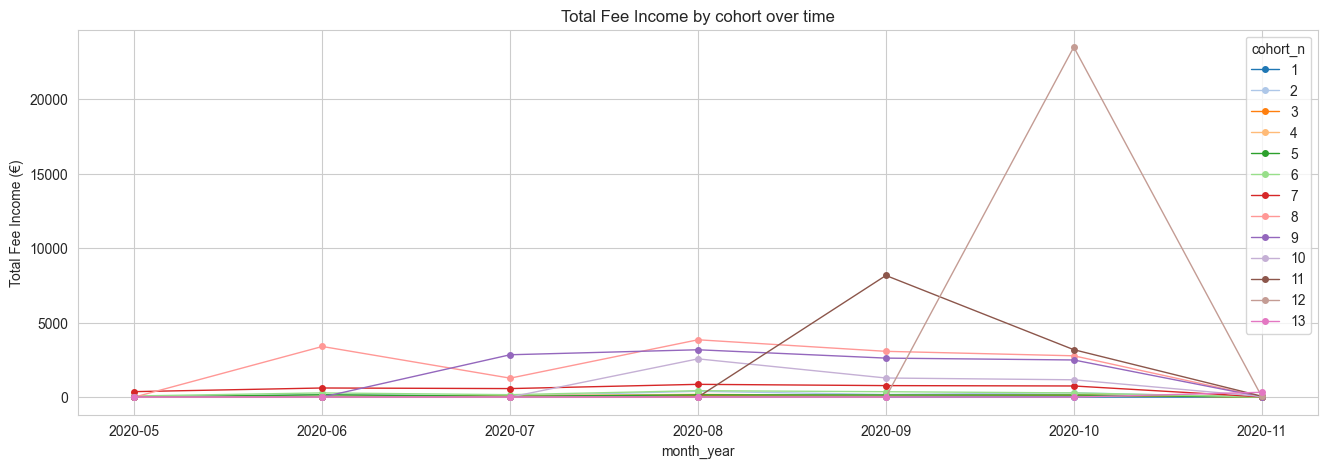

In [104]:
# Lineplot
fig, ax = plt.subplots(1, figsize=(16,5))
pivot_df_per_time.plot(kind="line", linewidth=1, marker='o', markersize=4, color=my_palette, ax=ax)
plt.xticks(ticks=range(len(pivot_df_per_time.index)), labels=pivot_df_per_time.index)
plt.legend(title="cohort_n", loc='upper right')
plt.ylabel("Total Fee Income (€)")
plt.title("Total Fee Income by cohort over time")

Text(0.5, 1.0, 'Total Fee Income by cohort over time')

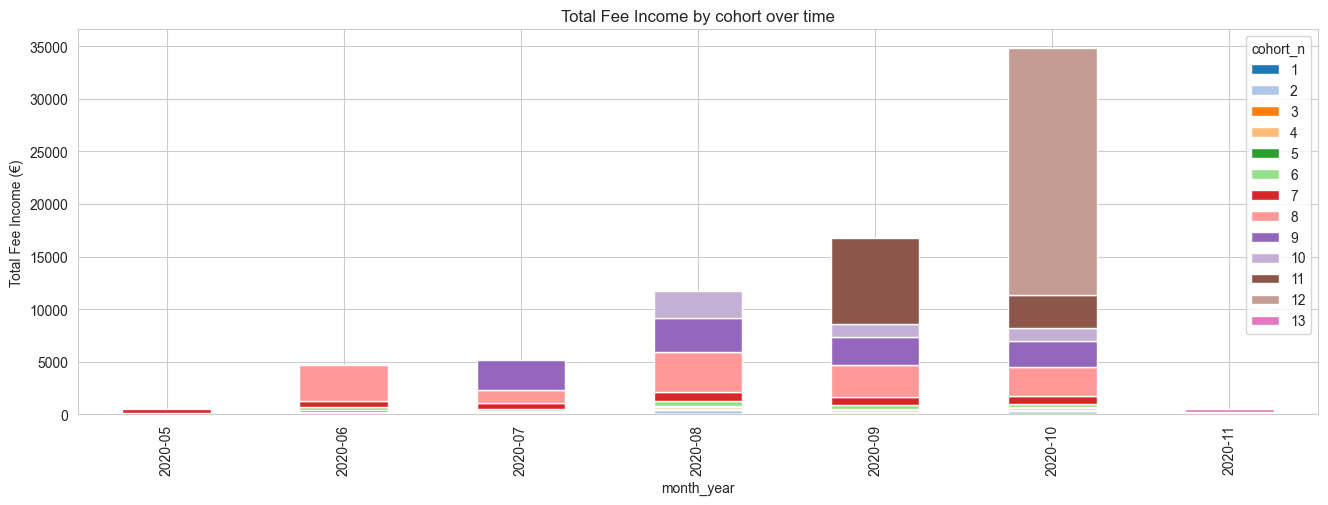

In [105]:
# Lineplot
fig, ax = plt.subplots(1, figsize=(16,5))
pivot_df_per_time.plot(kind="bar", linewidth=1, color=my_palette, stacked=True, ax=ax)
#plt.xticks(ticks=range(len(pivot_df_per_time.index)), labels=pivot_df_per_time.index)
plt.legend(title="cohort_n", loc='upper right')
plt.ylabel("Total Fee Income (€)")
plt.title("Total Fee Income by cohort over time")

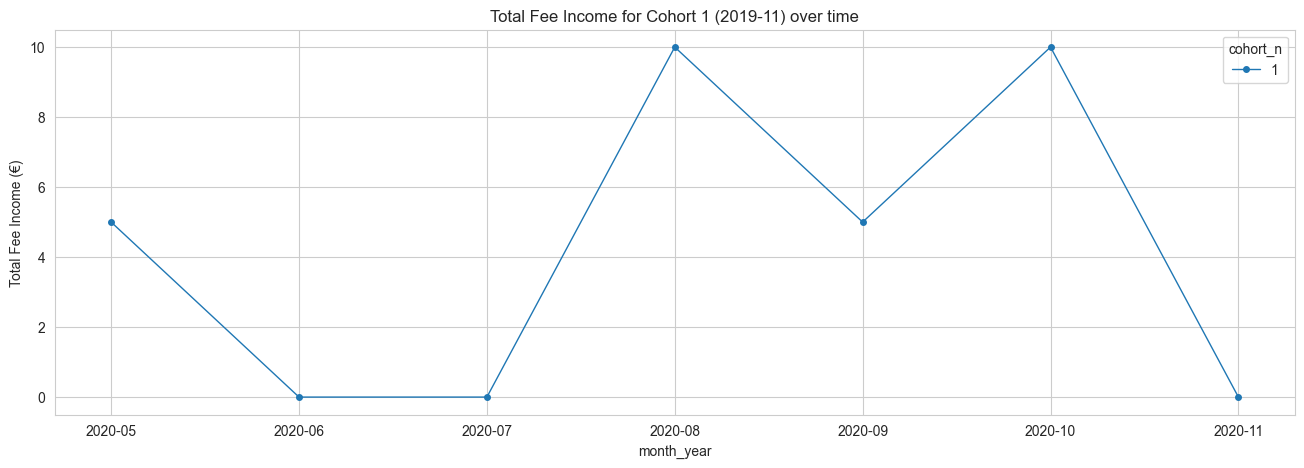

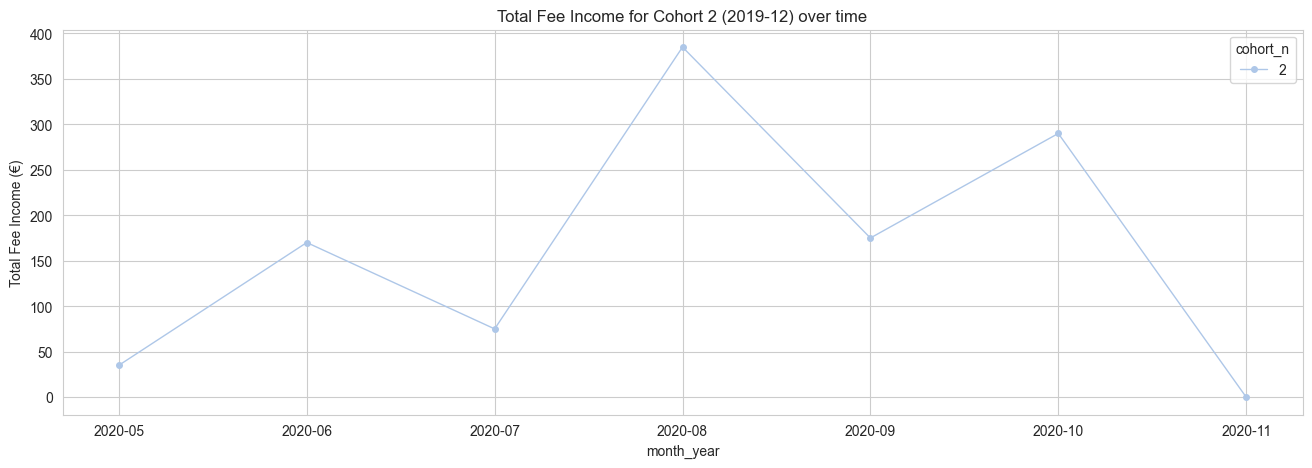

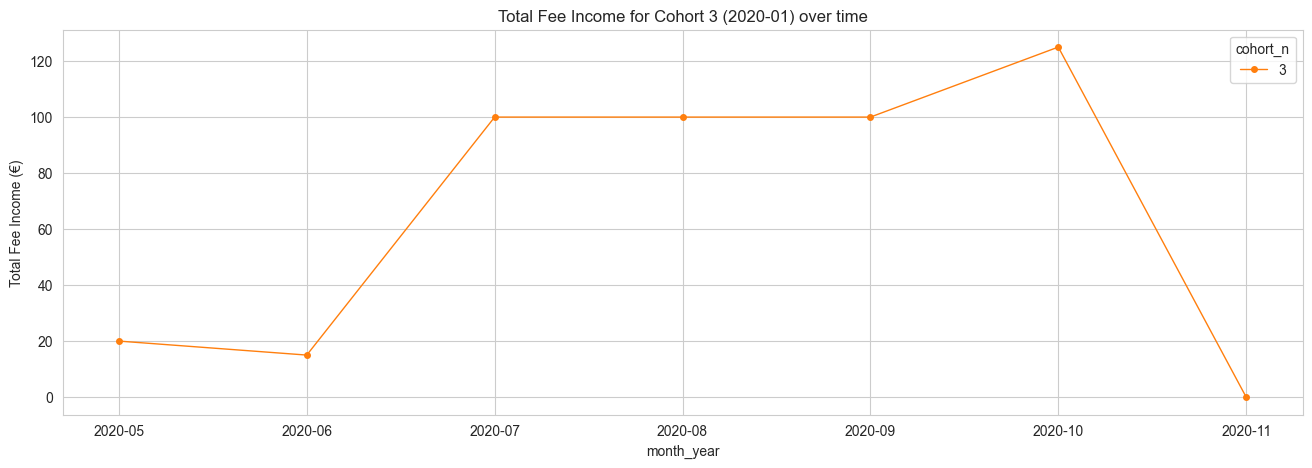

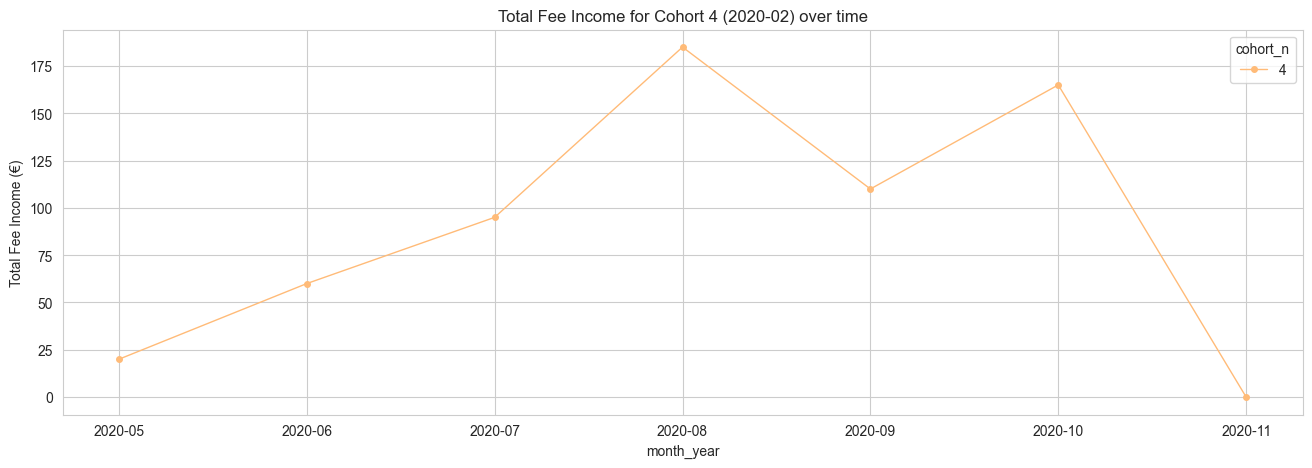

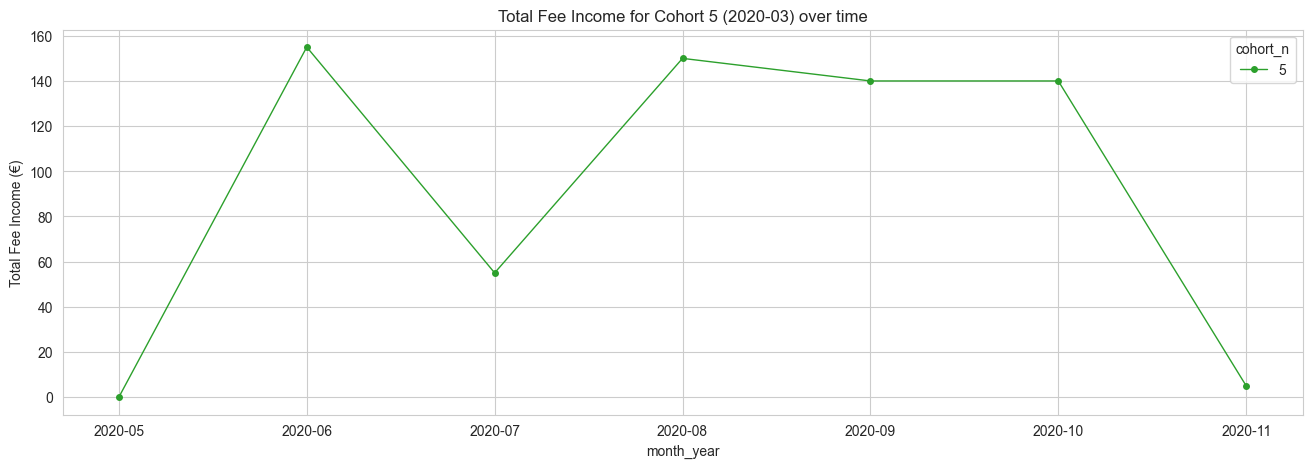

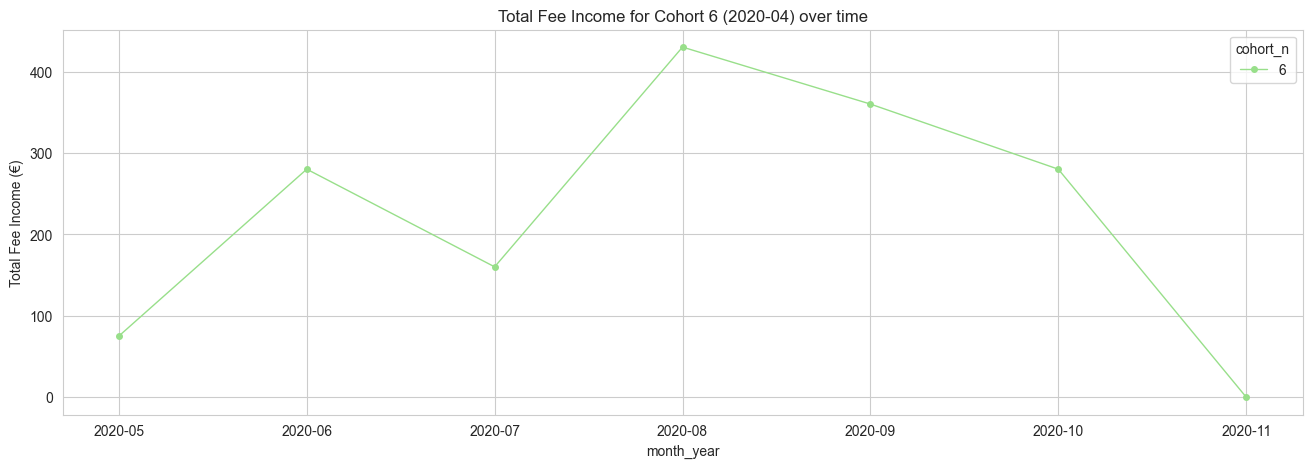

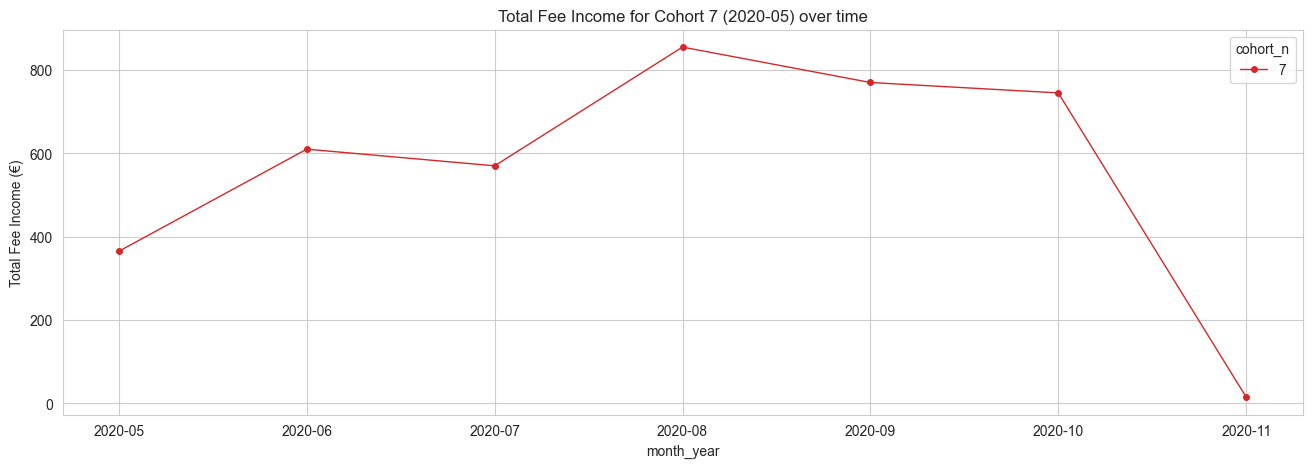

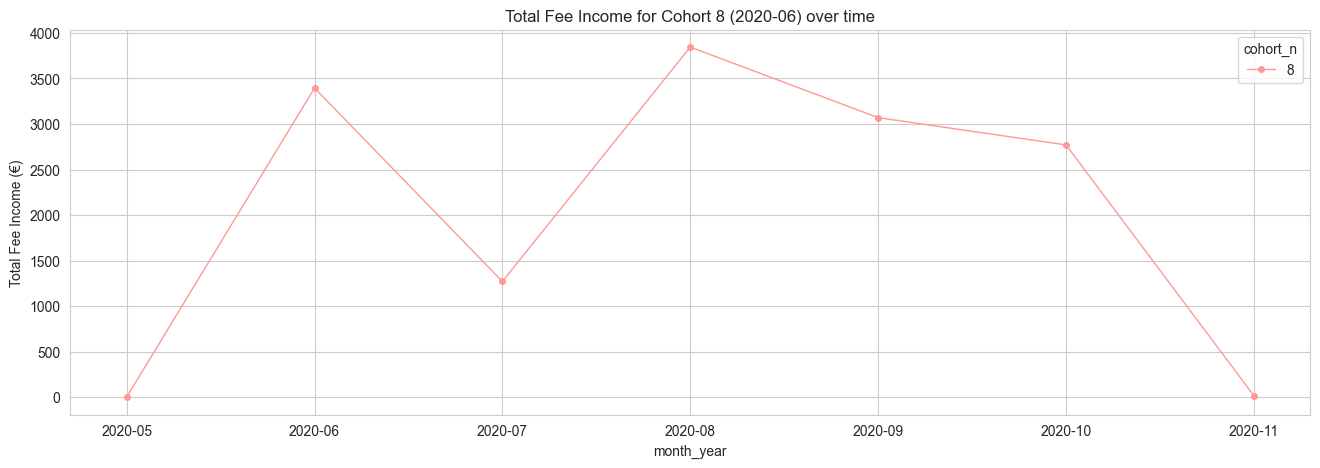

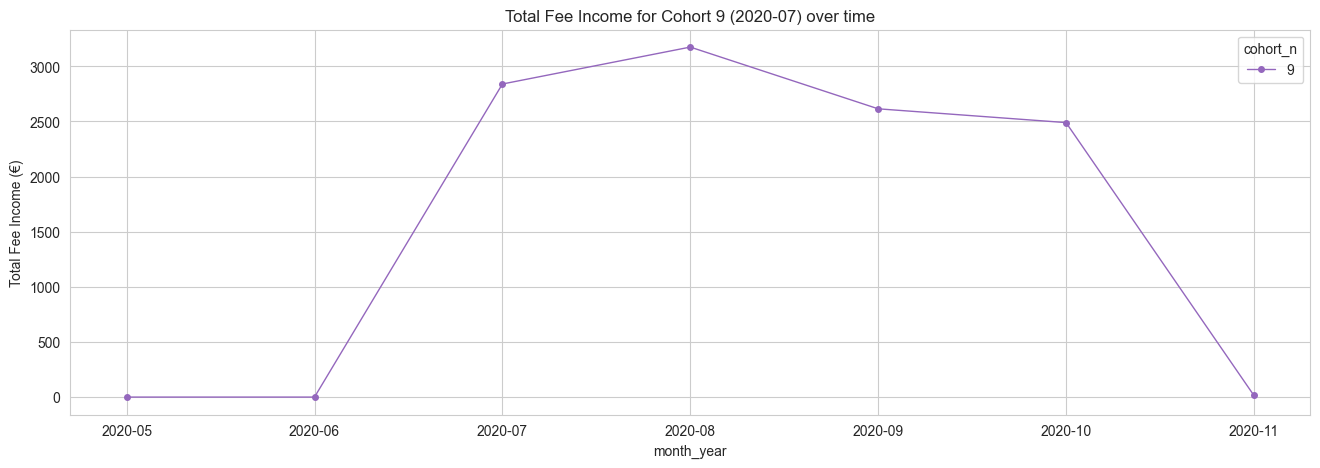

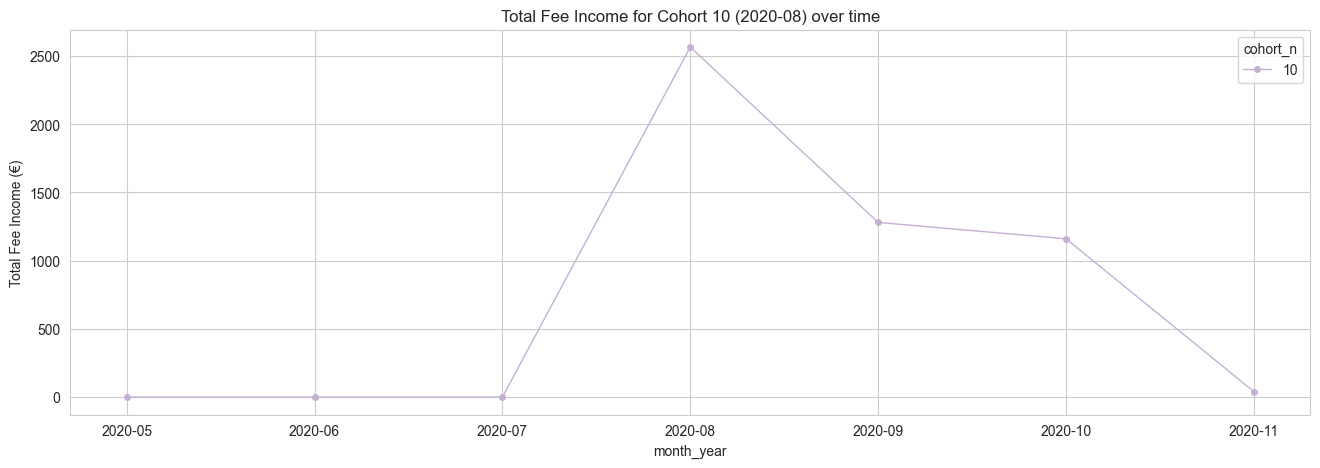

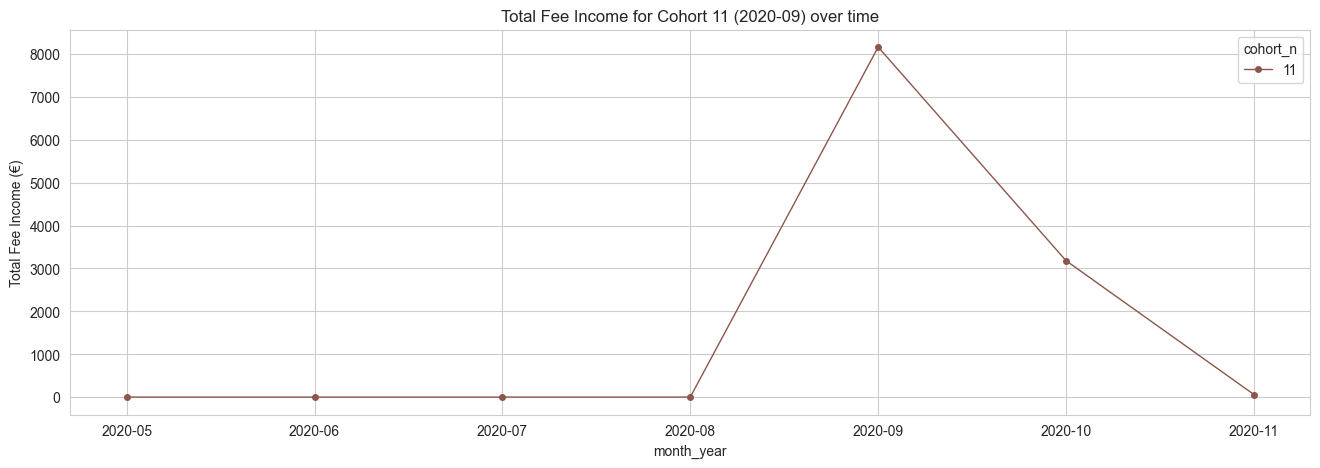

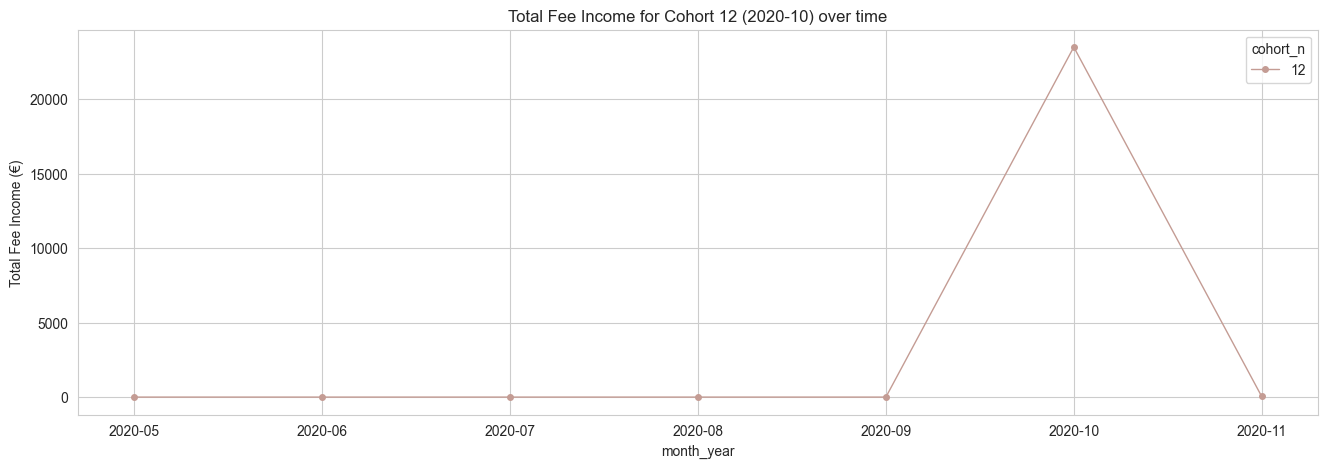

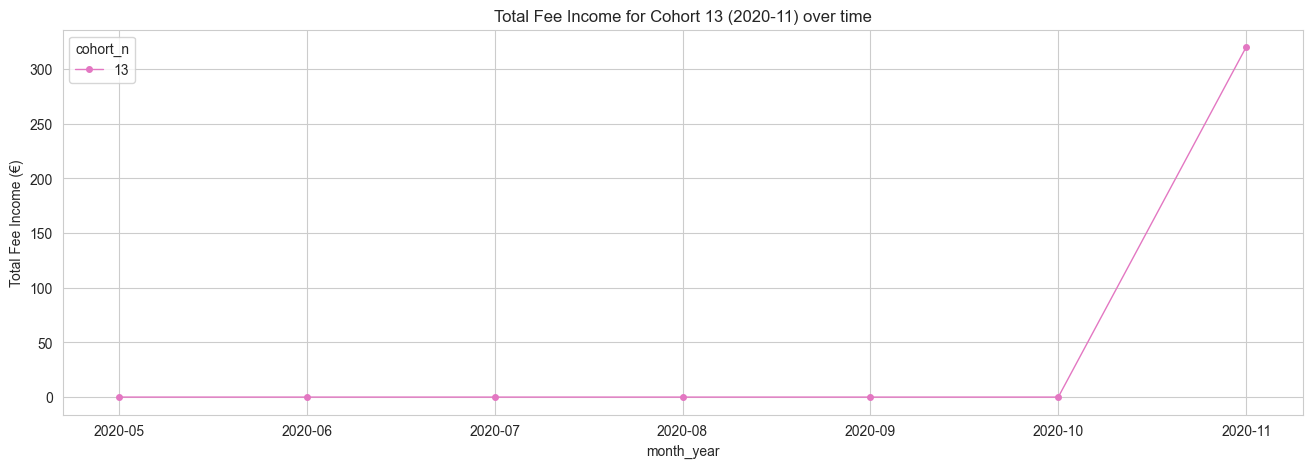

In [106]:
for col in list(pivot_df_per_time.columns):
    fig, ax = plt.subplots(1, figsize=(16,5))
    pivot_df_per_time[col].plot(kind="line", linewidth=1, marker='o', markersize=4, color=my_colors[col-1], ax=ax)
    plt.xticks(ticks=range(len(pivot_df_per_time.index)), labels=pivot_df_per_time.index)
    plt.ylabel("Total Fee Income (€)")
    plt.legend(title="cohort_n")
    col_cohort_month_year = df_cash_m1_t1_cohort[df_cash_m1_t1_cohort.cohort_n == col]['cohort_month_year'].values[0]
    plt.title(f"Total Fee Income for Cohort {col} ({col_cohort_month_year}) over time")

In [107]:
pivot_df_sum

,cohort_n,cohort_month_year,total_income
0,1,2019-11,30.0
1,2,2019-12,1130.0
2,3,2020-01,460.0
3,4,2020-02,635.0
4,5,2020-03,645.0
5,6,2020-04,1585.0
6,7,2020-05,3930.0
7,8,2020-06,14365.0
8,9,2020-07,11135.0
9,10,2020-08,5045.0


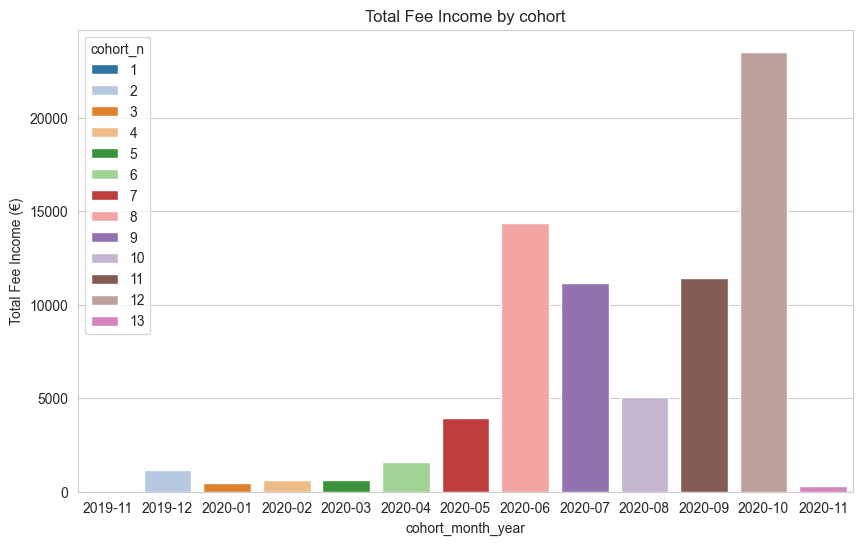

In [108]:
fig, ax = plt.subplots(1,figsize=(10,6))
sns.barplot(data=pivot_df_sum, x='cohort_month_year', y='total_income', hue='cohort_n', palette=my_colors, ax=ax)

plt.ylabel("Total Fee Income (€)")
plt.title("Total Fee Income by cohort")
plt.show()

# TODO Añadir numeros en las barras con la cantidad en €

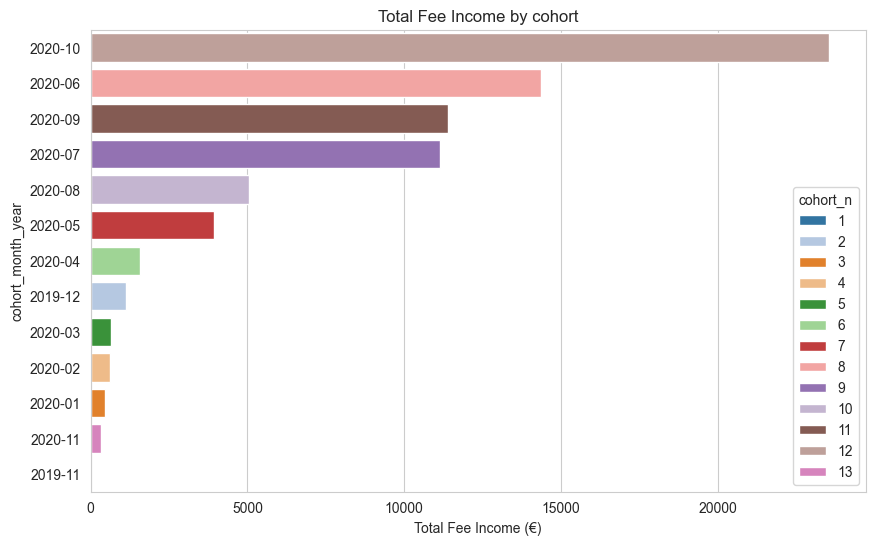

In [109]:
fig, ax = plt.subplots(1,figsize=(10,6))
sns.barplot(data=pivot_df_sum.sort_values('total_income', ascending=False), x='total_income', y='cohort_month_year', hue='cohort_n', palette=my_colors, ax=ax, orient='h')

plt.xlabel("Total Fee Income (€)")
plt.title("Total Fee Income by cohort")
plt.show()

# TODO Añadir numeros en las barras con la cantidad en €

## 4. **Nueva Métrica Relevante:** Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

Dinero prestado por Ironhack a cada cohorte cada mes

In [110]:
df_cash_m3_merged.value_counts('status_fees')

status_fees
accepted     14841
cancelled     4934
rejected      1194
confirmed       88
Name: count, dtype: int64

In [111]:
df_cash_m3_merged.value_counts('status_cash')

status_cash
money_back               18918
direct_debit_rejected     1858
active                     155
direct_debit_sent           72
transaction_declined        48
canceled                     6
Name: count, dtype: int64

In [112]:
df_cash_m3_merged.columns

Index(['new_user_id', 'cash_request_id', 'id_fees', 'type', 'status_cash',
       'status_fees', 'total_amount', 'reason', 'created_at', 'updated_at',
       'paid_at', 'charge_moment', 'reimbursement_date', 'n_transaction',
       'month_year', 'cohort_n', 'cohort_month_year', 'money_back_date'],
      dtype='object')

In [113]:
df_cash_m3_merged

,new_user_id,cash_request_id,id_fees,type,status_cash,status_fees,total_amount,reason,created_at,updated_at,paid_at,charge_moment,reimbursement_date,n_transaction,month_year,cohort_n,cohort_month_year,money_back_date
1225,47,1832,21,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-06-23 08:20:48.513423+00:00,2020-12-22 17:19:13.611324+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
1229,47,1832,47,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-06-01 14:24:14.624776+00:00,2020-12-22 17:19:20.056527+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
20270,47,1832,71,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-05-29 14:27:56.118917+00:00,2020-12-22 17:19:34.028812+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
20269,47,1832,72,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-05-29 14:27:56.118917+00:00,2020-12-22 17:19:26.530567+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
2021,47,1832,1367,postpone,money_back,accepted,5.0,Postpone Cash Request 1832,2020-07-14 14:59:45.303324+00:00,2020-10-13 14:25:02.353414+00:00,2020-07-14 14:59:48.909393+00:00,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,103421,26980,21113,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26980,2020-11-01 19:15:55.888577+00:00,2020-11-01 19:15:55.888600+00:00,2020-12-04 19:44:52.199473+00:00,after,2020-12-04 11:00:00+00:00,1,2020-11,13,2020-11,2020-12-04 19:44:52.155487+00
19610,103425,26992,21141,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26992,2020-11-01 20:32:11.862911+00:00,2020-11-01 20:32:11.862934+00:00,2021-01-05 17:16:44.629610+00:00,after,2020-12-07 11:00:00+00:00,1,2020-11,13,2020-11,2021-01-05 17:16:44.550852+00
8583,103437,26984,21122,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26984,2020-11-01 19:35:20.989457+00:00,2020-11-01 19:35:20.989492+00:00,2020-11-16 19:54:32.973317+00:00,after,2020-11-16 19:35:16.888000+00:00,1,2020-11,13,2020-11,2020-11-19 23:00:00+00
8542,103496,26983,21121,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26983,2020-11-01 19:30:47.730577+00:00,2020-11-01 19:30:47.730599+00:00,2020-12-05 04:22:13.330578+00:00,after,2020-11-16 19:30:42.176000+00:00,1,2020-11,13,2020-11,2020-12-05 04:22:13.262074+00


In [114]:
df_cash_m3_merged.dtypes


new_user_id                         int64
cash_request_id                     int64
id_fees                             int64
type                               object
status_cash                        object
status_fees                        object
total_amount                      float64
reason                             object
created_at            datetime64[ns, UTC]
updated_at            datetime64[ns, UTC]
paid_at               datetime64[ns, UTC]
charge_moment                      object
reimbursement_date    datetime64[ns, UTC]
n_transaction                       int64
month_year                         object
cohort_n                            int64
cohort_month_year                  object
money_back_date                    object
dtype: object

In [115]:
df_cash_m3_merged

,new_user_id,cash_request_id,id_fees,type,status_cash,status_fees,total_amount,reason,created_at,updated_at,paid_at,charge_moment,reimbursement_date,n_transaction,month_year,cohort_n,cohort_month_year,money_back_date
1225,47,1832,21,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-06-23 08:20:48.513423+00:00,2020-12-22 17:19:13.611324+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
1229,47,1832,47,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-06-01 14:24:14.624776+00:00,2020-12-22 17:19:20.056527+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
20270,47,1832,71,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-05-29 14:27:56.118917+00:00,2020-12-22 17:19:34.028812+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
20269,47,1832,72,postpone,money_back,cancelled,5.0,Postpone Cash Request 1832,2020-05-29 14:27:56.118917+00:00,2020-12-22 17:19:26.530567+00:00,NaT,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
2021,47,1832,1367,postpone,money_back,accepted,5.0,Postpone Cash Request 1832,2020-07-14 14:59:45.303324+00:00,2020-10-13 14:25:02.353414+00:00,2020-07-14 14:59:48.909393+00:00,before,2020-09-17 22:00:00+00:00,4,2020-05,1,2019-11,2020-08-04 18:19:04.558434+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7976,103421,26980,21113,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26980,2020-11-01 19:15:55.888577+00:00,2020-11-01 19:15:55.888600+00:00,2020-12-04 19:44:52.199473+00:00,after,2020-12-04 11:00:00+00:00,1,2020-11,13,2020-11,2020-12-04 19:44:52.155487+00
19610,103425,26992,21141,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26992,2020-11-01 20:32:11.862911+00:00,2020-11-01 20:32:11.862934+00:00,2021-01-05 17:16:44.629610+00:00,after,2020-12-07 11:00:00+00:00,1,2020-11,13,2020-11,2021-01-05 17:16:44.550852+00
8583,103437,26984,21122,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26984,2020-11-01 19:35:20.989457+00:00,2020-11-01 19:35:20.989492+00:00,2020-11-16 19:54:32.973317+00:00,after,2020-11-16 19:35:16.888000+00:00,1,2020-11,13,2020-11,2020-11-19 23:00:00+00
8542,103496,26983,21121,instant_payment,money_back,accepted,5.0,Instant Payment Cash Request 26983,2020-11-01 19:30:47.730577+00:00,2020-11-01 19:30:47.730599+00:00,2020-12-05 04:22:13.330578+00:00,after,2020-11-16 19:30:42.176000+00:00,1,2020-11,13,2020-11,2020-12-05 04:22:13.262074+00


In [116]:
df_cash.columns

Index(['id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',
       'moderated_at', 'deleted_account_id', 'reimbursement_date',
       'cash_request_received_date', 'money_back_date', 'transfer_type',
       'send_at', 'recovery_status', 'reco_creation', 'reco_last_update',
       'new_user_id', 'month_year', 'month_name', 'year'],
      dtype='object')

In [117]:
df_cash_m4 = pd.merge(df_cash_m1_t1[['new_user_id','cohort_n', 'cohort_month_year']],
                      df_cash[['new_user_id', 'id', 'amount', 'status', 'created_at', 'updated_at', 'user_id',  'send_at', 'month_year','money_back_date']],
                      on=['new_user_id']).sort_values('new_user_id')
df_cash_m4

,new_user_id,cohort_n,cohort_month_year,id,amount,status,created_at,updated_at,user_id,send_at,month_year,money_back_date
2254,34,6,2020-04,1302,100.0,rejected,2020-04-20 15:50:21.187257+00:00,2020-04-22 12:03:34.439811+00,34.0,NaN,2020-04,NaN
14,35,2,2019-12,16860,50.0,rejected,2020-09-19 10:25:54.265935+00:00,2020-09-19 15:55:44.999032+00,35.0,2020-09-26 10:25:54.229009+00,2020-09,NaN
12,35,2,2019-12,918,100.0,rejected,2020-03-17 07:28:11.282767+00:00,2020-03-17 16:31:15.512253+00,35.0,NaN,2020-03,NaN
10,35,2,2019-12,326,90.0,rejected,2019-12-28 04:00:22.349592+00:00,2019-12-29 10:17:28.378732+00,35.0,NaN,2019-12,NaN
9,35,2,2019-12,758,90.0,rejected,2020-02-28 10:51:11.440880+00:00,2020-02-28 14:13:21.50435+00,35.0,NaN,2020-02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23965,103425,13,2020-11,26992,100.0,money_back,2020-11-01 20:31:53.965482+00:00,2021-01-05 17:16:44.60084+00,103425.0,2020-11-01 20:32:07.480017+00,2020-11,2021-01-05 17:16:44.550852+00
23966,103437,13,2020-11,26984,100.0,money_back,2020-11-01 19:35:00.540424+00:00,2020-12-18 13:14:52.263782+00,103437.0,2020-11-01 19:35:16.292606+00,2020-11,2020-11-19 23:00:00+00
23967,103496,13,2020-11,26983,100.0,money_back,2020-11-01 19:30:26.434400+00:00,2020-12-18 13:11:51.179466+00,103496.0,2020-11-01 19:30:41.121095+00,2020-11,2020-12-05 04:22:13.262074+00
23968,103503,13,2020-11,26989,50.0,money_back,2020-11-01 20:12:26.857203+00:00,2020-12-18 13:12:02.656878+00,103503.0,2020-11-01 20:13:06.650633+00,2020-11,2020-12-05 19:58:15.885541+00


In [118]:
df_cash_m4 = df_cash_m4[df_cash_m4.status == 'money_back']
df_cash_m4

,new_user_id,cohort_n,cohort_month_year,id,amount,status,created_at,updated_at,user_id,send_at,month_year,money_back_date
2,47,1,2019-11,10942,10.0,money_back,2020-08-05 09:34:16.818322+00:00,2021-01-21 15:49:28.424845+00,47.0,2020-08-12 09:34:16+00,2020-08,2020-09-22 15:05:36+00
3,47,1,2019-11,1832,10.0,money_back,2020-05-15 16:04:10.449840+00:00,2020-08-04 18:19:04.558652+00,47.0,NaN,2020-05,2020-08-04 18:19:04.558434+00
5,47,1,2019-11,17314,5.0,money_back,2020-09-22 16:03:24.612340+00:00,2020-12-18 13:11:08.673601+00,47.0,2020-10-06 16:03:24.55795+00,2020-09,2020-10-08 20:50:51.537153+00
6,47,1,2019-11,21042,5.0,money_back,2020-10-14 10:56:52.227355+00:00,2020-12-18 13:12:02.160123+00,47.0,2020-10-14 10:57:03.133635+00,2020-10,2020-10-28 08:04:45.768509+00
7,47,1,2019-11,26848,1.0,money_back,2020-10-31 22:14:03.780126+00:00,2020-12-18 13:13:14.156929+00,47.0,2020-10-31 22:14:23.998439+00,2020-10,2020-11-11 06:53:41.209383+00
...,...,...,...,...,...,...,...,...,...,...,...,...
23965,103425,13,2020-11,26992,100.0,money_back,2020-11-01 20:31:53.965482+00:00,2021-01-05 17:16:44.60084+00,103425.0,2020-11-01 20:32:07.480017+00,2020-11,2021-01-05 17:16:44.550852+00
23966,103437,13,2020-11,26984,100.0,money_back,2020-11-01 19:35:00.540424+00:00,2020-12-18 13:14:52.263782+00,103437.0,2020-11-01 19:35:16.292606+00,2020-11,2020-11-19 23:00:00+00
23967,103496,13,2020-11,26983,100.0,money_back,2020-11-01 19:30:26.434400+00:00,2020-12-18 13:11:51.179466+00,103496.0,2020-11-01 19:30:41.121095+00,2020-11,2020-12-05 04:22:13.262074+00
23968,103503,13,2020-11,26989,50.0,money_back,2020-11-01 20:12:26.857203+00:00,2020-12-18 13:12:02.656878+00,103503.0,2020-11-01 20:13:06.650633+00,2020-11,2020-12-05 19:58:15.885541+00


In [131]:
df_cash_m4['money_back_date'] = pd.to_datetime(df_cash_m4['money_back_date'], format='mixed') # Sin float
# Drop NaN in 'money_back_date'
df_cash_m4 = df_cash_m4.dropna(subset='money_back_date')
df_cash_m4

C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\1145916411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_m4['money_back_date'] = pd.to_datetime(df_cash_m4['money_back_date'], format='mixed') # Sin float


,new_user_id,cohort_n,cohort_month_year,id,amount,status,created_at,updated_at,user_id,send_at,month_year,money_back_date
2,47,1,2019-11,10942,10.0,money_back,2020-08-05 09:34:16.818322+00:00,2021-01-21 15:49:28.424845+00,47.0,2020-08-12 09:34:16+00,2020-08,2020-09-22 15:05:36+00:00
3,47,1,2019-11,1832,10.0,money_back,2020-05-15 16:04:10.449840+00:00,2020-08-04 18:19:04.558652+00,47.0,NaN,2020-05,2020-08-04 18:19:04.558434+00:00
5,47,1,2019-11,17314,5.0,money_back,2020-09-22 16:03:24.612340+00:00,2020-12-18 13:11:08.673601+00,47.0,2020-10-06 16:03:24.55795+00,2020-09,2020-10-08 20:50:51.537153+00:00
6,47,1,2019-11,21042,5.0,money_back,2020-10-14 10:56:52.227355+00:00,2020-12-18 13:12:02.160123+00,47.0,2020-10-14 10:57:03.133635+00,2020-10,2020-10-28 08:04:45.768509+00:00
7,47,1,2019-11,26848,1.0,money_back,2020-10-31 22:14:03.780126+00:00,2020-12-18 13:13:14.156929+00,47.0,2020-10-31 22:14:23.998439+00,2020-10,2020-11-11 06:53:41.209383+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
23965,103425,13,2020-11,26992,100.0,money_back,2020-11-01 20:31:53.965482+00:00,2021-01-05 17:16:44.60084+00,103425.0,2020-11-01 20:32:07.480017+00,2020-11,2021-01-05 17:16:44.550852+00:00
23966,103437,13,2020-11,26984,100.0,money_back,2020-11-01 19:35:00.540424+00:00,2020-12-18 13:14:52.263782+00,103437.0,2020-11-01 19:35:16.292606+00,2020-11,2020-11-19 23:00:00+00:00
23967,103496,13,2020-11,26983,100.0,money_back,2020-11-01 19:30:26.434400+00:00,2020-12-18 13:11:51.179466+00,103496.0,2020-11-01 19:30:41.121095+00,2020-11,2020-12-05 04:22:13.262074+00:00
23968,103503,13,2020-11,26989,50.0,money_back,2020-11-01 20:12:26.857203+00:00,2020-12-18 13:12:02.656878+00,103503.0,2020-11-01 20:13:06.650633+00,2020-11,2020-12-05 19:58:15.885541+00:00


In [132]:
df_cash_m4.dtypes

new_user_id                        int64
cohort_n                           int64
cohort_month_year                 object
id                                 int64
amount                           float64
status                            object
created_at           datetime64[ns, UTC]
updated_at                        object
user_id                          float64
send_at                           object
month_year                        object
money_back_date      datetime64[ns, UTC]
dtype: object

In [133]:
df_cash_m4['diff_profit'] = df_cash_m4['money_back_date'] - df_cash_m4['created_at']
df_cash_m4['days_diff_profit'] = df_cash_m4['diff_profit'].dt.days
df_cash_m4

C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\2443068046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_m4['diff_profit'] = df_cash_m4['money_back_date'] - df_cash_m4['created_at']
C:\Users\emartin4\AppData\Local\Temp\ipykernel_19976\2443068046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cash_m4['days_diff_profit'] = df_cash_m4['diff_profit'].dt.days


,new_user_id,cohort_n,cohort_month_year,id,amount,status,created_at,updated_at,user_id,send_at,month_year,money_back_date,diff_profit,days_diff_profit
2,47,1,2019-11,10942,10.0,money_back,2020-08-05 09:34:16.818322+00:00,2021-01-21 15:49:28.424845+00,47.0,2020-08-12 09:34:16+00,2020-08,2020-09-22 15:05:36+00:00,48 days 05:31:19.181678,48
3,47,1,2019-11,1832,10.0,money_back,2020-05-15 16:04:10.449840+00:00,2020-08-04 18:19:04.558652+00,47.0,NaN,2020-05,2020-08-04 18:19:04.558434+00:00,81 days 02:14:54.108594,81
5,47,1,2019-11,17314,5.0,money_back,2020-09-22 16:03:24.612340+00:00,2020-12-18 13:11:08.673601+00,47.0,2020-10-06 16:03:24.55795+00,2020-09,2020-10-08 20:50:51.537153+00:00,16 days 04:47:26.924813,16
6,47,1,2019-11,21042,5.0,money_back,2020-10-14 10:56:52.227355+00:00,2020-12-18 13:12:02.160123+00,47.0,2020-10-14 10:57:03.133635+00,2020-10,2020-10-28 08:04:45.768509+00:00,13 days 21:07:53.541154,13
7,47,1,2019-11,26848,1.0,money_back,2020-10-31 22:14:03.780126+00:00,2020-12-18 13:13:14.156929+00,47.0,2020-10-31 22:14:23.998439+00,2020-10,2020-11-11 06:53:41.209383+00:00,10 days 08:39:37.429257,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,103425,13,2020-11,26992,100.0,money_back,2020-11-01 20:31:53.965482+00:00,2021-01-05 17:16:44.60084+00,103425.0,2020-11-01 20:32:07.480017+00,2020-11,2021-01-05 17:16:44.550852+00:00,64 days 20:44:50.585370,64
23966,103437,13,2020-11,26984,100.0,money_back,2020-11-01 19:35:00.540424+00:00,2020-12-18 13:14:52.263782+00,103437.0,2020-11-01 19:35:16.292606+00,2020-11,2020-11-19 23:00:00+00:00,18 days 03:24:59.459576,18
23967,103496,13,2020-11,26983,100.0,money_back,2020-11-01 19:30:26.434400+00:00,2020-12-18 13:11:51.179466+00,103496.0,2020-11-01 19:30:41.121095+00,2020-11,2020-12-05 04:22:13.262074+00:00,33 days 08:51:46.827674,33
23968,103503,13,2020-11,26989,50.0,money_back,2020-11-01 20:12:26.857203+00:00,2020-12-18 13:12:02.656878+00,103503.0,2020-11-01 20:13:06.650633+00,2020-11,2020-12-05 19:58:15.885541+00:00,33 days 23:45:49.028338,33


<Axes: xlabel='days_diff_profit'>

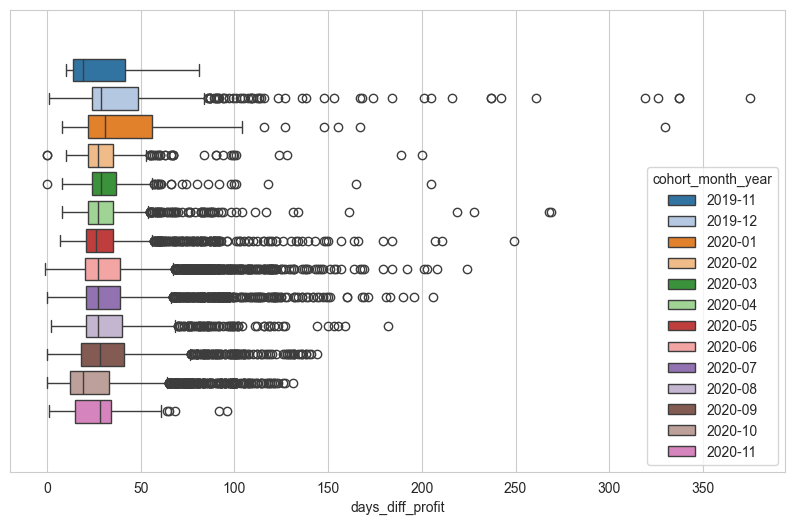

In [134]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cash_m4.sort_values('cohort_month_year'), x='days_diff_profit', hue='cohort_month_year', palette=my_palette, gap=0.2)


(-5.0, 110.0)

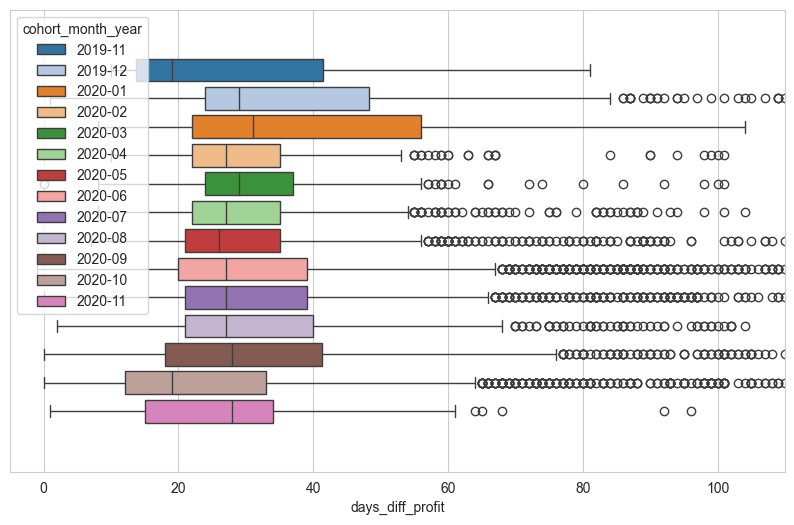

In [141]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cash_m4.sort_values('cohort_month_year'), x='days_diff_profit', hue='cohort_month_year', palette=my_palette, gap=0.2, orient='h')
plt.xlim([-5, 110])

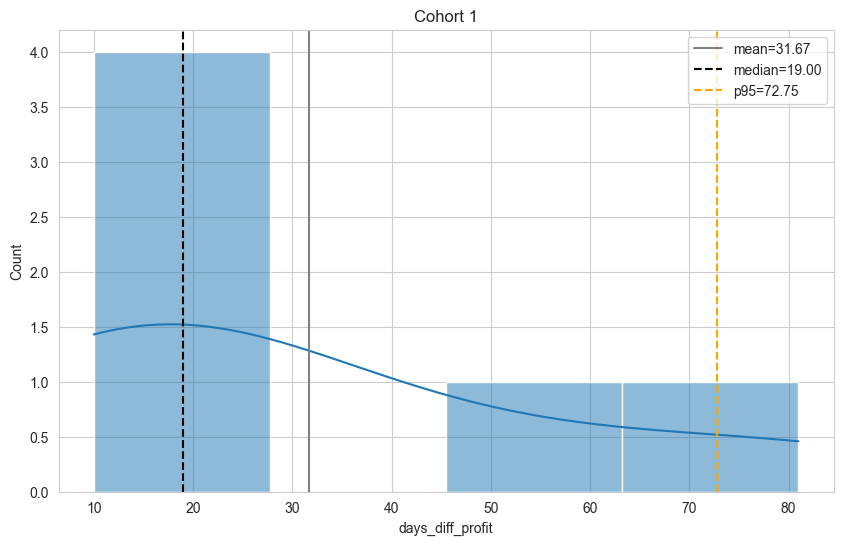

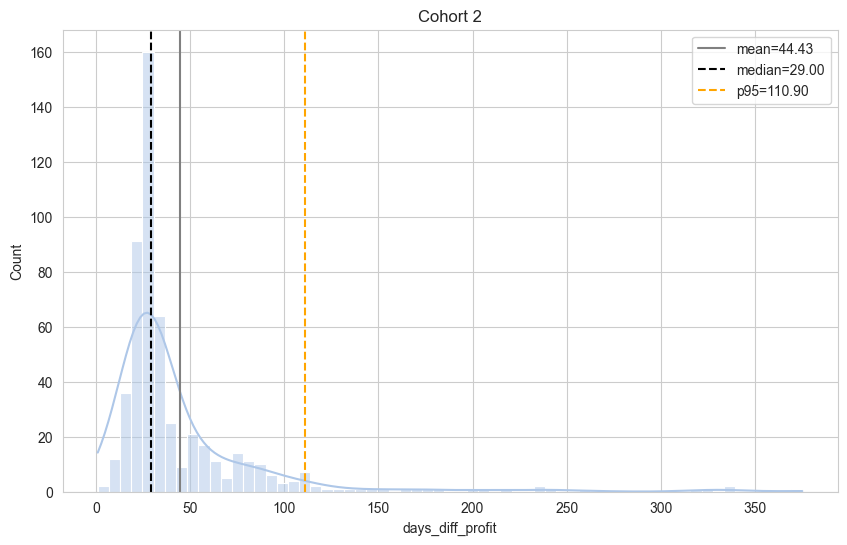

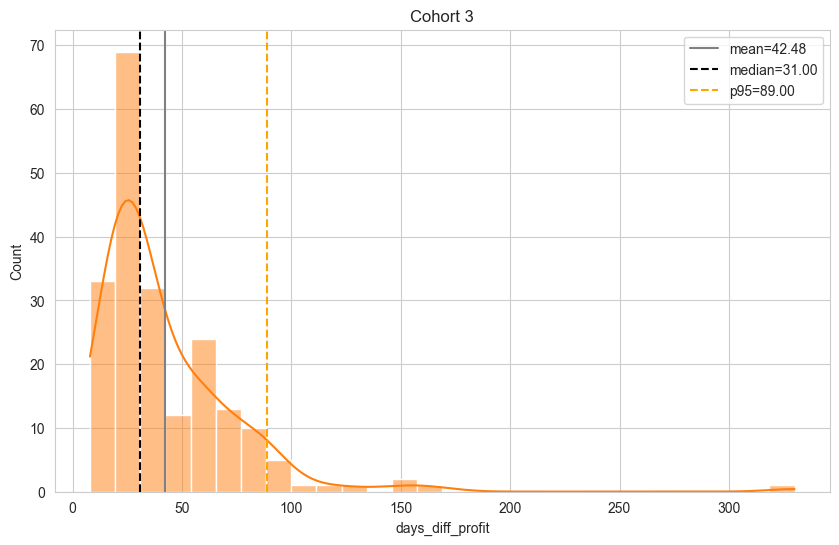

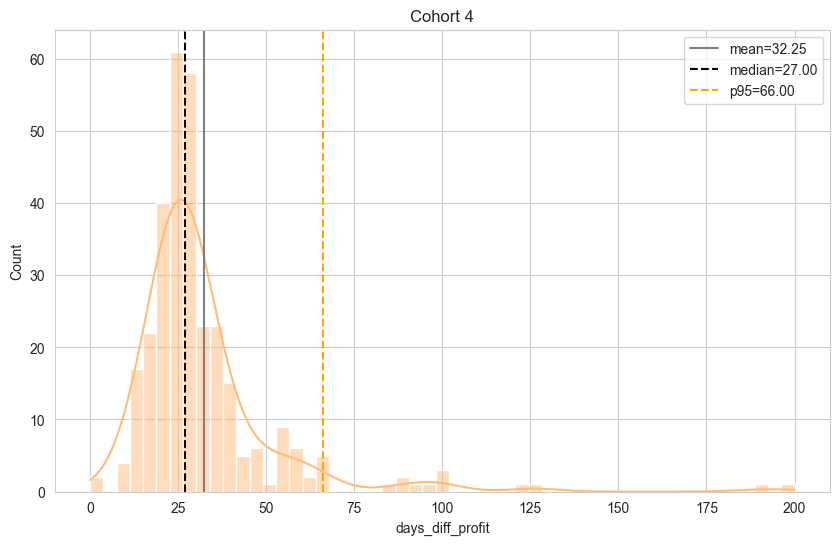

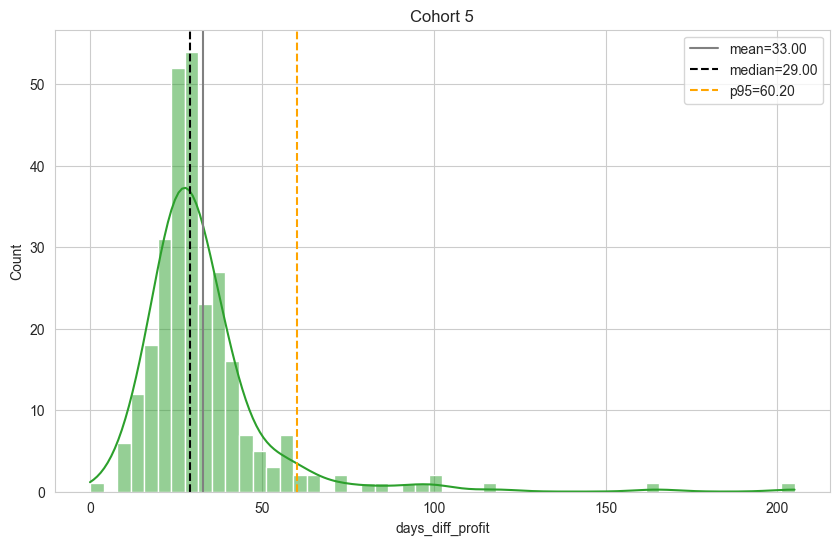

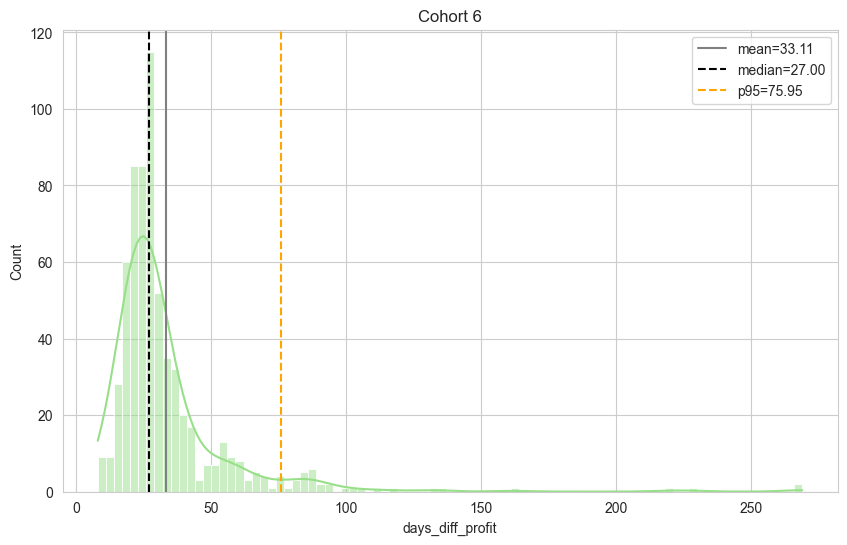

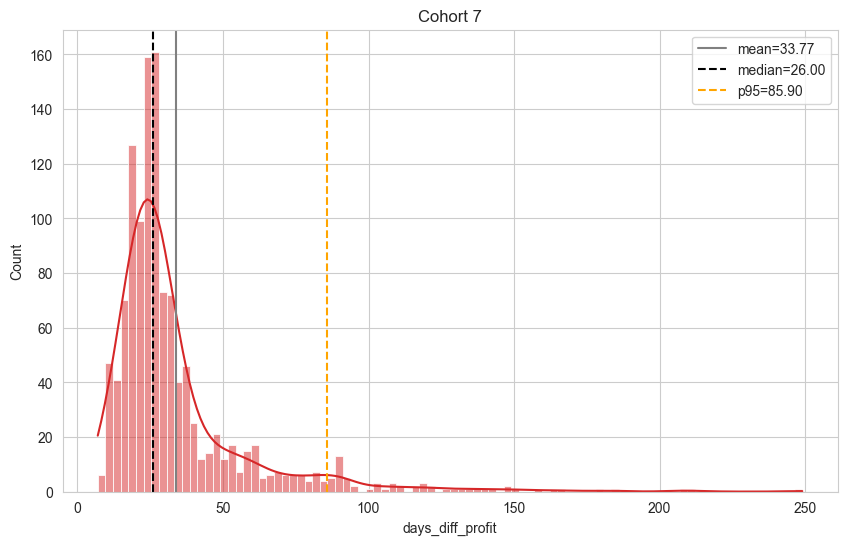

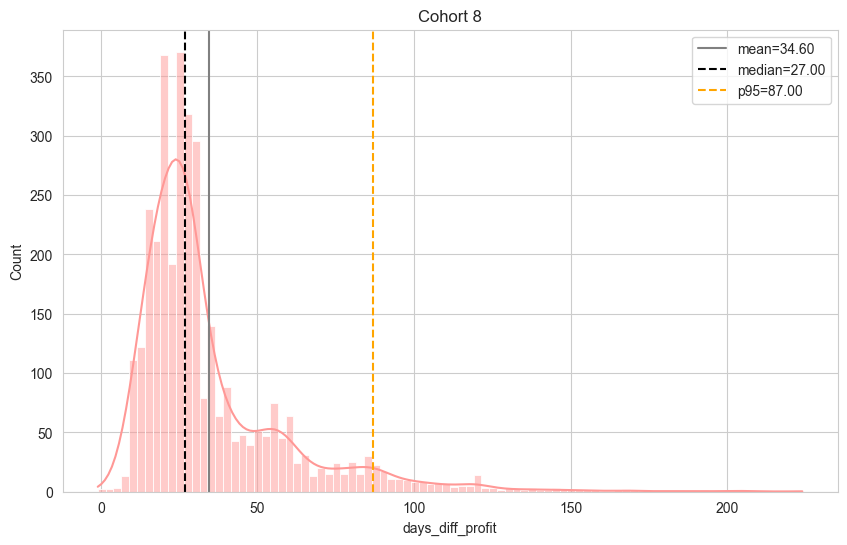

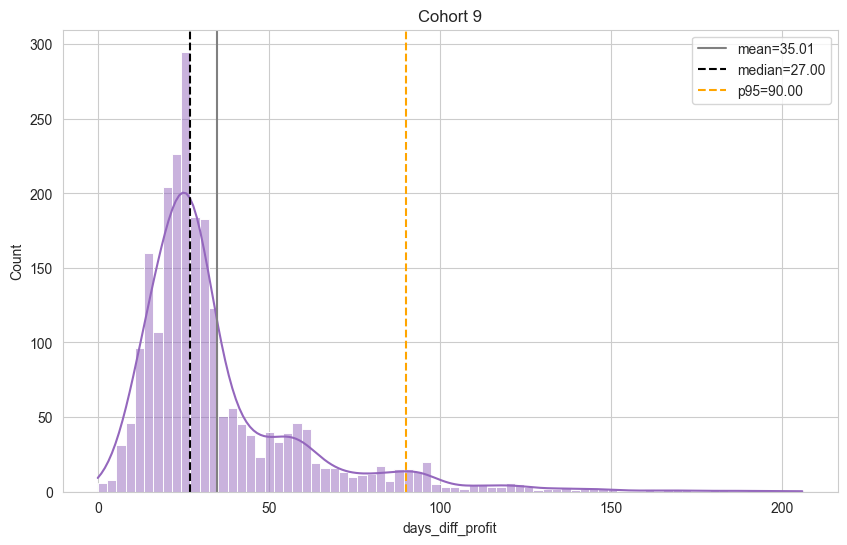

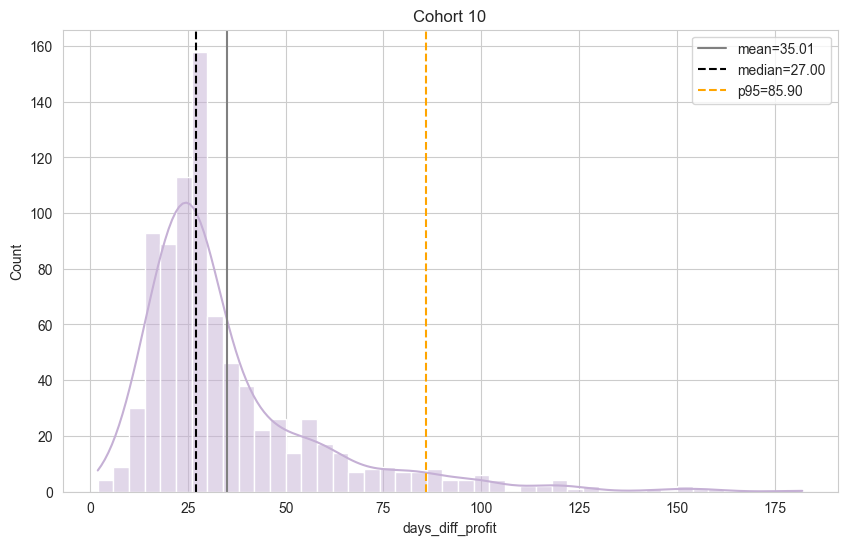

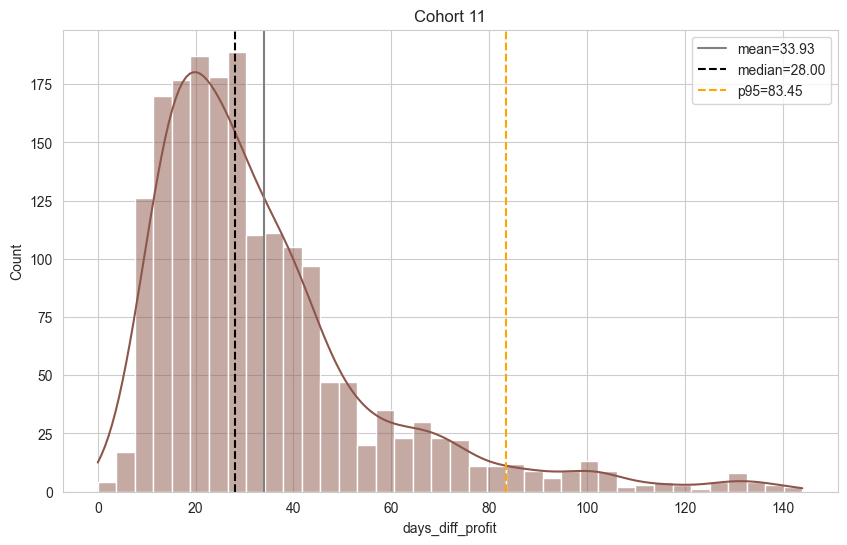

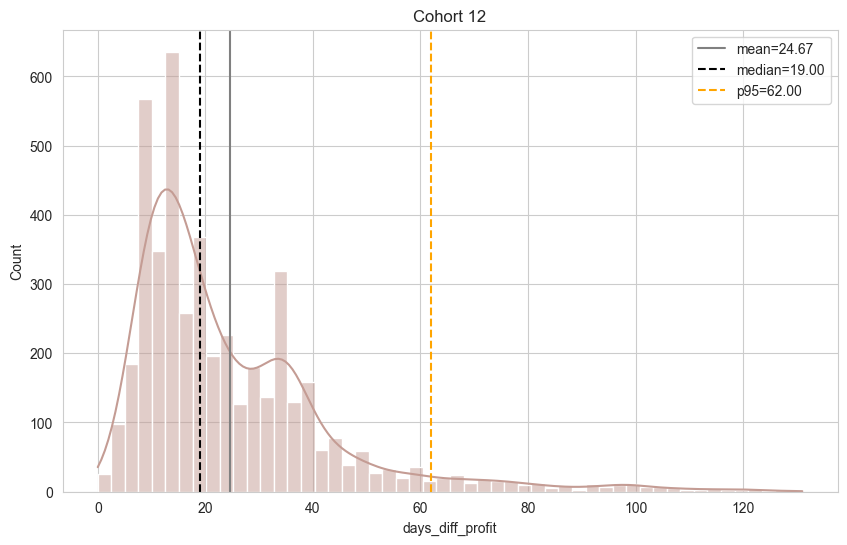

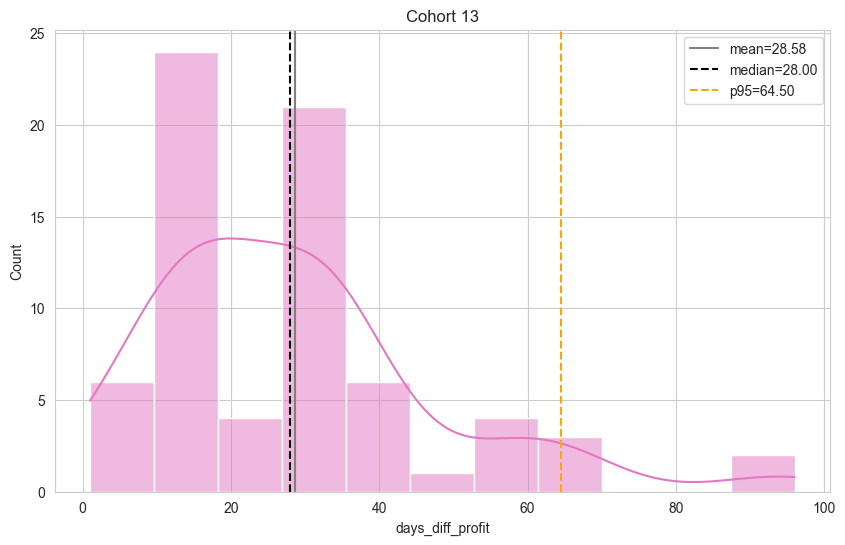

In [136]:
for n in sorted(df_cash_m4.cohort_n.unique()):
    data = df_cash_m4[df_cash_m4.cohort_n==n].sort_values('cohort_month_year')
    
    plt.figure(figsize=(10,6))
    sns.histplot(data=data, x='days_diff_profit', color=my_colors[n-1], kde=True)
    #sns.histplot(data=df_cash_m4[df_cash_m4.cohort_n==n].sort_values('cohort_month_year'), x='days_diff_profit', bins=50, color=my_colors[n-1], kde=True)
    plt.axvline(data['days_diff_profit'].mean(), color='grey', lw=1.5, label=f'mean={data['days_diff_profit'].mean():.2f}')
    plt.axvline(data['days_diff_profit'].median(), color='black', ls='--', lw=1.5, label=f'median={data['days_diff_profit'].median():.2f}')
    plt.axvline(np.percentile(data['days_diff_profit'], 95), color='orange', ls='--', lw=1.5, label=f'p95={np.percentile(data['days_diff_profit'], 95):.2f}')
    plt.legend(loc='upper right')
    plt.plot()
    plt.title(f"Cohort {n}")